In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_excel('erp_order_data.xlsx')
print(df.head())

   id internal_order_number online_order_number store_name  \
0   1      IO20251023000001   ON125347071883677    时代服饰旗舰店   
1   2      IO20251023000002   ON677812434302673    时代服饰旗舰店   
2   3      IO20251023000003   ON475820950373242    都市风尚官方店   
3   4      IO20251023000004   ON517267520467920    时尚潮流旗舰店   
4   5      IO20251023000005   ON262099757832742    时尚潮流旗舰店   

  full_channel_user_id           shipping_date            payment_date  \
0            U00000109 2024-12-14 04:37:51.572 2024-12-13 04:37:51.572   
1            U00000072 2025-07-09 08:35:17.042 2025-07-06 08:35:17.042   
2            U00000012 2025-02-25 05:00:55.199 2025-02-23 05:00:55.199   
3            U00000170 2025-02-10 08:35:19.627 2025-02-07 08:35:19.627   
4            U00000156 2025-06-15 10:06:56.187 2025-06-12 10:06:56.187   

   payable_amount  paid_amount status  ... unit_price product_name  \
0          525.78       525.78    已完成  ...     257.89        修身牛仔裤   
1          157.10       157.10    已完成  ...

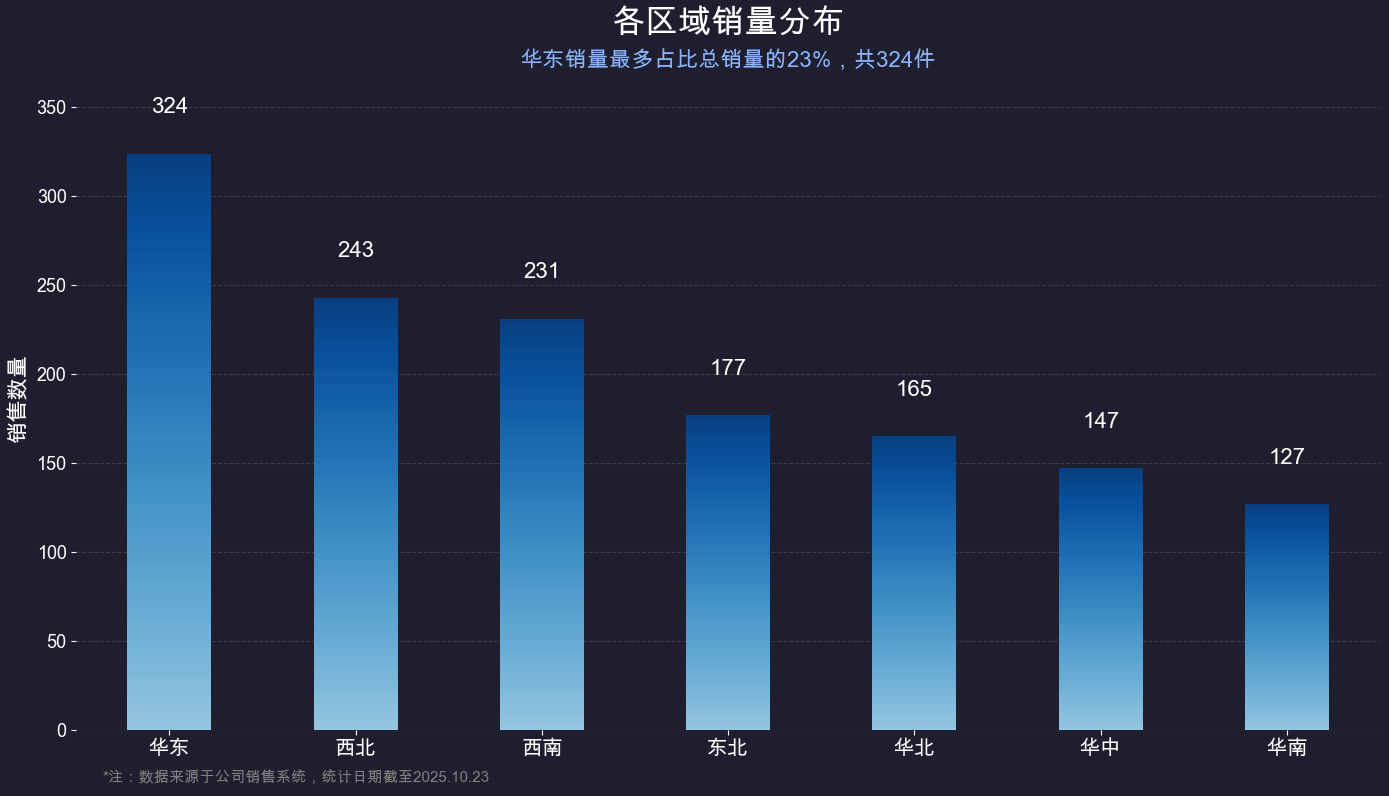


各区域销量统计：
region  total_quantity  order_count
    华东             324          178
    西北             243          152
    西南             231          128
    东北             177          109
    华北             165           94
    华中             147           94
    华南             127           75

总销量：1414 件
订单总数：1000 单


In [45]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'STHeiti']
plt.rcParams['axes.unicode_minus'] = False

# 定义区域映射（根据中国地理区域划分）
region_mapping = {
    '北京': '华北', '天津': '华北', '河北省': '华北', '山西省': '华北', '内蒙古自治区': '华北',
    '辽宁省': '东北', '吉林省': '东北', '黑龙江省': '东北',
    '上海': '华东', '江苏省': '华东', '浙江省': '华东', '安徽省': '华东', '福建省': '华东', 
    '江西省': '华东', '山东省': '华东',
    '河南省': '华中', '湖北省': '华中', '湖南省': '华中',
    '广东省': '华南', '广西壮族自治区': '华南', '海南省': '华南',
    '重庆': '西南', '四川省': '西南', '贵州省': '西南', '云南省': '西南', '西藏自治区': '西南',
    '陕西省': '西北', '甘肃省': '西北', '青海省': '西北', '宁夏回族自治区': '西北', '新疆维吾尔自治区': '西北'
}

# 添加区域列
df['region'] = df['province'].map(region_mapping)

# 按区域统计订单数量
region_stats = df.groupby('region').agg({
    'quantity': 'sum',
    'id': 'count'
}).reset_index()
region_stats.columns = ['region', 'total_quantity', 'order_count']

# 按总数量排序
region_stats = region_stats.sort_values('total_quantity', ascending=False)

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 设置深色背景
fig.patch.set_facecolor('#1e1e2e')
ax.set_facecolor('#1e1e2e')

# 获取数据
regions = region_stats['region'].tolist()
quantities = region_stats['total_quantity'].tolist()

# 绘制渐变柱形图
bar_width = 0.45  # 缩小柱子宽度
gradient_steps = 100  # 渐变层数

# 获取colormap
cmap = mpl.colormaps.get_cmap('Blues')

for i, (region, qty) in enumerate(zip(regions, quantities)):
    # 为每个柱子创建从下到上的渐变效果
    for j in range(gradient_steps):
        # 计算每一层的高度和位置
        layer_height = qty / gradient_steps
        y_position = j * layer_height
        
        # 从0.4到0.95的渐变（从浅蓝到深蓝）
        color_value = 0.4 + (j / gradient_steps) * 0.55
        color = cmap(color_value)
        
        # 绘制每一层的矩形（无边框）
        rect = Rectangle((i - bar_width/2, y_position), bar_width, layer_height,
                         facecolor=color, edgecolor='none')
        ax.add_patch(rect)
    
    # 在柱子上添加数值标签
    ax.text(i, qty + 20, f'{int(qty)}',
            ha='center', va='bottom', fontsize=16, fontweight='bold', color='white')

# 设置x轴
ax.set_xticks(range(len(regions)))
ax.set_xticklabels(regions, fontsize=15, color='white')
ax.set_xlim(-0.5, len(regions) - 0.5)

# 设置y轴
ax.set_ylim(0, max(quantities) * 1.15)
ax.set_ylabel('销售数量', fontsize=16, fontweight='bold', color='white')
ax.tick_params(axis='y', colors='white', labelsize=13)

# 设置网格线（仅保留横向虚线）
ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray', zorder=0)
ax.set_axisbelow(True)

# 隐藏所有边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 添加标题和注释
total_qty = region_stats['total_quantity'].sum()
max_region = region_stats.iloc[0]
percentage = (max_region['total_quantity'] / total_qty * 100)

title_text = f'各区域销量分布'
subtitle_text = f'{max_region["region"]}销量最多占比总销量的{percentage:.0f}%，共{int(max_region["total_quantity"])}件'

ax.text(0.5, 1.05, title_text, 
        transform=ax.transAxes, fontsize=24, fontweight='bold', 
        ha='center', color='white')
ax.text(0.5, 1.00, subtitle_text,
        transform=ax.transAxes, fontsize=16,
        ha='center', color='#89b4fa')

# 添加数据来源注释
ax.text(0.02, -0.08, '*注：数据来源于公司销售系统，统计日期截至2025.10.23',
        transform=ax.transAxes, fontsize=11, color='gray', style='italic')

plt.tight_layout()
plt.show()

print(f"\n各区域销量统计：")
print(region_stats.to_string(index=False))
print(f"\n总销量：{total_qty} 件")
print(f"订单总数：{df['id'].nunique()} 单")

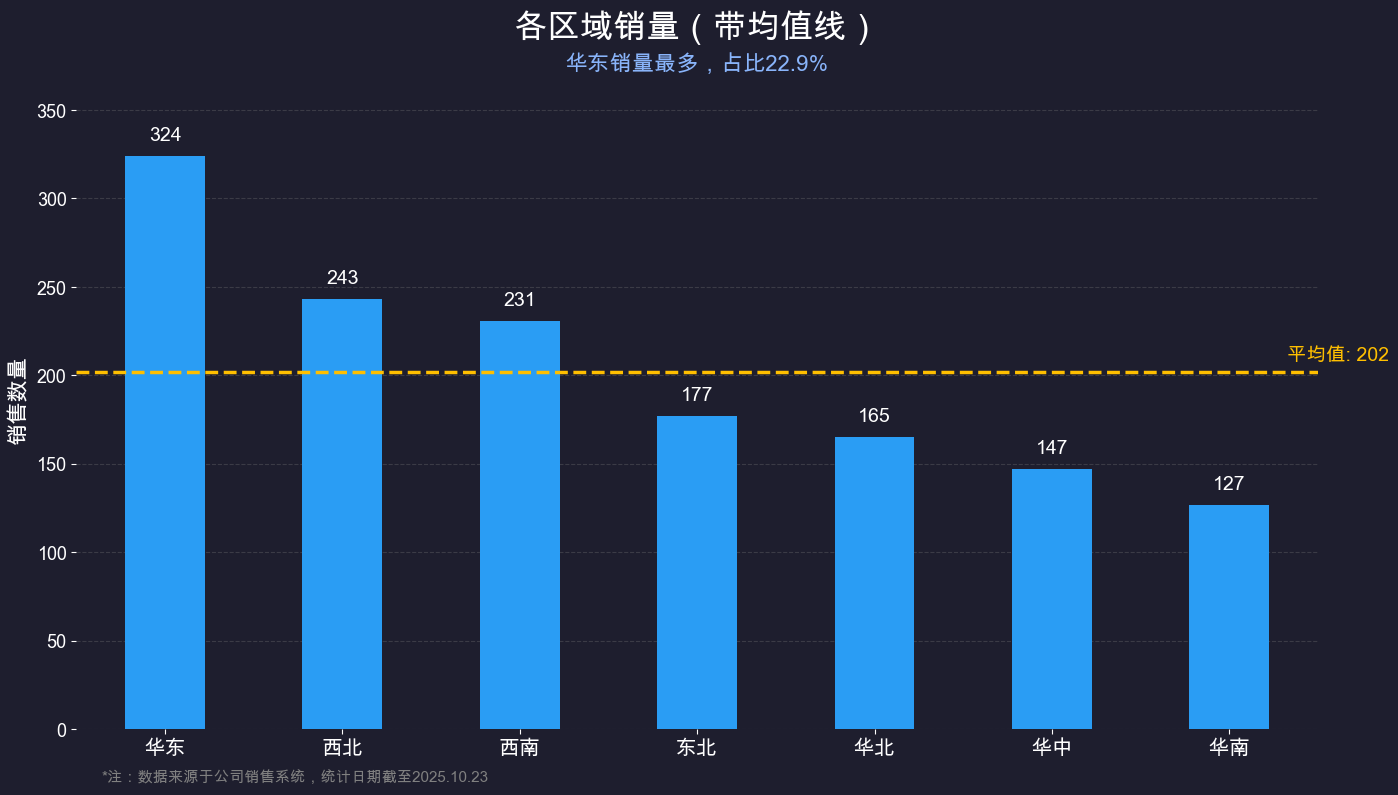


各区域销量统计：
region  total_quantity  order_count
    华东             324          178
    西北             243          152
    西南             231          128
    东北             177          109
    华北             165           94
    华中             147           94
    华南             127           75

平均销量: 202.00 件


In [46]:
# 可复用单元：绘制区域销量柱状图并标注均值（假设 cell 3 已计算并存在 region_stats）
import matplotlib.pyplot as plt
import numpy as np

def plot_region_bar_with_mean(region_stats, figsize=(12,6), bar_color='#2a9df4'):
    """绘制按区域的柱状图并标注均值线。
    输入：region_stats DataFrame (columns: region, total_quantity, order_count)
    """
    regions = region_stats['region'].tolist()
    quantities = region_stats['total_quantity'].tolist()
    x = np.arange(len(regions))

    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor('#1e1e2e')
    ax.set_facecolor('#1e1e2e')

    # 柱状图
    bars = ax.bar(x, quantities, color=bar_color, width=0.45, zorder=3)

    # 在柱子上显示数值标签
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h + max(quantities) * 0.02,
                f'{int(h)}', ha='center', va='bottom', fontsize=14, color='white', fontweight='bold')

    # 平均值线
    mean_val = np.mean(quantities)
    ax.axhline(mean_val, color='#ffbf00', linestyle='--', linewidth=2.5, zorder=4)
    ax.text(len(regions) - 0.1, mean_val + max(quantities) * 0.02,
            f'平均值: {mean_val:.0f}', color='#ffbf00', fontsize=14, fontweight='bold', ha='right')

    # 坐标轴和样式
    ax.set_xticks(x)
    ax.set_xticklabels(regions, fontsize=15, color='white')
    ax.set_xlim(-0.5, len(regions) - 0.5)
    ax.set_ylim(0, max(quantities) * 1.15)
    ax.set_ylabel('销售数量', fontsize=16, fontweight='bold', color='white')
    ax.tick_params(axis='y', colors='white', labelsize=13)

    # 仅保留横向虚线网格
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray', zorder=0)
    ax.set_axisbelow(True)

    # 隐藏外框
    for spine in ax.spines.values():
        spine.set_visible(False)

    # 标题与副标题
    title_text = '各区域销量（带均值线）'
    subtitle_text = f'{region_stats.iloc[0]["region"]}销量最多，占比{region_stats.iloc[0]["total_quantity"] / region_stats["total_quantity"].sum() * 100:.1f}%'
    ax.text(0.5, 1.05, title_text, transform=ax.transAxes, fontsize=24, fontweight='bold', ha='center', color='white')
    ax.text(0.5, 1.00, subtitle_text, transform=ax.transAxes, fontsize=16, ha='center', color='#89b4fa')

    # 注释
    ax.text(0.02, -0.08, '*注：数据来源于公司销售系统，统计日期截至2025.10.23', transform=ax.transAxes, fontsize=11, color='gray', style='italic')

    plt.tight_layout()
    plt.show()

    # 返回均值以便后续使用
    return mean_val

mean_value = plot_region_bar_with_mean(region_stats, figsize=(14,8))
print('\n各区域销量统计：')
print(region_stats.to_string(index=False))
print(f'\n平均销量: {mean_value:.2f} 件')


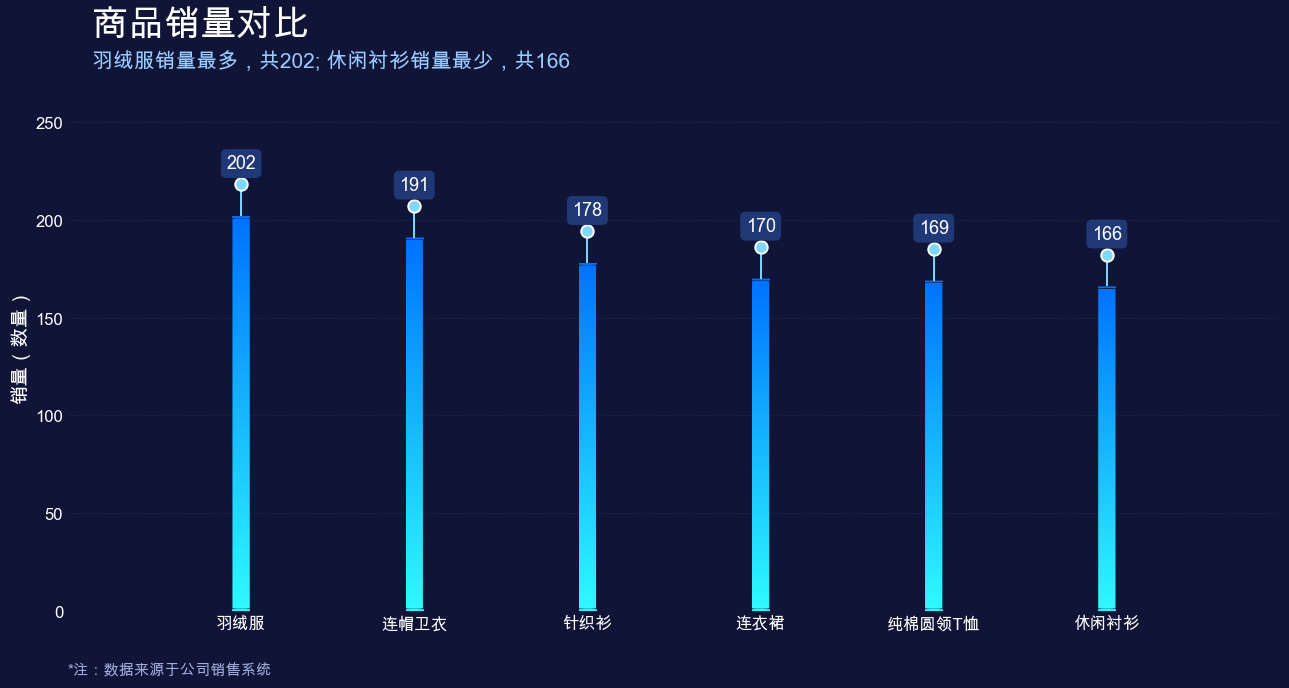


商品销量统计（Top）:
product_name  quantity
         羽绒服       202
        连帽卫衣       191
         针织衫       178
         连衣裙       170
      纯棉圆领T恤       169
        休闲衬衫       166


In [47]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# 参数设置
target_month = 3  # 需要展示的月份（1-12），若无月份数据会自动展示全部
top_n = 6        # 展示Top N 商品

df_products = df.copy()
month_label = f"{target_month}月"
note_date = None

if 'order_date' in df_products.columns:
    df_products['order_date'] = pd.to_datetime(df_products['order_date'], errors='coerce')
    month_data = df_products[df_products['order_date'].dt.month == target_month]
    if not month_data.empty:
        df_products = month_data
        note_date = month_data['order_date'].max()
    else:
        note_date = df_products['order_date'].max()
        month_label = ''  # 若对应月份没有数据，则退回全部数据
else:
    month_label = ''

if df_products.empty:
    raise ValueError('没有可用的商品销量数据用于绘图，请检查数据源。')

product_stats = (
    df_products.groupby('product_name', as_index=False)['quantity']
    .sum()
    .sort_values('quantity', ascending=False)
    .head(top_n)
 )

if product_stats.empty:
    raise ValueError('商品统计结果为空，请确认字段 "product_name" 和 "quantity" 是否存在。')

names = product_stats['product_name'].tolist()
values = product_stats['quantity'].tolist()
max_val = max(values)

top_name = product_stats.iloc[0]['product_name']
top_qty = int(product_stats.iloc[0]['quantity'])
bottom_name = product_stats.iloc[-1]['product_name']
bottom_qty = int(product_stats.iloc[-1]['quantity'])

title_text = f"{month_label}商品销量对比" if month_label else "商品销量对比"
if month_label:
    subtitle_text = f"{top_name}销量最多，{month_label}销量{top_qty}; {bottom_name}最少，{month_label}销量{bottom_qty}"
else:
    subtitle_text = f"{top_name}销量最多，共{top_qty}; {bottom_name}销量最少，共{bottom_qty}"

bg_color = '#101538'
grid_color = '#2c3c66'
dot_color = '#7dd8ff'
value_bg = '#233c7c'

fig, ax = plt.subplots(figsize=(13, 7))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

cmap = LinearSegmentedColormap.from_list('cyan_blue', ['#2efbff', '#0072ff'])
bar_width = 0.05
bar_spacing = 0.5  # <1 会减少柱子之间的间距
gradient_steps = 256
gradient_template = np.linspace(0, 1, gradient_steps).reshape(gradient_steps, 1)

x = np.arange(len(names)) * bar_spacing  # 使用 numpy 精准控制柱子位置并缩小间距
bars = ax.bar(x, values, width=bar_width, color='none', edgecolor='none', zorder=2)

def bar_rounding(height):
    return np.clip(height * 0.02, bar_width * 6, bar_width * 28)

for bar, val in zip(bars, values):
    left = bar.get_x()
    rounding = bar_rounding(val)
    patch = FancyBboxPatch((left, 0), bar_width, val,
                            boxstyle=f'round,pad=0,rounding_size={rounding}',
                            linewidth=0, facecolor='none', edgecolor='none', zorder=4)
    ax.add_patch(patch)
    img = ax.imshow(gradient_template, extent=(left, left + bar_width, 0, val), origin='lower',
                    aspect='auto', cmap=cmap, zorder=3, interpolation='bicubic')
    img.set_clip_path(patch)

stem_height = max_val * 0.08
label_offset = max_val * 0.03

ax.vlines(x, values, np.array(values) + stem_height, colors=dot_color, linewidth=1.4, zorder=5)
ax.scatter(x, np.array(values) + stem_height, s=80, color=dot_color, edgecolors='white', linewidth=1.4, zorder=6)

for xi, val in zip(x, values):
    ax.text(xi, val + stem_height + label_offset, f"{int(val)}",
            ha='center', va='bottom', fontsize=13, color='white', fontweight='bold', zorder=7,
            bbox=dict(boxstyle='round,pad=0.3', facecolor=value_bg, edgecolor='none', alpha=0.92))

ax.set_xticks(x)
ax.set_xticklabels(names, fontsize=13, color='white')
pad = max(bar_width * 3, bar_spacing)
if len(x) > 0:
    x_min, x_max = float(np.min(x)), float(np.max(x))
else:
    x_min, x_max = 0.0, 0.0
ax.set_xlim(x_min - pad, x_max + pad)
ax.set_ylim(0, max_val * 1.35)
ax.set_ylabel('销量（数量）', fontsize=14, color='white')
ax.tick_params(axis='both', colors='white', labelsize=12, width=0.8, length=0)
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='--', color=grid_color, alpha=0.35, linewidth=0.6)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.text(0.02, 1.08, title_text, transform=ax.transAxes, fontsize=26, fontweight='bold',
        ha='left', color='white')
ax.text(0.02, 1.02, subtitle_text, transform=ax.transAxes, fontsize=15,
        ha='left', color='#9acbff')

note_text = '*注：数据来源于公司销售系统'
if note_date is not None and pd.notna(note_date):
    note_text += f"，统计日期截至{note_date.strftime('%Y.%m.%d')}"
ax.text(0.0, -0.12, note_text, transform=ax.transAxes, fontsize=11, color='#9fa9d8', style='italic')

plt.tight_layout()
plt.show()

print('\n商品销量统计（Top）:')
print(product_stats.to_string(index=False))

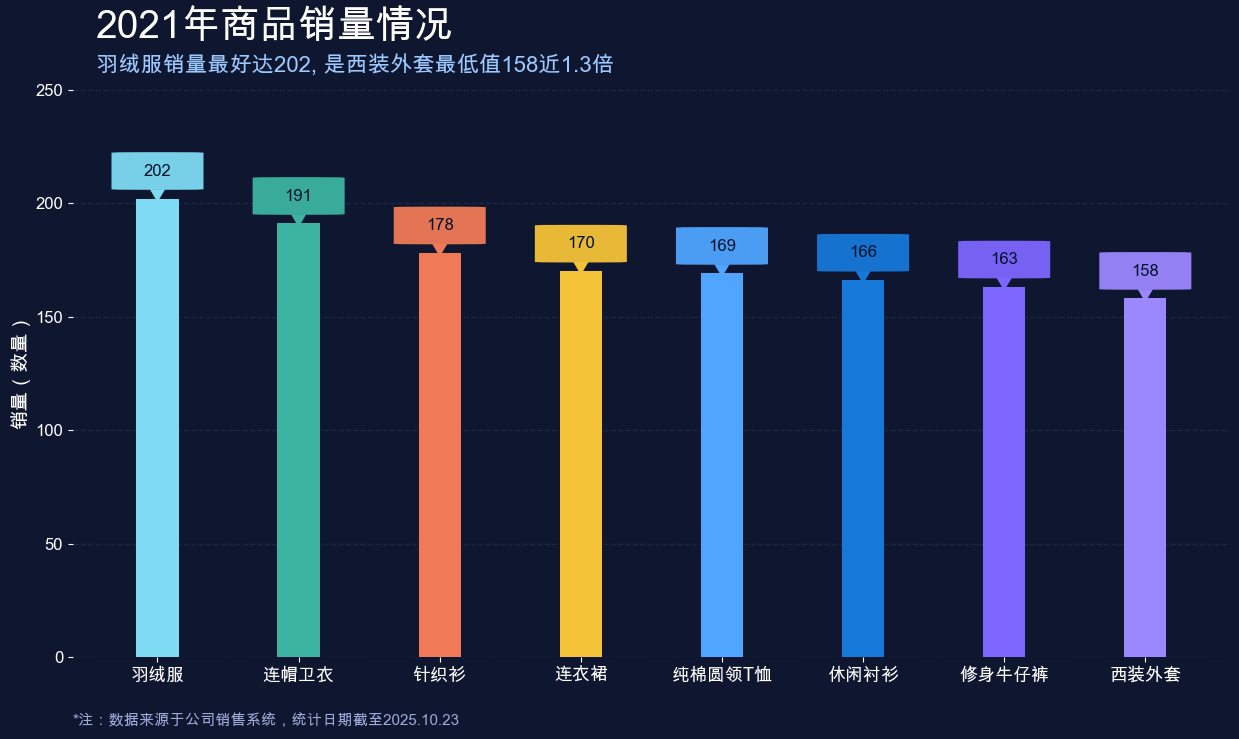

In [48]:
#多色标注柱形图
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Polygon

top_n = 8
category_stats = (
    df.groupby('product_name', as_index=False)['quantity']
    .sum()
    .sort_values('quantity', ascending=False)
    .head(top_n)
 )


names = category_stats['product_name'].tolist()
values = category_stats['quantity'].tolist()
x = np.arange(len(names))
max_val = max(values)

palette = ['#7edbf3', '#3cb4a1', '#f07a57', '#f4c338', '#4fa5ff', '#1678d8', '#7d66ff', '#9b88ff']
if len(palette) < len(names):
    repeats = int(np.ceil(len(names) / len(palette)))
    palette = (palette * repeats)[:len(names)]

bg_color = '#0f1730'
grid_color = '#2b3f63'
title_text = '2021年商品销量情况'
subtitle_text = f"{names[0]}销量最好达{values[0]}, 是{names[-1]}最低值{values[-1]}近{values[0] / values[-1]:.1f}倍"
note_text = '*注：数据来源于公司销售系统，统计日期截至2025.10.23'

fig, ax = plt.subplots(figsize=(12.5, 7.5))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

bar_width = 0.3
bars = ax.bar(x, values, color=palette[:len(names)], width=bar_width, edgecolor='none', zorder=2)

gap = max_val * 0.02
label_height = max_val * 0.08
triangle_half = bar_width * 0.18

for xi, val, color in zip(x, values, palette):
    rect = FancyBboxPatch((xi - bar_width * 0.42, val + gap),
                          bar_width * 0.84, label_height,
                          boxstyle='round,pad=0.2',
                          facecolor=color, edgecolor='none', zorder=4, alpha=0.95)
    ax.add_patch(rect)
    pointer = Polygon([[xi - triangle_half, val + gap],
                       [xi + triangle_half, val + gap],
                       [xi, val + gap - label_height * 0.35]],
                      closed=True, facecolor=color, edgecolor='none', zorder=3)
    ax.add_patch(pointer)
    ax.text(xi, val + gap + label_height / 2, f"{int(val)}",
            ha='center', va='center', fontsize=12, fontweight='bold',
            color='#05122d', zorder=5)

ax.set_xticks(x)
ax.set_xticklabels(names, fontsize=13, color='white')
ax.set_ylim(0, max_val * 1.25)
ax.set_xlim(-0.6, len(names) - 0.4)
ax.set_ylabel('销量（数量）', fontsize=14, color='white')
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.yaxis.grid(True, linestyle='--', color=grid_color, alpha=0.4, linewidth=1, zorder=1)
ax.set_axisbelow(True)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.text(0.02, 1.08, title_text, transform=ax.transAxes, fontsize=28, fontweight='bold',
        ha='left', color='white')
ax.text(0.02, 1.02, subtitle_text, transform=ax.transAxes, fontsize=16,
        ha='left', color='#9cc9ff')
ax.text(0.0, -0.12, note_text, transform=ax.transAxes, fontsize=11,
        color='#9fa9d8', style='italic')

plt.tight_layout()
plt.show()

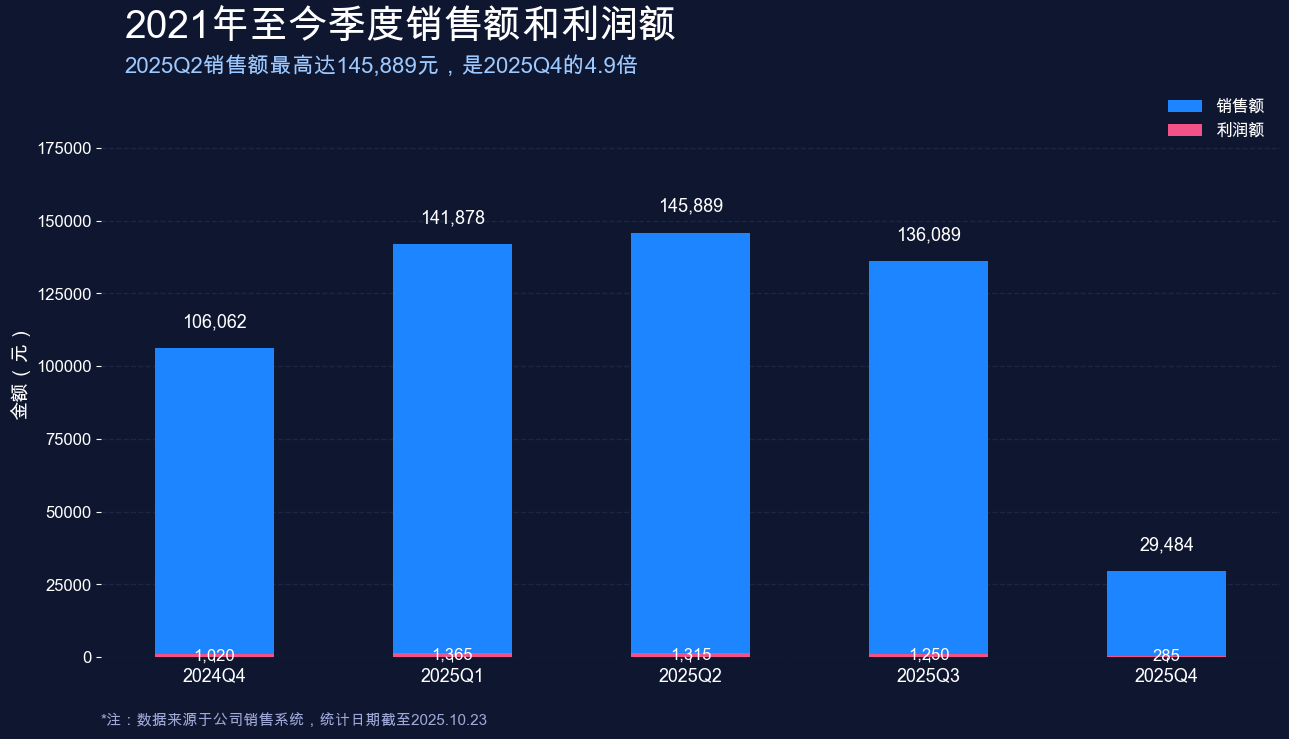

In [49]:
# 层叠柱形图：季度销售额和利润额（实际数值）
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df_quarter = df.copy()
required_columns = {'payment_date', 'paid_amount'}
missing = required_columns - set(df_quarter.columns)
if missing:
    raise ValueError(f'缺少字段：{missing}，无法计算季度销售额。')

df_quarter['payment_date'] = pd.to_datetime(df_quarter['payment_date'], errors='coerce')
df_quarter = df_quarter.dropna(subset=['payment_date'])

if 'product_amount' not in df_quarter.columns:
    if {'unit_price', 'quantity'}.issubset(df_quarter.columns):
        df_quarter['product_amount'] = df_quarter['unit_price'] * df_quarter['quantity']
    else:
        raise ValueError('缺少 "product_amount" 字段，无法估算利润。')

df_quarter['quarter_period'] = df_quarter['payment_date'].dt.to_period('Q')
agg = df_quarter.groupby('quarter_period').agg(
    sales_amount=('paid_amount', 'sum'),
    cost_amount=('product_amount', 'sum')
).reset_index()
agg['profit_amount'] = (agg['sales_amount'] - agg['cost_amount']).clip(lower=0)
agg = agg.sort_values('quarter_period')
agg['quarter_label'] = agg['quarter_period'].astype(str)

recent_quarters = 6
if len(agg) > recent_quarters:
    agg = agg.tail(recent_quarters).reset_index(drop=True)

if agg.empty:
    raise ValueError('季度汇总结果为空，请检查日期或金额字段。')

sales = agg['sales_amount'].to_numpy()
profit = agg['profit_amount'].to_numpy()
non_profit = np.clip(sales - profit, a_min=0, a_max=None)

quarters = agg['quarter_label'].tolist()
x = np.arange(len(quarters))

bg_color = '#0f1730'
grid_color = '#2b3f63'
sales_color = '#1c85ff'
profit_color = '#f25287'

fig, ax = plt.subplots(figsize=(13, 7.5))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

bar_width = 0.5
profit_bars = ax.bar(x, profit, width=bar_width, color=profit_color, edgecolor='none', zorder=2)
sales_bars = ax.bar(x, non_profit, width=bar_width, bottom=profit, color=sales_color, edgecolor='none', zorder=3)

max_total = sales.max()
label_offset = max_total * 0.04

for xi, total, pr in zip(x, sales, profit):
    if pr > 0:
        ax.text(xi, pr / 2, f"{pr:,.0f}", color='white', fontsize=12, fontweight='bold', ha='center', va='center')
    ax.text(xi, total + label_offset, f"{total:,.0f}", color='white', fontsize=13, fontweight='bold', ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(quarters, fontsize=13, color='white')
ax.set_ylim(0, max_total * 1.35)
ax.set_ylabel('金额（元）', fontsize=14, color='white')
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.yaxis.grid(True, linestyle='--', color=grid_color, alpha=0.4, linewidth=1, zorder=1)
ax.set_axisbelow(True)

for spine in ax.spines.values():
    spine.set_visible(False)

legend_elements = [
    Patch(facecolor=sales_color, edgecolor='none', label='销售额'),
    Patch(facecolor=profit_color, edgecolor='none', label='利润额')
 ]
legend = ax.legend(handles=legend_elements, loc='upper right', frameon=False, fontsize=12)
for text in legend.get_texts():
    text.set_color('white')

top_row = agg.loc[sales.argmax()]
bottom_row = agg.loc[sales.argmin()]
ratio = (top_row['sales_amount'] / bottom_row['sales_amount']) if bottom_row['sales_amount'] else np.nan
subtitle_text = f"{top_row['quarter_label']}销售额最高达{top_row['sales_amount']:,.0f}元"
if np.isfinite(ratio) and ratio > 0:
    subtitle_text += f"，是{bottom_row['quarter_label']}的{ratio:.1f}倍"
note_date = df_quarter['payment_date'].max()
note_text = '*注：数据来源于公司销售系统'
if pd.notna(note_date):
    note_text += f"，统计日期截至{note_date.strftime('%Y.%m.%d')}"

ax.text(0.02, 1.08, '2021年至今季度销售额和利润额', transform=ax.transAxes, fontsize=28, fontweight='bold', ha='left', color='white')
ax.text(0.02, 1.02, subtitle_text, transform=ax.transAxes, fontsize=16, ha='left', color='#9cc9ff')
ax.text(0.0, -0.12, note_text, transform=ax.transAxes, fontsize=11, color='#9fa9d8', style='italic')

plt.tight_layout()
plt.show()

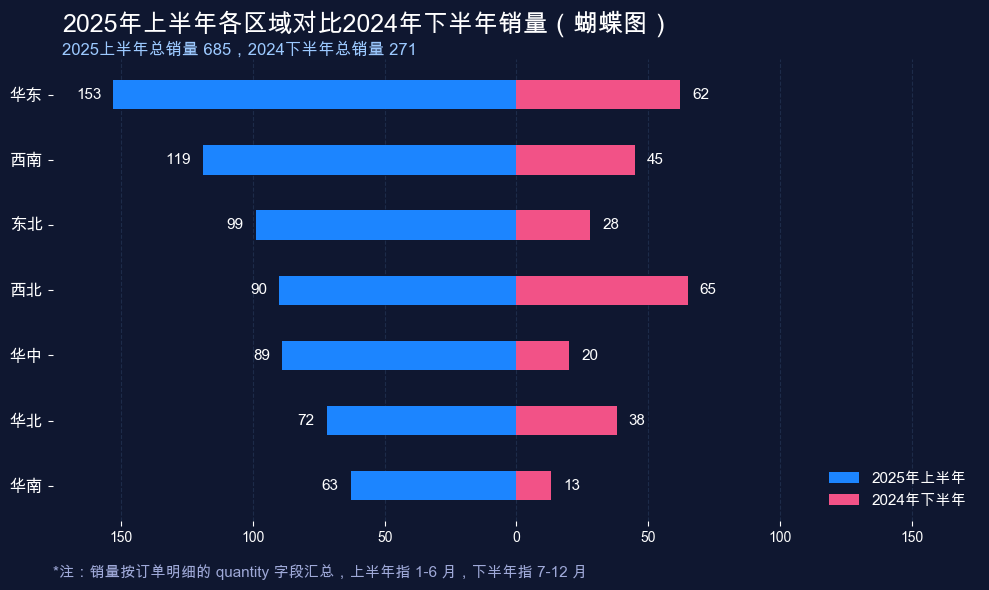

In [50]:
# 蝴蝶图：2025年上半年各区域对比2024年下半年销量
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# 检查销量字段与时间字段
if 'quantity' not in df.columns:
    raise ValueError('缺少字段 "quantity"，无法计算销量。')
if 'payment_date' not in df.columns:
    raise ValueError('缺少字段 "payment_date"，无法按时间过滤。')

df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')
df_time = df.dropna(subset=['payment_date']).copy()

# 选择区间：2025 上半年（1-6 月） vs 2024 下半年（7-12 月）
h1_2025 = df_time[(df_time['payment_date'].dt.year == 2025) & (df_time['payment_date'].dt.month <= 6)]
h2_2024 = df_time[(df_time['payment_date'].dt.year == 2024) & (df_time['payment_date'].dt.month >= 7)]

agg25 = h1_2025.groupby('region', as_index=True)['quantity'].sum().rename('sales_2025')
agg24 = h2_2024.groupby('region', as_index=True)['quantity'].sum().rename('sales_2024')

comp = pd.concat([agg25, agg24], axis=1).fillna(0)
# 按 2025 销量降序展示（便于对比）
comp = comp.sort_values('sales_2025', ascending=False)
if comp.empty:
    raise ValueError('没有找到 2025 H1 或 2024 H2 的区域销量，请检查数据范围/字段。')

regions = comp.index.tolist()
sales25 = comp['sales_2025'].values
sales24 = comp['sales_2024'].values

# 蝴蝶图准备：左侧显示 2025（取负），右侧显示 2024 下半年
left = -sales25
right = sales24
y = np.arange(len(regions))

# 画图样式
bg = '#0f1730'
left_color = '#1c85ff'   # 2025（蓝）
right_color = '#f25287'  # 2024（粉）
grid_color = '#2b3f63'

fig, ax = plt.subplots(figsize=(10, max(6, len(regions)*0.6)))
fig.patch.set_facecolor(bg)
ax.set_facecolor(bg)

bar_height = 0.45
ax.barh(y, left, height=bar_height, color=left_color, zorder=3)
ax.barh(y, right, height=bar_height, color=right_color, zorder=3)

# 单侧数值标签（显示绝对值）
max_val = max(sales25.max() if len(sales25)>0 else 0, sales24.max() if len(sales24)>0 else 0)
pad = max_val * 0.03 if max_val>0 else 1

for yi, a, b in zip(y, left, right):
    # 左侧（2025）标签
    ax.text(a - pad, yi, f"{int(abs(a)):,.0f}", ha='right', va='center', color='white', fontsize=11, fontweight='bold')
    # 右侧（2024 H2）标签
    ax.text(b + pad, yi, f"{int(b):,.0f}", ha='left', va='center', color='white', fontsize=11, fontweight='bold')

# y 轴显示区域名
ax.set_yticks(y)
ax.set_yticklabels(regions, fontsize=12, color='white')

# x 轴格式化为绝对值显示
def fmt(x, pos):
    return f"{int(abs(x)):,.0f}"
ax.xaxis.set_major_formatter(FuncFormatter(fmt))

# 对称 xlim
ax.set_xlim(-max_val*1.15, max_val*1.15)

# 样式调整
ax.invert_yaxis()  # 使排行靠上
ax.xaxis.grid(True, linestyle='--', color=grid_color, alpha=0.5, zorder=0)
for spine in ax.spines.values():
    spine.set_visible(False)

# 图例与标题
from matplotlib.patches import Patch
legend = ax.legend([Patch(facecolor=left_color), Patch(facecolor=right_color)], ['2025年上半年','2024年下半年'], loc='lower right', frameon=False, fontsize=11)
for t in legend.get_texts():
    t.set_color('white')

total25 = int(sales25.sum())
total24 = int(sales24.sum())
subtitle = f"2025上半年总销量 {total25:,d}，2024下半年总销量 {total24:,d}"
ax.text(0.01, 1.06, '2025年上半年各区域对比2024年下半年销量（蝴蝶图）', transform=ax.transAxes, fontsize=18, fontweight='bold', ha='left', color='white')
ax.text(0.01, 1.01, subtitle, transform=ax.transAxes, fontsize=12, ha='left', color='#9cc9ff')

note_text = '*注：销量按订单明细的 quantity 字段汇总，上半年指 1-6 月，下半年指 7-12 月'
ax.text(0.0, -0.12, note_text, transform=ax.transAxes, fontsize=11, color='#9fa9d8', style='italic')

plt.tight_layout()
plt.show()

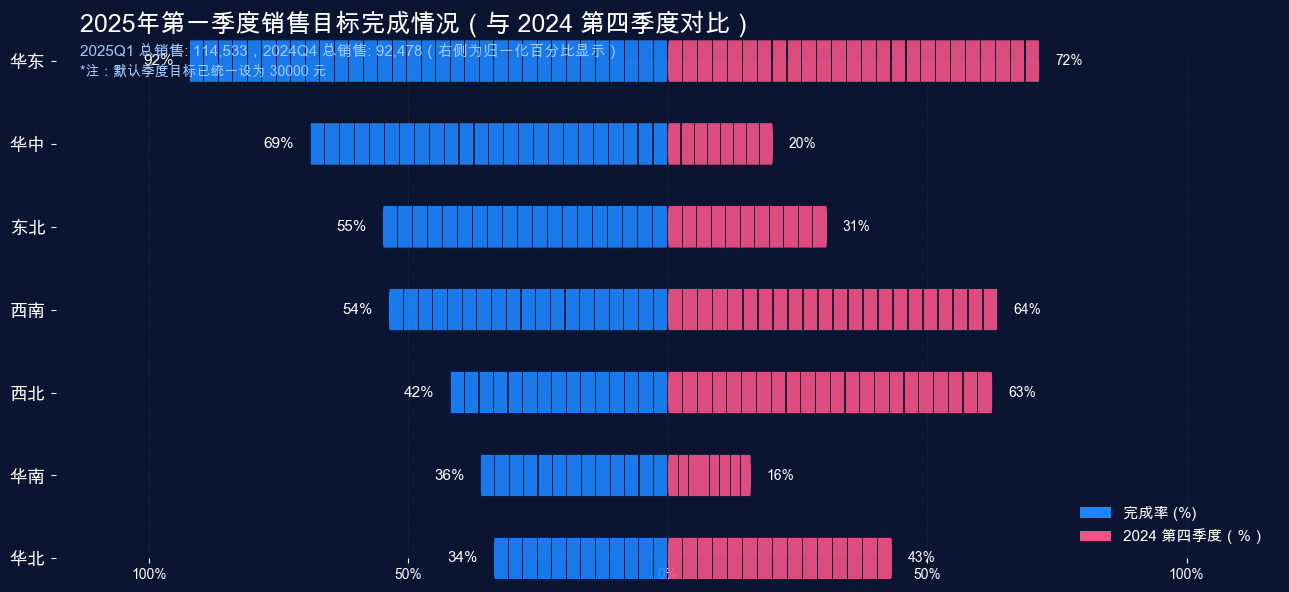

In [51]:
# 2025年第一季度销售目标完成情况（蝴蝶图样式）——美化与默认季度目标统一为 40000 元
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Rectangle, Patch
from matplotlib.ticker import FuncFormatter

# 准备数据：按区域汇总 2025 Q1 的销售额（优先使用 paid_amount，否则使用 quantity）
df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')
df_q1 = df.dropna(subset=['payment_date']).copy()
df_q1 = df_q1[(df_q1['payment_date'].dt.year == 2025) & (df_q1['payment_date'].dt.month.isin([1,2,3]))]

# 若缺少 region 列则用 province 映射一次（不覆盖已有 region）
if 'region' not in df_q1.columns:
    region_mapping = {
        '北京': '华北', '天津': '华北', '河北省': '华北', '山西省': '华北', '内蒙古自治区': '华北',
        '辽宁省': '东北', '吉林省': '东北', '黑龙江省': '东北',
        '上海': '华东', '江苏省': '华东', '浙江省': '华东', '安徽省': '华东', '福建省': '华东',
        '江西省': '华东', '山东省': '华东',
        '河南省': '华中', '湖北省': '华中', '湖南省': '华中',
        '广东省': '华南', '广西壮族自治区': '华南', '海南省': '华南',
        '重庆': '西南', '四川省': '西南', '贵州省': '西南', '云南省': '西南', '西藏自治区': '西南',
        '陕西省': '西北', '甘肃省': '西北', '青海省': '西北', '宁夏回族自治区': '西北', '新疆维吾尔自治区': '西北'
    }
    if 'province' in df_q1.columns:
        df_q1['region'] = df_q1['province'].map(region_mapping).fillna('其他')
    else:
        df_q1['region'] = '其他'

# 汇总销售额（paid_amount 优先）
use_money = 'paid_amount' in df_q1.columns
if use_money:
    agg_sales = df_q1.groupby('region', as_index=True)['paid_amount'].sum().rename('sales')
else:
    agg_sales = df_q1.groupby('region', as_index=True)['quantity'].sum().rename('sales')

# 目标值获取：优先使用已有的区域目标列 'target_amount'。
# 否则将每个地区的季度目标统一设为 30000 元
if 'target_amount' in df_q1.columns:
    agg_target = df_q1.groupby('region', as_index=True)['target_amount'].sum().rename('target')
else:
    quarterly_target = 30000.0  # 统一季度目标（元）
    import pandas as _pd
    agg_target = _pd.Series(quarterly_target, index=agg_sales.index).rename('target')

# 获取 2024 年第四季度（10-12 月）的同类汇总以用于右侧比较
df_time = df.dropna(subset=['payment_date']).copy()
df_2024_q4 = df_time[(df_time['payment_date'].dt.year == 2024) & (df_time['payment_date'].dt.month >= 10) & (df_time['payment_date'].dt.month <= 12)]
if 'region' not in df_2024_q4.columns:
    if 'province' in df_2024_q4.columns:
        df_2024_q4['region'] = df_2024_q4['province'].map(region_mapping).fillna('其他')
    else:
        df_2024_q4['region'] = '其他'
if use_money and 'paid_amount' in df_2024_q4.columns:
    agg_2024_q4 = df_2024_q4.groupby('region', as_index=True)['paid_amount'].sum().rename('sales_2024_q4')
else:
    agg_2024_q4 = df_2024_q4.groupby('region', as_index=True)['quantity'].sum().rename('sales_2024_q4')

# 合并表格，按 Q1 销售排序（便于展示）
comp = pd.concat([agg_sales, agg_target, agg_2024_q4], axis=1).fillna(0)
comp = comp.sort_values('sales', ascending=False)
if comp.empty:
    raise ValueError('未找到 2025 年第一季度或 2024 年下半年的数据，请检查 payment_date 与字段是否存在。')

regions = comp.index.tolist()
sales = comp['sales'].values.astype(float)
targets = comp['target'].values.astype(float)
sales_2024_q4 = comp['sales_2024_q4'].values.astype(float)
# 计算完成率（百分比）
with np.errstate(divide='ignore', invalid='ignore'):
    complete_pct = np.where(targets>0, sales / targets * 100.0, 0.0)

# 为便于左右对比，将 2024 第四季度数值归一到 0-100 范围（仅为可视化比较）
norm_base = max(sales_2024_q4.max() if len(sales_2024_q4)>0 else 0, targets.max() if len(targets)>0 else 0, 1)
right_pct = (sales_2024_q4 / norm_base) * 100.0

# 可视化：左侧为完成率 (%)，右侧为 2024 第四季度销售（归一化 % 显示），显示百分比并附带绝对值以便对齐理解
bg = '#0b1430'
left_color = '#1c85ff'
right_color = '#f25287'
grid_color = '#23344f'
accent = '#9cc9ff'

fig, ax = plt.subplots(figsize=(13, max(6, len(regions)*0.6)))
fig.patch.set_facecolor(bg)
ax.set_facecolor(bg)

y = np.arange(len(regions))
bar_h = 0.5
max_pct = max(complete_pct.max() if len(complete_pct)>0 else 0, 100)

def draw_rounded_striped(ax, x_start, width, y_center, height, color, n_stripes=24, gap_ratio=0.08):
    rounding = height/2
    clip = FancyBboxPatch((x_start, y_center - height/2), width, height, boxstyle=f'round,pad=0,rounding_size={rounding}', linewidth=0, facecolor='none')
    ax.add_patch(clip)
    base = FancyBboxPatch((x_start, y_center - height/2), width, height, boxstyle=f'round,pad=0,rounding_size={rounding}', linewidth=0, facecolor=color, alpha=0.12, zorder=2)
    ax.add_patch(base)
    stripe_w = width / max(1, n_stripes)
    space = stripe_w * gap_ratio
    for i in range(n_stripes):
        sx = x_start + i*stripe_w + space/2
        sw = max(0, stripe_w - space)
        if sw<=0:
            continue
        r = Rectangle((sx, y_center-height/2), sw, height, facecolor=color, edgecolor='none', zorder=3, alpha=0.9)
        r.set_clip_path(clip)
        ax.add_patch(r)
    edge = FancyBboxPatch((x_start, y_center - height/2), width, height, boxstyle=f'round,pad=0,rounding_size={rounding}', linewidth=0.6, facecolor='none', edgecolor=color, alpha=0.12, zorder=4)
    ax.add_patch(edge)

for yi, pct in zip(y, complete_pct):
    w_left = pct
    if w_left>0:
        n = max(8, int(w_left/100*36))
        draw_rounded_striped(ax, -w_left, w_left, yi, bar_h, left_color, n_stripes=n)
for yi, rp in zip(y, right_pct):
    if rp>0:
        n = max(8, int(rp/100*36))
        draw_rounded_striped(ax, 0.0, rp, yi, bar_h, right_color, n_stripes=n)

pad = max_pct * 0.03
for idx, (yi, pct, rp) in enumerate(zip(y, complete_pct, right_pct)):
    if pct>0:
        left_text = f'{pct:.0f}%'
        ax.text(-pct - pad, yi, left_text, ha='right', va='center', color='white', fontsize=11, fontweight='bold')
    else:
        ax.text(-pad, yi, '-', ha='right', va='center', color='white', fontsize=11)
    if np.isfinite(rp) and rp>0:
        right_text = f'{rp:.0f}%'
        ax.text(rp + pad, yi, right_text, ha='left', va='center', color='white', fontsize=10, fontweight='bold')
    else:
        ax.text(pad, yi, '-', ha='left', va='center', color='white', fontsize=10)

ax.set_yticks(y)
ax.set_yticklabels(regions, fontsize=13, color='white')

def fmt(x, pos):
    try:
        return f'{int(abs(x))}%'
    except Exception:
        return ''
ax.xaxis.set_major_formatter(FuncFormatter(fmt))
ax.set_xlim(-max_pct - 18, 118)

ax.invert_yaxis()
ax.xaxis.grid(True, linestyle='--', color=grid_color, alpha=0.45)
for s in ax.spines.values():
    s.set_visible(False)

legend = ax.legend([Patch(facecolor=left_color), Patch(facecolor=right_color)], ['完成率 (%)','2024 第四季度（%）'], loc='lower right', frameon=False, fontsize=11)
for t in legend.get_texts():
    t.set_color('white')

total_q1 = int(sales.sum())
total_2024_q4 = int(sales_2024_q4.sum())
ax.text(0.02, 1.06, '2025年第一季度销售目标完成情况（与 2024 第四季度对比）', transform=ax.transAxes, fontsize=18, fontweight='bold', ha='left', color='white')
subtitle = f'2025Q1 总销售: {total_q1:,d}，2024Q4 总销售: {total_2024_q4:,d}（右侧为归一化百分比显示）'
ax.text(0.02, 1.01, subtitle, transform=ax.transAxes, fontsize=11, ha='left', color=accent)
note = '*注：默认季度目标已统一设为 30000 元'
ax.text(0.02, 0.97, note, transform=ax.transAxes, fontsize=10, ha='left', color=accent)

plt.tight_layout()
plt.show()

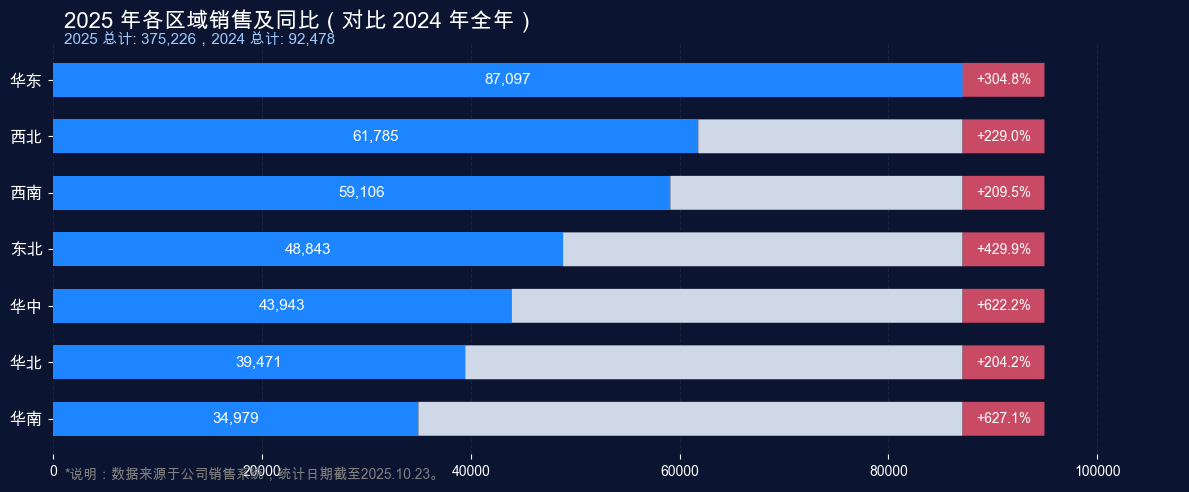

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, FancyBboxPatch
import pandas as pd

# 准备数据：按年度汇总（优先使用 paid_amount，否则使用 quantity 或 product_amount）
df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')
df_time = df.dropna(subset=['payment_date']).copy()

# 判定使用的金额字段
if 'paid_amount' in df_time.columns:
    amount_col = 'paid_amount'
elif 'product_amount' in df_time.columns:
    amount_col = 'product_amount'
elif {'unit_price', 'quantity'}.issubset(df_time.columns):
    df_time['product_amount_calc'] = df_time['unit_price'] * df_time['quantity']
    amount_col = 'product_amount_calc'
else:
    # 回退到数量作为指标（提醒用户）
    amount_col = 'quantity'

# 汇总 2025 与 2024 全年（按 region）
df_2025 = df_time[df_time['payment_date'].dt.year == 2025].copy()
df_2024 = df_time[df_time['payment_date'].dt.year == 2024].copy()

# 确保存在 region 列（若不存在，尝试用 province 映射）
if 'region' not in df_2025.columns:
    if 'province' in df_2025.columns:
        df_2025['region'] = df_2025['province'].map(region_mapping).fillna('其他')
    else:
        df_2025['region'] = '其他'
if 'region' not in df_2024.columns:
    if 'province' in df_2024.columns:
        df_2024['region'] = df_2024['province'].map(region_mapping).fillna('其他')
    else:
        df_2024['region'] = '其他'

agg_2025 = df_2025.groupby('region', as_index=True)[amount_col].sum().rename('sales_2025')
agg_2024 = df_2024.groupby('region', as_index=True)[amount_col].sum().rename('sales_2024')

comp = pd.concat([agg_2025, agg_2024], axis=1).fillna(0)
comp = comp.sort_values('sales_2025', ascending=False)
if comp.empty:
    raise ValueError('未找到 2025 或 2024 的数据用于汇总，请检查 payment_date 与金额/数量字段。')

regions = comp.index.tolist()
sales_2025 = comp['sales_2025'].values.astype(float)
sales_2024 = comp['sales_2024'].values.astype(float)

# 计算同比（%）
with np.errstate(divide='ignore', invalid='ignore'):
    yoy_pct = np.where(sales_2024 > 0, (sales_2025 - sales_2024) / sales_2024 * 100.0, np.nan)

# 绘图（深色主题，水平柱状，右侧显示占位格：浅灰销量占位格 + 固定宽度红色涨幅占位格）
bg = '#0b1430'
bar_color = '#1c85ff'
y = np.arange(len(regions))
fig, ax = plt.subplots(figsize=(12, max(5, len(regions)*0.5)))
fig.patch.set_facecolor(bg)
ax.set_facecolor(bg)

max_val = max(sales_2025.max() if len(sales_2025)>0 else 0, 1)
# 统一条与占位格的高度基准，避免粗细不一致
bar_h = 0.6
bars = ax.barh(y, sales_2025, color=bar_color, height=bar_h, zorder=3)

# 标注数值：当条宽度足够时，将销量放在蓝色条内部居中显示，否则放在条右侧
text_inside_threshold = max_val * 0.08
for yi, val, pct in zip(y, sales_2025, yoy_pct):
    if val >= text_inside_threshold:
        # 放条中间
        ax.text(val/2, yi, f'{int(val):,d}', va='center', ha='center', color='white', fontsize=11, fontweight='bold')
    else:
        # 条太窄则放在右侧
        ax.text(val + max_val*0.01, yi, f'{int(val):,d}', va='center', ha='left', color='white', fontsize=11, fontweight='bold')

# 预留右侧区域用于占位格：扩展 xlim（基于当前数据范围按比例扩展）
left_limit, right_limit = ax.get_xlim()
extra_frac = 0.18  # 给占位格留出的额外宽度比例（稍微增大以容纳更宽的红格）
ax.set_xlim(left_limit, right_limit + (right_limit - left_limit) * extra_frac)
x_min, x_max = ax.get_xlim()

# 占位格参数（基于数据坐标）
# 使用与蓝色条相同的高度基准以保证粗细一致
box_h = bar_h
box_pad = max_val * 0.02
# 使用与蓝色条（数据单位）一致的宽度基准：基于 max_val
box_w_min = max_val * 0.02
# 红色占位格宽度以蓝色基准为参考（数据单位）
box_w_fixed = max_val * 0.09
# 移除与条之间的偏移，使格子紧贴条尾
box1_start_offset = 0.0
box2_start_offset = 0.0

# 为所有行绘制右侧涨幅占位格；为非最大销量行绘制浅灰补齐格（宽度按 87097-销量），最大行不绘制浅灰格以避免重复显示
max_idx = 0
if len(sales_2025) > 0:
    try:
        max_idx = int(np.nanargmax(sales_2025))
    except Exception:
        max_idx = 0
for i, yi in enumerate(y):
    val = float(sales_2025[i]) if i < len(sales_2025) else 0.0
    # 计算浅灰格宽度：以蓝色条的基准 max_val 为顶线，补齐到 max_val 的差值（数据单位）
    gray_width = max(0.0, max_val - val)
    # 保证灰格至少有最小宽度以便可视化
    if gray_width > 0:
        gray_width = max(gray_width, box_w_min)
    else:
        gray_width = 0.0

    # 灰色补齐格从条尾开始绘制（无中间间隙）
    if i != max_idx and gray_width > 0:
        b1_left = val + box1_start_offset
        b1 = FancyBboxPatch((b1_left, yi - box_h/2), gray_width, box_h,
                            boxstyle='round,pad=0,rounding_size={}'.format(box_h/2),
                            linewidth=0, facecolor='#cfd8e6', edgecolor='none', zorder=6)
        ax.add_patch(b1)

    # 每行都绘制固定宽度的红色涨幅占位格（紧贴灰格或条尾），并将文本居中
    red_left = val + box2_start_offset + (gray_width if (i != max_idx and gray_width>0) else 0.0)
    b2 = FancyBboxPatch((red_left, yi - box_h/2), box_w_fixed, box_h,
                        boxstyle='round,pad=0,rounding_size={}'.format(box_h/2),
                        linewidth=0, facecolor='#c94a64', edgecolor='none', zorder=6)
    ax.add_patch(b2)
    # 红色格显示同比涨幅（百分比），若无历史数据则显示 '-'
    growth = yoy_pct[i] if i < len(yoy_pct) else np.nan
    if np.isfinite(growth):
        growth_str = f'{growth:+.1f}%'
    else:
        growth_str = '-'
    ax.text(red_left + box_w_fixed/2, yi, growth_str, ha='center', va='center', color='white', fontsize=10, fontweight='bold', zorder=7)

# y 轴与样式调整
ax.set_yticks(y)
ax.set_yticklabels(regions, fontsize=12, color='white')
ax.invert_yaxis()
ax.xaxis.grid(True, linestyle='--', color='#23344f', alpha=0.5)
for s in ax.spines.values():
    s.set_visible(False)

# 标题与注释
total_2025 = int(sales_2025.sum())
total_2024 = int(sales_2024.sum())
ax.text(0.01, 1.04, '2025 年各区域销售及同比（对比 2024 年全年）', transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', color='white')
ax.text(0.01, 1.00, f'2025 总计: {total_2025:,d}，2024 总计: {total_2024:,d}', transform=ax.transAxes, fontsize=11, ha='left', color='#9cc9ff')
note = '*说明：数据来源于公司销售系统，统计日期截至2025.10.23。'
ax.text(0.01, -0.06, note, transform=ax.transAxes, fontsize=10, ha='left', color='gray')

plt.tight_layout()
plt.show()

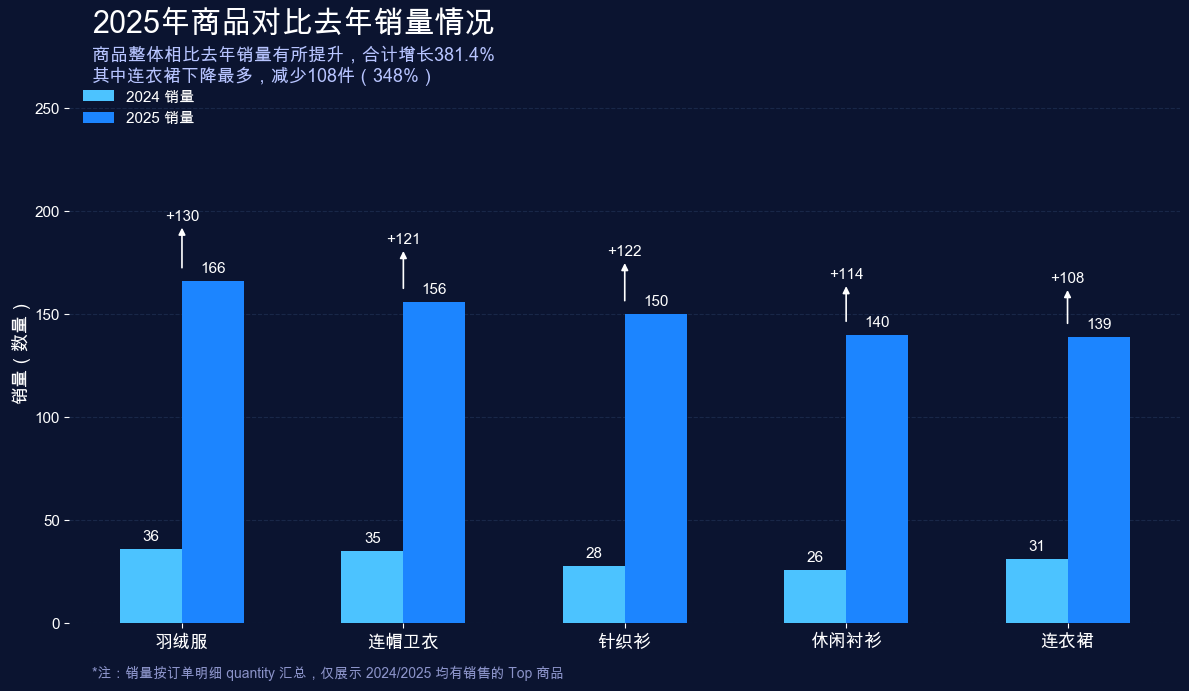

In [53]:
# 2025 年商品销量对比 2024 年（并列柱 + 差值箭头）
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Patch

df_year = df.copy()

# 基础字段检查
if 'payment_date' not in df_year.columns:
    raise ValueError('缺少字段 "payment_date"，无法按年份统计。')
if 'quantity' not in df_year.columns:
    raise ValueError('缺少字段 "quantity"，无法计算销量。')

df_year['payment_date'] = pd.to_datetime(df_year['payment_date'], errors='coerce')
df_year = df_year.dropna(subset=['payment_date'])

# 只保留 2024、2025 两年
df_year['year'] = df_year['payment_date'].dt.year
pivot = (
    df_year[df_year['year'].isin([2024, 2025])]
    .groupby(['product_name', 'year'], as_index=False)['quantity']
    .sum()
    .pivot(index='product_name', columns='year', values='quantity')
)

if pivot.empty:
    raise ValueError('没有 2024 或 2025 年的商品销量数据，请检查 payment_date / quantity 字段。')

# 补全列并填 0
for col in [2024, 2025]:
    if col not in pivot.columns:
        pivot[col] = 0
pivot = pivot.fillna(0)

# 取按 2025 销量排序的 Top N 商品
top_n = 5
pivot = pivot.sort_values(2025, ascending=False).head(top_n)

names = pivot.index.tolist()
val_2024 = pivot[2024].to_numpy(dtype=float)
val_2025 = pivot[2025].to_numpy(dtype=float)
diff = val_2025 - val_2024

x = np.arange(len(names))
bar_width = 0.28

bg_color = '#0b1430'
bar_2024_color = '#4cc3ff'   # 浅蓝
bar_2025_color = '#1c85ff'   # 深蓝
arrow_color = 'white'
grid_color = '#30466d'

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 并列柱
bars_2024 = ax.bar(x - bar_width/2, val_2024, width=bar_width,
                   color=bar_2024_color, edgecolor='none', zorder=3)
bars_2025 = ax.bar(x + bar_width/2, val_2025, width=bar_width,
                   color=bar_2025_color, edgecolor='none', zorder=3)

max_val = max(val_2024.max() if len(val_2024) > 0 else 0,
              val_2025.max() if len(val_2025) > 0 else 0)
label_offset = max_val * 0.04 if max_val > 0 else 1

# 每根柱子上的数值
for b4, b5, v4, v5 in zip(bars_2024, bars_2025, val_2024, val_2025):
    ax.text(b4.get_x() + b4.get_width()/2, v4 + label_offset*0.4,
            f'{int(v4):,d}', ha='center', va='bottom',
            fontsize=11, color='white')
    ax.text(b5.get_x() + b5.get_width()/2, v5 + label_offset*0.4,
            f'{int(v5):,d}', ha='center', va='bottom',
            fontsize=11, color='white')

# 画 2024 -> 2025 的差值箭头
for xi, v4, v5, d in zip(x, val_2024, val_2025, diff):
    base_y = max(v4, v5) + label_offset * 0.8
    top_y = base_y + abs(d) * 0.15 + label_offset * 0.4
    if d > 0:
        # 上升：向上箭头
        arrow = FancyArrowPatch((xi, base_y), (xi, top_y),
                                arrowstyle='-|>', mutation_scale=10,
                                linewidth=1.2, color=arrow_color, zorder=4)
        ax.add_patch(arrow)
        ax.text(xi, top_y + label_offset*0.1, f'+{int(d):,d}',
                ha='center', va='bottom', fontsize=11, color='white')
    elif d < 0:
        # 下降：向下箭头
        arrow = FancyArrowPatch((xi, top_y), (xi, base_y),
                                arrowstyle='-|>', mutation_scale=10,
                                linewidth=1.2, color=arrow_color, zorder=4)
        ax.add_patch(arrow)
        ax.text(xi, top_y + label_offset*0.1, f'{int(d):,d}',
                ha='center', va='bottom', fontsize=11, color='white')
    # d == 0 不画箭头

# 坐标轴与样式
ax.set_xticks(x)
ax.set_xticklabels(names, fontsize=13, color='white')
ax.set_ylabel('销量（数量）', fontsize=13, color='white')
ax.tick_params(axis='y', colors='white', labelsize=11)
ax.yaxis.grid(True, linestyle='--', color=grid_color, alpha=0.4)
ax.set_axisbelow(True)
ax.set_ylim(0, max_val * 1.6 if max_val > 0 else 10)

for spine in ax.spines.values():
    spine.set_visible(False)

# 图例
legend_elems = [
    Patch(facecolor=bar_2024_color, edgecolor='none', label='2024 销量'),
    Patch(facecolor=bar_2025_color, edgecolor='none', label='2025 销量'),
]
leg = ax.legend(handles=legend_elems, loc='upper left',
                frameon=False, fontsize=11)
for t in leg.get_texts():
    t.set_color('white')

# 标题与副标题
total_2024 = int(val_2024.sum())
total_2025 = int(val_2025.sum())
overall_change_pct = ((total_2025 - total_2024) / total_2024 * 100
                      if total_2024 > 0 else 0)

idx_max_down = int(np.argmin(diff))
name_max_down = names[idx_max_down]
val_down_abs = int(abs(diff[idx_max_down]))
val_down_pct = (diff[idx_max_down] / val_2024[idx_max_down] * 100
                if val_2024[idx_max_down] > 0 else 0)

title_text = '2025年商品对比去年销量情况'
if overall_change_pct < 0:
    sub_overall = f'商品整体相比去年销量有所下降，合计下降{abs(overall_change_pct):.1f}%'
elif overall_change_pct > 0:
    sub_overall = f'商品整体相比去年销量有所提升，合计增长{overall_change_pct:.1f}%'
else:
    sub_overall = '商品整体销量与去年基本持平'

sub_focus = f'其中{name_max_down}下降最多，减少{val_down_abs}件（{val_down_pct:.0f}%）'

ax.text(0.02, 1.08, title_text, transform=ax.transAxes,
        fontsize=22, fontweight='bold', ha='left', color='white')
ax.text(0.02, 1.03, sub_overall, transform=ax.transAxes,
        fontsize=13, ha='left', color='#b7c4ff')
ax.text(0.02, 0.99, sub_focus, transform=ax.transAxes,
        fontsize=13, ha='left', color='#b7c4ff')

note = '*注：销量按订单明细 quantity 汇总，仅展示 2024/2025 均有销售的 Top 商品'
ax.text(0.02, -0.10, note, transform=ax.transAxes,
        fontsize=10, ha='left', color='#8b93c9')

plt.tight_layout()
plt.show()

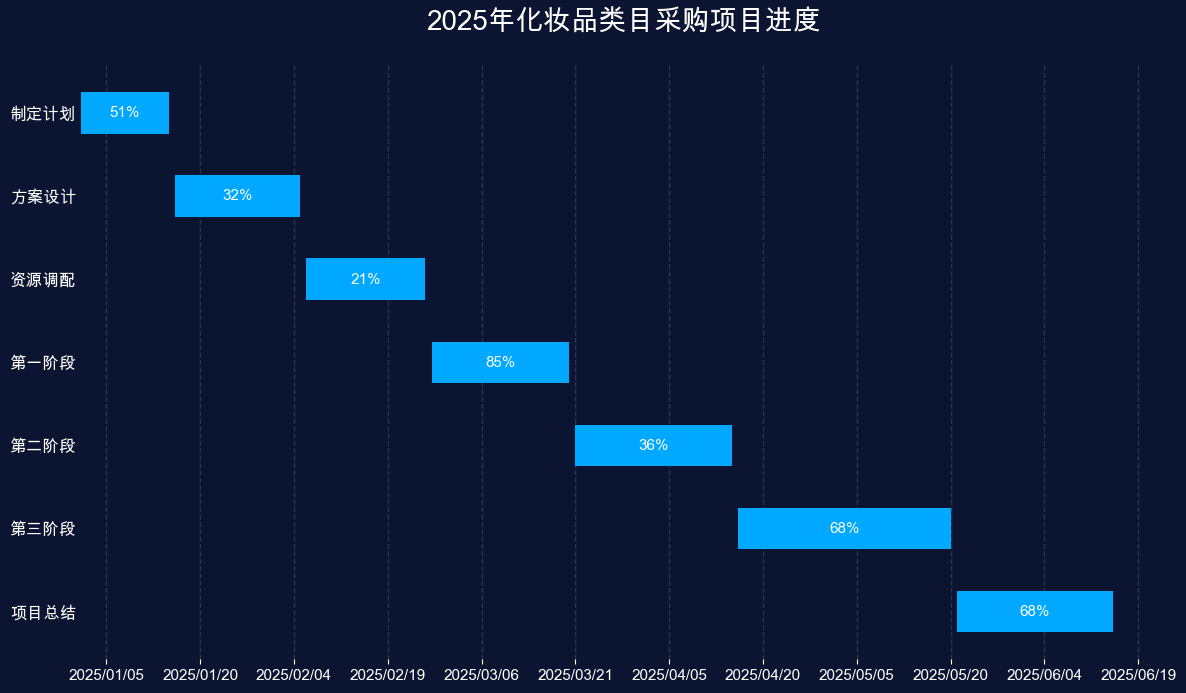

In [54]:
# 项目进度甘特图
import matplotlib.dates as mdates
from datetime import datetime

tasks = [
    ("制定计划", "2025-01-01", "2025-01-15", 51),
    ("方案设计", "2025-01-16", "2025-02-05", 32),
    ("资源调配", "2025-02-06", "2025-02-25", 21),
    ("第一阶段", "2025-02-26", "2025-03-20", 85),
    ("第二阶段", "2025-03-21", "2025-04-15", 36),
    ("第三阶段", "2025-04-16", "2025-05-20", 68),
    ("项目总结", "2025-05-21", "2025-06-15", 68),
]

task_names = [t[0] for t in tasks]
start_dates = [datetime.strptime(t[1], "%Y-%m-%d") for t in tasks]
end_dates = [datetime.strptime(t[2], "%Y-%m-%d") for t in tasks]
percents = [t[3] for t in tasks]
durations = [(e - s).days for s, e in zip(start_dates, end_dates)]
y_pos = range(len(tasks))

bg_color = "#0b1430"
bar_color = "#00A8FF"
grid_color = "#3b4a6a"

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

for y, start, dur, p in zip(y_pos, start_dates, durations, percents):
    ax.barh(
        y,
        dur,
        left=start,
        height=0.5,
        color=bar_color,
        edgecolor=bar_color,
        linewidth=0,
        zorder=3,
    )
    mid = start + (dur / 2) * mdates.num2timedelta(1)  # 中点
    ax.text(
        mid,
        y,
        f"{p}%",
        color="white",
        fontsize=11,
        fontweight="bold",
        ha="center",
        va="center",
    )

ax.set_yticks(list(y_pos))
ax.set_yticklabels(task_names, fontsize=12, color="white")

ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m/%d"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", fontsize=11, color="white")

for tick in ax.get_xticks():
    ax.axvline(
        x=mdates.num2date(tick),
        color=grid_color,
        linestyle="--",
        linewidth=1,
        alpha=0.6,
        zorder=1,
    )

ax.invert_yaxis()
ax.tick_params(axis="y", length=0)
ax.tick_params(axis="x", colors="white")
for spine in ax.spines.values():
    spine.set_visible(False)

ax.text(
    0.5,
    1.06,
    "2025年化妆品类目采购项目进度",
    transform=ax.transAxes,
    fontsize=20,
    fontweight="bold",
    ha="center",
    color="white",
)

plt.tight_layout()
plt.show()

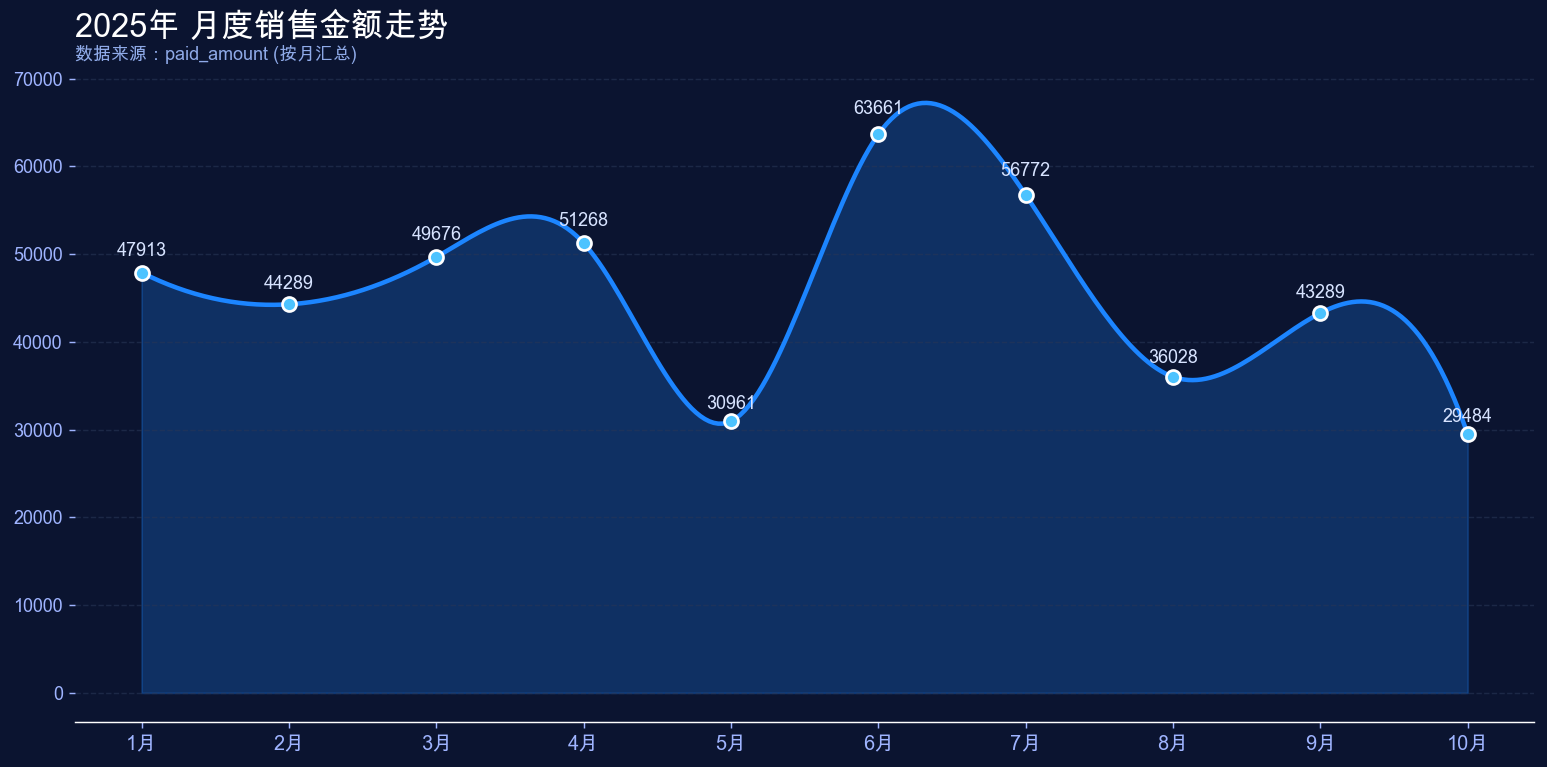

In [55]:
# 2025年 月度销售金额平滑折线图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# 1. 选取日期和金额字段
df_line = df.copy()
date_col = None
for c in ['payment_date', 'order_date', 'create_time']:
    if c in df_line.columns:
        date_col = c
        break
if date_col is None:
    raise ValueError('找不到日期字段')

amount_col = None
for c in ['paid_amount', 'product_amount', 'amount', 'total_amount']:
    if c in df_line.columns:
        amount_col = c
        break
if amount_col is None:
    if 'quantity' in df_line.columns and 'unit_price' in df_line.columns:
        amount_col = '__tmp_amount__'
        df_line[amount_col] = df_line['quantity'] * df_line['unit_price']
    else:
        raise ValueError('找不到金额字段')

# 2. 筛选 2025 年并按月汇总
df_line[date_col] = pd.to_datetime(df_line[date_col])
df_2025 = df_line[df_line[date_col].dt.year == 2025].copy()

if len(df_2025) == 0:
    # 如果没有2025数据，抛出异常提示
    raise ValueError("当前数据中没有 2025 年的记录，请检查日期列或数据源。")

# 按月汇总
monthly = df_2025.groupby(df_2025[date_col].dt.month)[amount_col].sum().reset_index()
monthly.columns = ['month', 'amount']
monthly = monthly.sort_values('month')

# 补全月份（只补全到有数据的最大月份，避免未来月份掉零）
max_month = monthly['month'].max()
all_months = pd.DataFrame({'month': range(1, int(max_month) + 1)})
monthly = pd.merge(all_months, monthly, on='month', how='left').fillna(0)

# 3. 构造平滑曲线
if len(monthly) >= 3:
    x = monthly['month'].values
    y = monthly['amount'].values
    x_new = np.linspace(x.min(), x.max(), 300)
    # 数据点少时降低阶数
    k_val = 3 if len(monthly) > 3 else 2
    spl = make_interp_spline(x, y, k=k_val)
    y_smooth = spl(x_new)
    y_smooth = np.maximum(y_smooth, 0) # 修正负值
else:
    x_new = monthly['month'].values
    y_smooth = monthly['amount'].values

# 4. 画图
plt.close('all')
plt.style.use('dark_background')
bg_color = '#0b1430'
line_color = '#1c85ff'
area_color = '#1c85ff'
dot_color = '#4cc3ff'
grid_color = '#283656'

fig, ax = plt.subplots(figsize=(12, 6), dpi=130)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 面积与线
ax.fill_between(x_new, y_smooth, 0, color=area_color, alpha=0.25, zorder=1)
ax.plot(x_new, y_smooth, color=line_color, linewidth=2.5, zorder=2)

# 原始点
ax.scatter(monthly['month'], monthly['amount'], color=dot_color, s=60, zorder=3, edgecolors='white', linewidth=1.5)

# 标注数值
for i, row in monthly.iterrows():
    ax.text(row['month'], row['amount'] * 1.03, f"{row['amount']:.0f}", 
            color='#d7e3ff', fontsize=10, ha='center', va='bottom', fontweight='bold')

# 坐标轴
ax.set_xticks(monthly['month'])
ax.set_xticklabels([f"{int(m)}月" for m in monthly['month']])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='y', color=grid_color, linestyle='--', linewidth=0.8, alpha=0.6)
ax.tick_params(axis='x', colors='#9fb4ff', labelsize=11)
ax.tick_params(axis='y', colors='#9fb4ff', labelsize=10)

# 标题
ax.set_title('2025年 月度销售金额走势', fontsize=18, color='white', pad=20, loc='left')
ax.text(0, 1.02, f"数据来源：{amount_col} (按月汇总)", transform=ax.transAxes, color='#8faae8', fontsize=10)

plt.tight_layout()
plt.show()

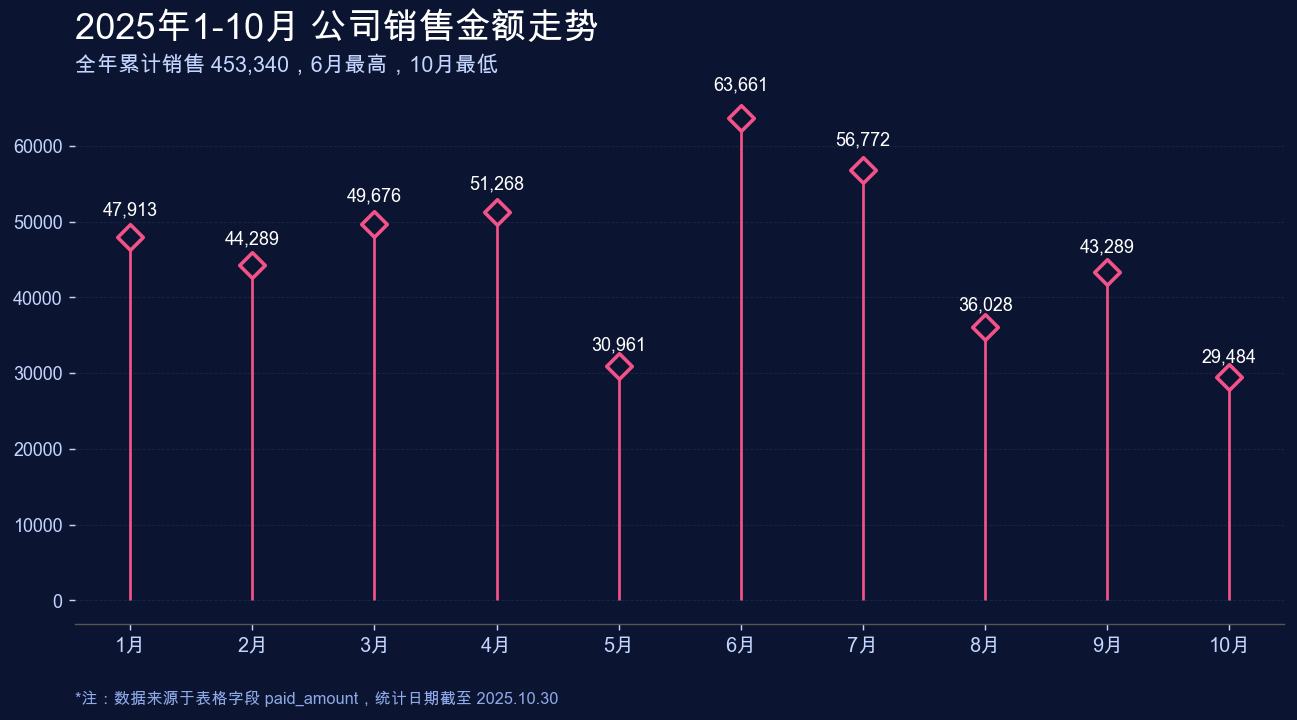

In [56]:
# 2025年 月度销售金额棒棒糖图（Lollipop Chart）- 参考样式
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据准备
df_line = df.copy()
date_col = None
for c in ['payment_date', 'order_date', 'create_time']:
    if c in df_line.columns:
        date_col = c
        break
if date_col is None:
    raise ValueError('找不到日期字段')

amount_col = None
for c in ['paid_amount', 'product_amount', 'amount', 'total_amount']:
    if c in df_line.columns:
        amount_col = c
        break
if amount_col is None:
    if 'quantity' in df_line.columns and 'unit_price' in df_line.columns:
        amount_col = '__tmp_amount__'
        df_line[amount_col] = df_line['quantity'] * df_line['unit_price']
    else:
        raise ValueError('找不到金额字段')

# 筛选 2025 年并按月汇总
df_line[date_col] = pd.to_datetime(df_line[date_col])
df_2025 = df_line[df_line[date_col].dt.year == 2025].copy()

if len(df_2025) == 0:
    raise ValueError("当前数据中没有 2025 年的记录，请检查日期列或数据源。")

monthly = df_2025.groupby(df_2025[date_col].dt.month)[amount_col].sum().reset_index()
monthly.columns = ['month', 'amount']
monthly = monthly.sort_values('month')

# 补全月份
max_month = monthly['month'].max()
all_months = pd.DataFrame({'month': range(1, int(max_month) + 1)})
monthly = pd.merge(all_months, monthly, on='month', how='left').fillna(0)

# 统计信息用于副标题
total_sales = monthly['amount'].sum()
max_month_row = monthly.loc[monthly['amount'].idxmax()]
min_month_row = monthly.loc[monthly['amount'].idxmin()]

# 2. 画图
plt.close('all')
plt.style.use('dark_background')
bg_color = '#0b1430'
stem_color = '#f25287' # 参考图中的红/粉色
text_color = '#ffffff'
grid_color = '#283656'

fig, ax = plt.subplots(figsize=(12, 6), dpi=130)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 绘制棒棒糖图 (Stem Chart)
# 垂直线
ax.vlines(x=monthly['month'], ymin=0, ymax=monthly['amount'], 
          color=stem_color, linewidth=1.5, zorder=2)

# 顶部菱形标记 (空心效果：背景色填充，边框颜色)
ax.scatter(monthly['month'], monthly['amount'], 
           s=100, marker='D', 
           facecolor=bg_color, edgecolors=stem_color, linewidth=2, 
           zorder=3)

# 标注数值
for i, row in monthly.iterrows():
    ax.text(row['month'], row['amount'] * 1.05, f"{row['amount']:,.0f}", 
            color=text_color, fontsize=10, ha='center', va='bottom')

# 坐标轴与网格
ax.set_xticks(monthly['month'])
ax.set_xticklabels([f"{int(m)}月" for m in monthly['month']])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# 底部轴线颜色
ax.spines['bottom'].set_color('#555555')

# 只保留横向网格，且比较淡
ax.grid(axis='y', color=grid_color, linestyle='--', linewidth=0.5, alpha=0.5)
ax.tick_params(axis='x', colors='#c3d4ff', labelsize=11)
ax.tick_params(axis='y', colors='#c3d4ff', labelsize=10)
# 隐藏Y轴轴线，只留刻度文字
ax.spines['left'].set_visible(False)

# 标题与副标题
title = '2025年1-{}月 公司销售金额走势'.format(int(max_month))
subtitle = f"全年累计销售 {total_sales:,.0f}，{int(max_month_row['month'])}月最高，{int(min_month_row['month'])}月最低"
note = f"*注：数据来源于表格字段 {amount_col}，统计日期截至 2025.{int(max_month)}.30"

ax.set_title(title, fontsize=20, color='white', pad=30, loc='left', fontweight='bold')
ax.text(0, 1.04, subtitle, transform=ax.transAxes, color='#c3d4ff', fontsize=12, ha='left')
ax.text(0, -0.15, note, transform=ax.transAxes, color='#8faae8', fontsize=9, ha='left')

# 调整下边距以显示注脚
plt.subplots_adjust(bottom=0.2)

plt.show()

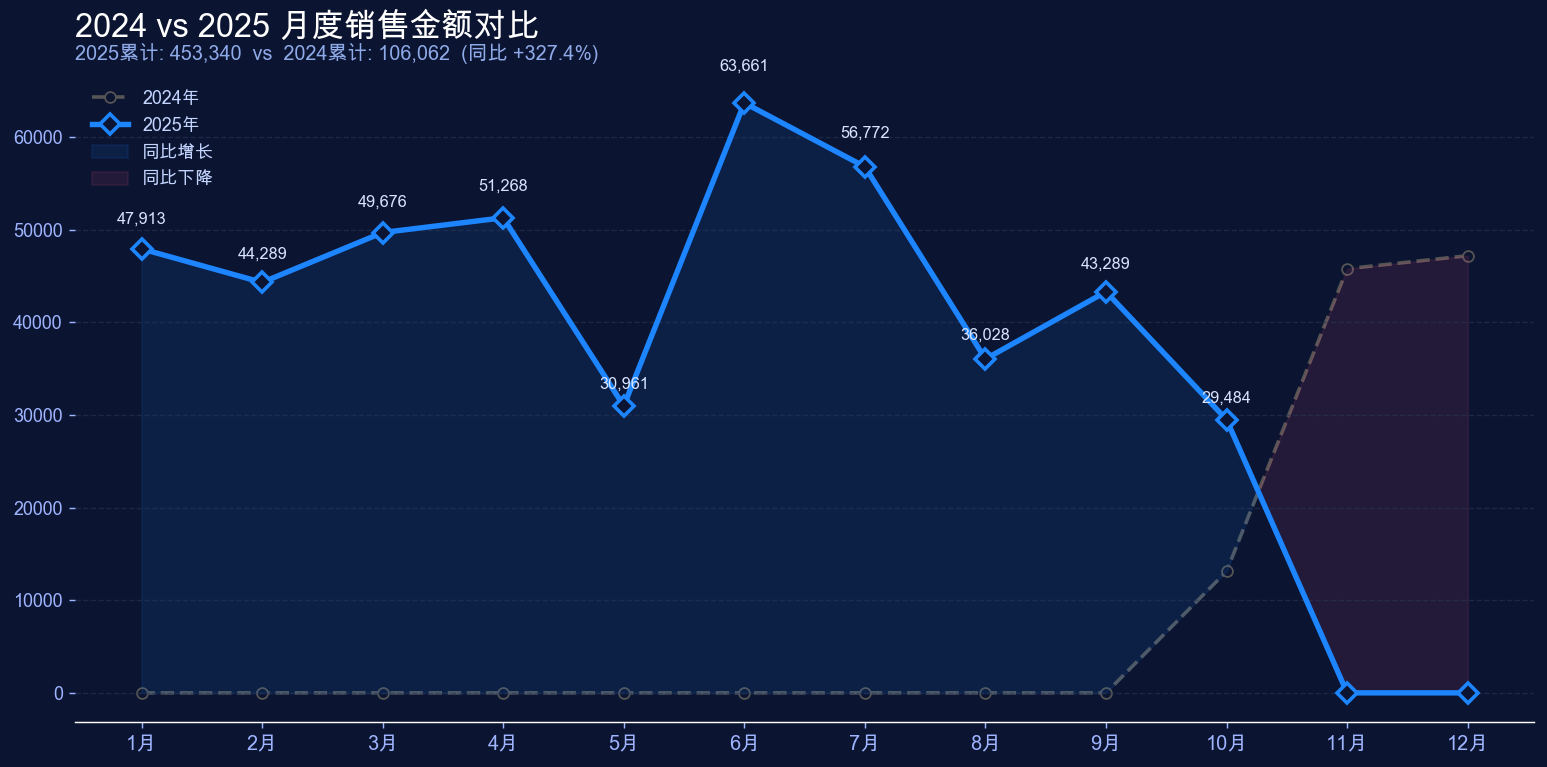

In [57]:
# 2024 vs 2025 月度销售金额对比折线图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据准备
df_line = df.copy()
date_col = None
for c in ['payment_date', 'order_date', 'create_time']:
    if c in df_line.columns:
        date_col = c
        break
if date_col is None:
    raise ValueError('找不到日期字段')

amount_col = None
for c in ['paid_amount', 'product_amount', 'amount', 'total_amount']:
    if c in df_line.columns:
        amount_col = c
        break
if amount_col is None:
    if 'quantity' in df_line.columns and 'unit_price' in df_line.columns:
        amount_col = '__tmp_amount__'
        df_line[amount_col] = df_line['quantity'] * df_line['unit_price']
    else:
        raise ValueError('找不到金额字段')

# 转换日期
df_line[date_col] = pd.to_datetime(df_line[date_col])

# 分别提取 2024 和 2025 数据
df_2024 = df_line[df_line[date_col].dt.year == 2024].copy()
df_2025 = df_line[df_line[date_col].dt.year == 2025].copy()

# 按月汇总
monthly_2024 = df_2024.groupby(df_2024[date_col].dt.month)[amount_col].sum().reset_index()
monthly_2024.columns = ['month', 'amount_2024']

monthly_2025 = df_2025.groupby(df_2025[date_col].dt.month)[amount_col].sum().reset_index()
monthly_2025.columns = ['month', 'amount_2025']

# 合并数据
all_months = pd.DataFrame({'month': range(1, 13)})
comp_df = pd.merge(all_months, monthly_2024, on='month', how='left')
comp_df = pd.merge(comp_df, monthly_2025, on='month', how='left')
comp_df = comp_df.fillna(0)

# 2. 画图
plt.close('all')
plt.style.use('dark_background')
bg_color = '#0b1430'
color_2024 = '#555555' # 灰色，表示过去
color_2025 = '#1c85ff' # 亮蓝色，表示现在
grid_color = '#283656'

fig, ax = plt.subplots(figsize=(12, 6), dpi=130)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 绘制 2024 曲线 (虚线，作为背景参考)
ax.plot(comp_df['month'], comp_df['amount_2024'], 
        color=color_2024, linestyle='--', linewidth=2, 
        marker='o', markersize=6, markerfacecolor=bg_color, markeredgecolor=color_2024,
        label='2024年', zorder=1)

# 绘制 2025 曲线 (实线，高亮)
ax.plot(comp_df['month'], comp_df['amount_2025'], 
        color=color_2025, linestyle='-', linewidth=3, 
        marker='D', markersize=8, markerfacecolor=bg_color, markeredgecolor=color_2025, markeredgewidth=2,
        label='2025年', zorder=2)

# 填充两条线之间的区域 (表示增长/下降)
ax.fill_between(comp_df['month'], comp_df['amount_2024'], comp_df['amount_2025'], 
                where=(comp_df['amount_2025'] >= comp_df['amount_2024']),
                interpolate=True, color=color_2025, alpha=0.1, label='同比增长')
ax.fill_between(comp_df['month'], comp_df['amount_2024'], comp_df['amount_2025'], 
                where=(comp_df['amount_2025'] < comp_df['amount_2024']),
                interpolate=True, color='#f25287', alpha=0.1, label='同比下降')

# 标注 2025 数值
for i, row in comp_df.iterrows():
    if row['amount_2025'] > 0:
        ax.text(row['month'], row['amount_2025'] * 1.05, f"{row['amount_2025']:,.0f}", 
                color='#d7e3ff', fontsize=9, ha='center', va='bottom', fontweight='bold')

# 坐标轴与网格
ax.set_xticks(comp_df['month'])
ax.set_xticklabels([f"{int(m)}月" for m in comp_df['month']])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='y', color=grid_color, linestyle='--', linewidth=0.8, alpha=0.6)
ax.tick_params(axis='x', colors='#9fb4ff', labelsize=11)
ax.tick_params(axis='y', colors='#9fb4ff', labelsize=10)

# 图例
legend = ax.legend(loc='upper left', frameon=False, fontsize=10)
for text in legend.get_texts():
    text.set_color('#c3d4ff')

# 标题
total_2024 = comp_df['amount_2024'].sum()
total_2025 = comp_df['amount_2025'].sum()
diff_pct = (total_2025 - total_2024) / total_2024 * 100 if total_2024 != 0 else 0
diff_str = f"+{diff_pct:.1f}%" if diff_pct > 0 else f"{diff_pct:.1f}%"

ax.set_title('2024 vs 2025 月度销售金额对比', fontsize=18, color='white', pad=20, loc='left')
ax.text(0, 1.02, f"2025累计: {total_2025:,.0f}  vs  2024累计: {total_2024:,.0f}  (同比 {diff_str})", 
        transform=ax.transAxes, color='#8faae8', fontsize=11)

plt.tight_layout()
plt.show()

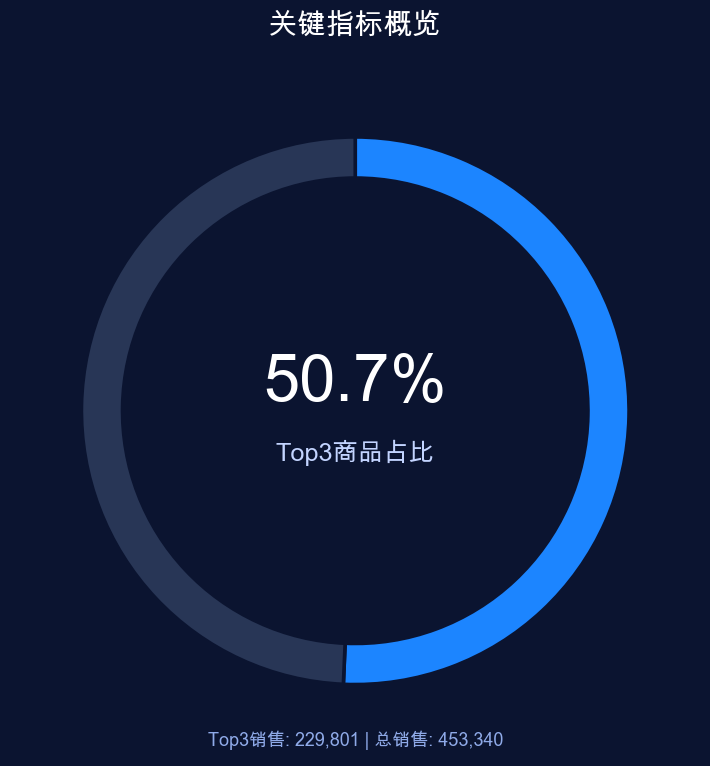

In [58]:
# 2025年 利润率单值圆环图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据准备
df_donut = df.copy()
date_col = None
for c in ['payment_date', 'order_date', 'create_time']:
    if c in df_donut.columns:
        date_col = c
        break
if date_col is None:
    raise ValueError('找不到日期字段')

# 确定金额与成本字段
amount_col = None
for c in ['paid_amount', 'product_amount', 'amount', 'total_amount']:
    if c in df_donut.columns:
        amount_col = c
        break
if amount_col is None:
    if 'quantity' in df_donut.columns and 'unit_price' in df_donut.columns:
        amount_col = '__tmp_amount__'
        df_donut[amount_col] = df_donut['quantity'] * df_donut['unit_price']
    else:
        raise ValueError('找不到金额字段')

cost_col = None
for c in ['cost_amount', 'cost', 'total_cost']:
    if c in df_donut.columns:
        cost_col = c
        break

# 筛选 2025 年数据
df_donut[date_col] = pd.to_datetime(df_donut[date_col])
df_2025 = df_donut[df_donut[date_col].dt.year == 2025].copy()

if len(df_2025) == 0:
    raise ValueError("当前数据中没有 2025 年的记录")

# 计算总销售额与总利润
total_sales_2025 = df_2025[amount_col].sum()

if cost_col:
    total_cost_2025 = df_2025[cost_col].sum()
    total_profit_2025 = total_sales_2025 - total_cost_2025
    margin_pct = total_profit_2025 / total_sales_2025 if total_sales_2025 != 0 else 0
    label_text = "2025年利润率"
    sub_text = f"销售: {total_sales_2025:,.0f} | 利润: {total_profit_2025:,.0f}"
else:
    # 如果没有成本字段，计算 Top 3 商品的销售占比
    top_3_sales = df_2025.groupby('product_name')[amount_col].sum().nlargest(3).sum()
    margin_pct = top_3_sales / total_sales_2025 if total_sales_2025 != 0 else 0
    label_text = "Top3商品占比"
    sub_text = f"Top3销售: {top_3_sales:,.0f} | 总销售: {total_sales_2025:,.0f}"

# 2. 画图
plt.close('all')
plt.style.use('dark_background')
bg_color = '#0b1430'
active_color = '#1c85ff' # 亮蓝色
base_color = '#283656'   # 深灰蓝底色

fig, ax = plt.subplots(figsize=(6, 6), dpi=130)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 绘制圆环
# 数据：[进度, 剩余]
sizes = [margin_pct, 1 - margin_pct]
colors = [active_color, base_color]

# 绘制 Pie Chart，设置 wedgeprops width 实现圆环
wedges, texts = ax.pie(sizes, colors=colors, startangle=90, counterclock=False,
                       wedgeprops={'width': 0.15, 'edgecolor': bg_color, 'linewidth': 2})

# 中心文本
ax.text(0, 0.1, f"{margin_pct:.1%}", ha='center', va='center', fontsize=36, color='white', fontweight='bold')
ax.text(0, -0.15, label_text, ha='center', va='center', fontsize=14, color='#c3d4ff')

# 底部说明
ax.text(0, -1.2, sub_text, ha='center', va='center', fontsize=10, color='#8faae8')

# 标题
ax.set_title('关键指标概览', fontsize=16, color='white', pad=20)

plt.tight_layout()
plt.show()

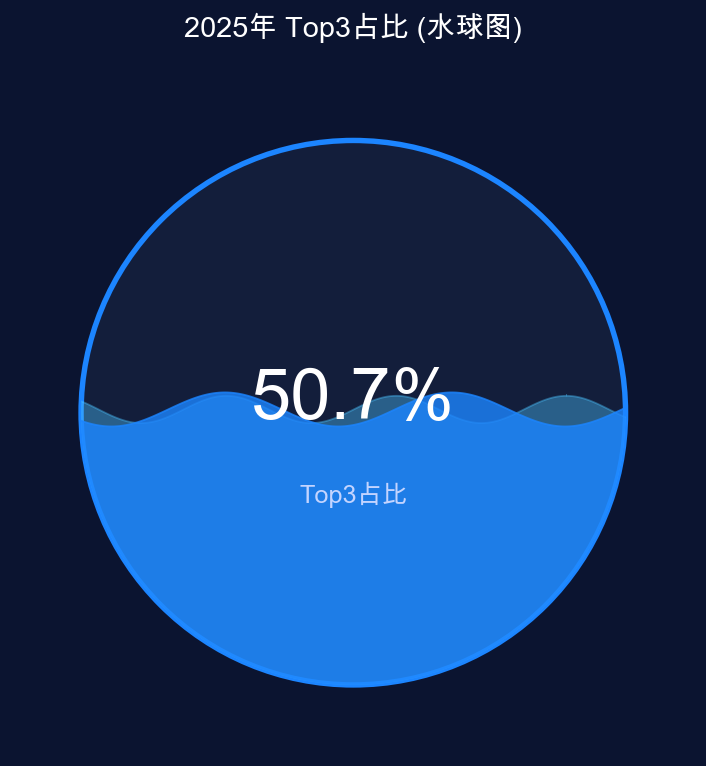

In [59]:
# 水球图
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

df_liquid = df.copy()
date_col = None
for c in ['payment_date', 'order_date', 'create_time']:
    if c in df_liquid.columns:
        date_col = c
        break
if date_col is None:
    raise ValueError('找不到日期字段')

amount_col = None
for c in ['paid_amount', 'product_amount', 'amount', 'total_amount']:
    if c in df_liquid.columns:
        amount_col = c
        break
if amount_col is None:
    if 'quantity' in df_liquid.columns and 'unit_price' in df_liquid.columns:
        amount_col = '__tmp_amount__'
        df_liquid[amount_col] = df_liquid['quantity'] * df_liquid['unit_price']
    else:
        raise ValueError('找不到金额字段')

cost_col = None
for c in ['cost_amount', 'cost', 'total_cost']:
    if c in df_liquid.columns:
        cost_col = c
        break

# 筛选 2025 年
df_liquid[date_col] = pd.to_datetime(df_liquid[date_col])
df_2025 = df_liquid[df_liquid[date_col].dt.year == 2025].copy()

if len(df_2025) == 0:
    raise ValueError("当前数据中没有 2025 年的记录")

# 计算指标
total_sales_2025 = df_2025[amount_col].sum()
if cost_col:
    total_cost_2025 = df_2025[cost_col].sum()
    total_profit_2025 = total_sales_2025 - total_cost_2025
    pct = total_profit_2025 / total_sales_2025 if total_sales_2025 != 0 else 0
    label_text = "利润率"
else:
    top_3_sales = df_2025.groupby('product_name')[amount_col].sum().nlargest(3).sum()
    pct = top_3_sales / total_sales_2025 if total_sales_2025 != 0 else 0
    label_text = "Top3占比"

display_pct = max(0.0, min(1.0, pct))

plt.close('all')
plt.style.use('dark_background')
bg_color = '#0b1430'
water_color = '#1c85ff'
water_color_light = '#4cc3ff'
container_color = '#283656'

fig, ax = plt.subplots(figsize=(6, 6), dpi=130)
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')

circle_center = (0.5, 0.5)
radius = 0.4
circle_bg = Circle(circle_center, radius, color=container_color, alpha=0.3)
ax.add_patch(circle_bg)
circle_border = Circle(circle_center, radius, color=water_color, fill=False, linewidth=3)
ax.add_patch(circle_border)

x = np.linspace(0, 1, 500)
water_level = 0.5 - radius + (2 * radius * display_pct)
amplitude1 = 0.02
frequency1 = 8
phase1 = 0
y_wave1 = water_level + amplitude1 * np.sin(frequency1 * x * np.pi + phase1)

amplitude2 = 0.025
frequency2 = 6
phase2 = 2
y_wave2 = water_level + amplitude2 * np.sin(frequency2 * x * np.pi + phase2)

clip_circle = Circle(circle_center, radius, transform=ax.transData)

wave_poly1 = ax.fill_between(x, 0, y_wave1, color=water_color_light, alpha=0.4)
wave_poly1.set_clip_path(clip_circle)

wave_poly2 = ax.fill_between(x, 0, y_wave2, color=water_color, alpha=0.8)
wave_poly2.set_clip_path(clip_circle)

ax.text(0.5, 0.52, f"{pct:.1%}", ha='center', va='center', fontsize=40, color='white', fontweight='bold', zorder=10)
ax.text(0.5, 0.38, label_text, ha='center', va='center', fontsize=14, color='#c3d4ff', zorder=10)

ax.set_title(f'2025年 {label_text} (水球图)', fontsize=16, color='white', pad=20)

plt.tight_layout()
plt.show()

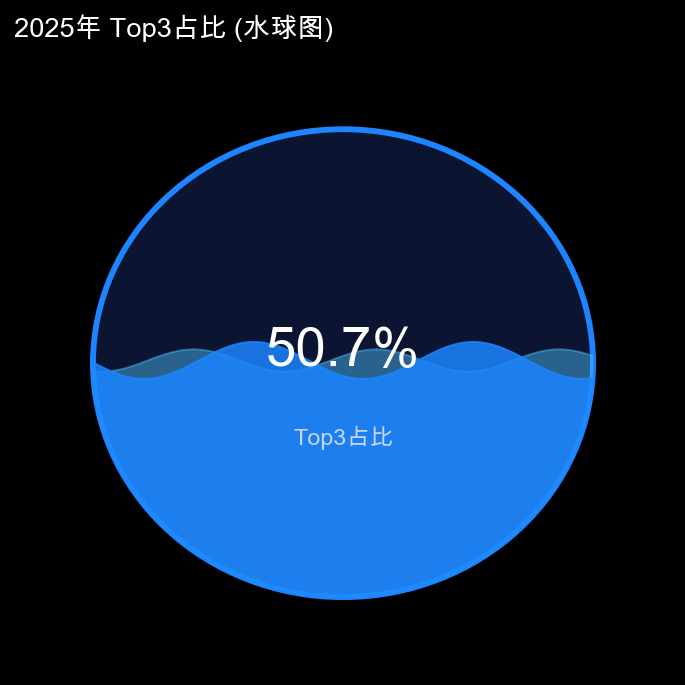

In [60]:
# 静态波浪水球图（无动画）
# 显示 2025 年利润率或 Top3 占比，使用单条波形并裁剪到圆形
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# --- 数据准备 ---
df_w = df.copy()
# 选择日期
date_col = next((c for c in ['payment_date','order_date','create_time'] if c in df_w.columns), None)
if date_col is None:
    raise ValueError('找不到日期字段')
# 选择金额
amount_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df_w.columns), None)
if amount_col is None:
    if 'quantity' in df_w.columns and 'unit_price' in df_w.columns:
        amount_col = '__tmp_amount__'
        df_w[amount_col] = df_w['quantity'] * df_w['unit_price']
    else:
        raise ValueError('找不到金额字段')
# 成本字段（可选）
cost_col = next((c for c in ['cost_amount','cost','total_cost'] if c in df_w.columns), None)

# 筛选 2025 年数据
df_w[date_col] = pd.to_datetime(df_w[date_col])
df_2025 = df_w[df_w[date_col].dt.year == 2025].copy()
if df_2025.shape[0] == 0:
    raise ValueError('当前数据没有 2025 年记录，请检查数据源')

# 指标计算
total_sales = df_2025[amount_col].sum()
if cost_col:
    total_cost = df_2025[cost_col].sum()
    total_profit = total_sales - total_cost
    pct = total_profit / total_sales if total_sales != 0 else 0.0
    label = '利润率'
else:
    # 回退为 Top3 占比
    if 'product_name' in df_2025.columns:
        top3 = df_2025.groupby('product_name')[amount_col].sum().nlargest(3).sum()
        pct = top3 / total_sales if total_sales != 0 else 0.0
        label = 'Top3占比'
    else:
        pct = 0.0
        label = '占比'

# 限制显示范围并保持原始百分比用于文本
display_pct = float(np.clip(pct, 0.0, 1.0))

# --- 绘图（静态波浪） ---
plt.close('all')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(5,5), dpi=140)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.axis('off')

center=(0.5,0.5)
radius=0.38
# 外圈容器
container = Circle(center, radius, facecolor='#0b1430', edgecolor='#1c85ff', linewidth=3, zorder=1)
ax.add_patch(container)

# 生成单条波形
x = np.linspace(0,1,600)
water_level = 0.5 - radius + (2*radius*display_pct)
amp = 0.03
freq = 3.0
phase = 1.0
y_wave = water_level + amp * np.sin(2*np.pi*freq*x + phase)

# 绘制波浪并裁剪到圆形
wave = ax.fill_between(x, 0, y_wave, color='#1c85ff', alpha=0.85, zorder=3)
wave.set_clip_path(container)

# 为了更有层次，添加一层较浅的后景波纹
y_wave2 = water_level + (amp*0.6) * np.sin(2*np.pi*(freq*1.2)*x + phase + 0.7)
wave2 = ax.fill_between(x, 0, y_wave2, color='#4cc3ff', alpha=0.45, zorder=2)
wave2.set_clip_path(container)

# 中心文本
ax.text(0.5, 0.52, f"{pct:.1%}", ha='center', va='center', fontsize=28, color='white', fontweight='bold', zorder=10)
ax.text(0.5, 0.38, label, ha='center', va='center', fontsize=12, color='#c3d4ff', zorder=10)

# 标题与说明
ax.set_title(f'2025年 {label} (水球图)', fontsize=14, color='white', pad=10, loc='left')

plt.tight_layout()
plt.show()

/var/folders/k7/n7_ph9fs26558rthw4gbgc8m0000gn/T/ipykernel_21514/306655504.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_2025.groupby('price_bucket')[amount_col].sum().reset_index()


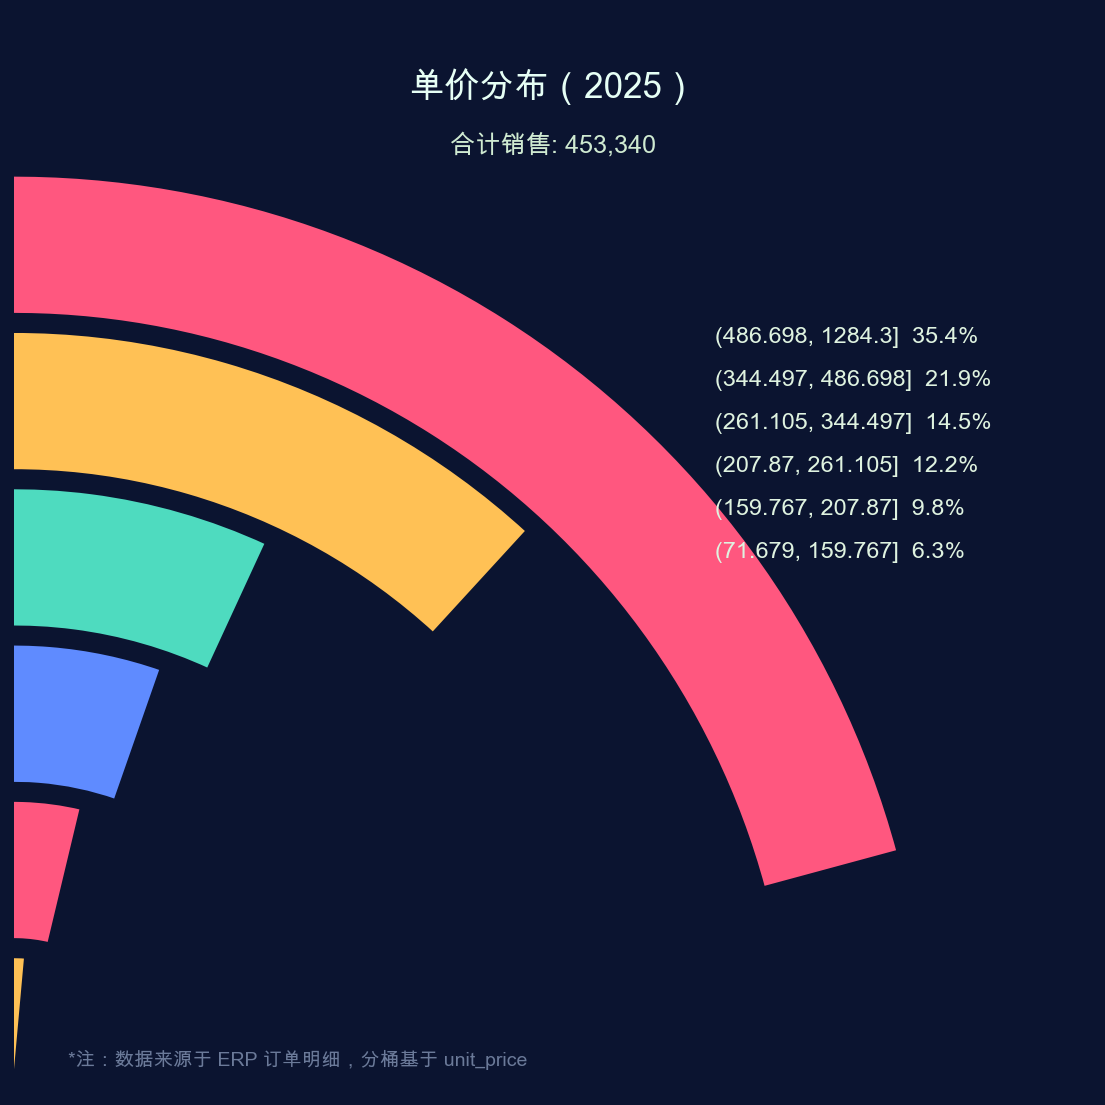

In [61]:
# 玉玦同心环图（绘图样式参考单元格20，数据保留为 2025 年单价分桶）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
import matplotlib.transforms as transforms

# 1. 数据准备（保留数据口径，仅替换绘图样式）
df_jade = df.copy()
# 自动选择日期与金额列
date_col = next((c for c in ['payment_date','order_date','create_time'] if c in df_jade.columns), None)
if date_col is None:
    raise ValueError('找不到日期字段')
amount_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df_jade.columns), None)
if amount_col is None:
    if 'quantity' in df_jade.columns and 'unit_price' in df_jade.columns:
        amount_col = '__tmp_amount__'
        df_jade[amount_col] = df_jade['quantity'] * df_jade['unit_price']
    else:
        raise ValueError('找不到金额字段')

# 构造单价列
if 'unit_price' in df_jade.columns:
    df_jade['unit_price_calc'] = pd.to_numeric(df_jade['unit_price'], errors='coerce')
else:
    if 'quantity' in df_jade.columns:
        df_jade['unit_price_calc'] = df_jade[amount_col] / df_jade['quantity'].replace({0:np.nan})
    else:
        df_jade['unit_price_calc'] = df_jade[amount_col]

# 筛选 2025 年数据
df_jade[date_col] = pd.to_datetime(df_jade[date_col])
df_2025 = df_jade[df_jade[date_col].dt.year == 2025].copy()
if df_2025.shape[0] == 0:
    raise ValueError('当前数据中没有 2025 年记录，请检查数据源')

# 删除缺失单价
df_2025 = df_2025.dropna(subset=['unit_price_calc'])

# 分桶（优先 qcut，退回等宽）
n_bins = 6
try:
    df_2025['price_bucket'] = pd.qcut(df_2025['unit_price_calc'], q=n_bins, duplicates='drop')
except Exception:
    minp = df_2025['unit_price_calc'].min()
    maxp = df_2025['unit_price_calc'].max()
    bins = np.linspace(minp, maxp, n_bins+1)
    df_2025['price_bucket'] = pd.cut(df_2025['unit_price_calc'], bins=bins, include_lowest=True)

agg = df_2025.groupby('price_bucket')[amount_col].sum().reset_index()
agg = agg.sort_values(amount_col, ascending=False)
labels = agg['price_bucket'].astype(str).tolist()
values = agg[amount_col].astype(float).tolist()
values = np.array(values, dtype=float)
if values.sum() == 0:
    values = np.ones_like(values)
shares = values / values.sum()  # 各桶占比（用于弧长）
percentages = [f"{s*100:.1f}%" for s in shares]

# 2. 视觉参数设置（完全参考单元格20）
plt.close('all')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 8), dpi=140)
bg_color = '#0b1430'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 环的几何参数（参考20）
outer_r = 0.85      # 最外环的外径
thickness = 0.13    # 环的厚度/宽度
gap = 0.015         # 环之间的间隔
n = len(shares)

# 弧长分配与角度（参考20）
startangle_end = 100.0  # 弧段的结束角（左上角偏上）
max_arc_deg = 240.0     # 弧段的总跨度（逆时针）
arc_degs = max_arc_deg * shares

# 颜色（参考20的红-黄-青绿-蓝；若桶数>4，循环使用）
base_colors = ['#ff577f', '#ffc155', '#4edbbf', '#5f8bff']
colors = [base_colors[i % len(base_colors)] for i in range(n)]

current_r = outer_r
wedges = []

# 3. 绘制同心环形图（参考20）
for i in range(n):
    theta2 = startangle_end
    theta1 = startangle_end - arc_degs[i]
    w = Wedge(center=(0, 0), r=current_r, theta1=theta1, theta2=theta2,
              width=thickness, facecolor=colors[i], edgecolor=bg_color, linewidth=2.0, zorder=3)
    ax.add_patch(w)
    wedges.append(w)
    current_r -= (thickness + gap)

# 4. 文本与右侧标签（参考20）
ax.text(0.5, 0.95, '单价分布（2025）', ha='center', va='top', 
        fontsize=18, color='#e6fff5', fontweight='bold', transform=ax.transAxes)
ax.text(0.5, 0.89, f"合计销售: {values.sum():,.0f}", ha='center', va='top', 
        fontsize=13, color='#cfead1', transform=ax.transAxes)

legend_x = 0.65
legend_y_start = 0.70
legend_spacing = 0.04
for i, (lab, pct) in enumerate(zip(labels, percentages)):
    ax.text(legend_x, legend_y_start - i * legend_spacing, 
            f"{lab}  {pct}", ha='left', va='center', fontsize=12, color='#dff3e0', transform=ax.transAxes)

# 注释（参考20）
ax.text(0.05, 0.02, '*注：数据来源于 ERP 订单明细，分桶基于 unit_price', 
        ha='left', va='bottom', fontsize=10, color='#6b7a99', transform=ax.transAxes)

# 5. 清理和展示（参考20）
ax.set(aspect='equal')
ax.axis('off')
plt.tight_layout()
plt.show()

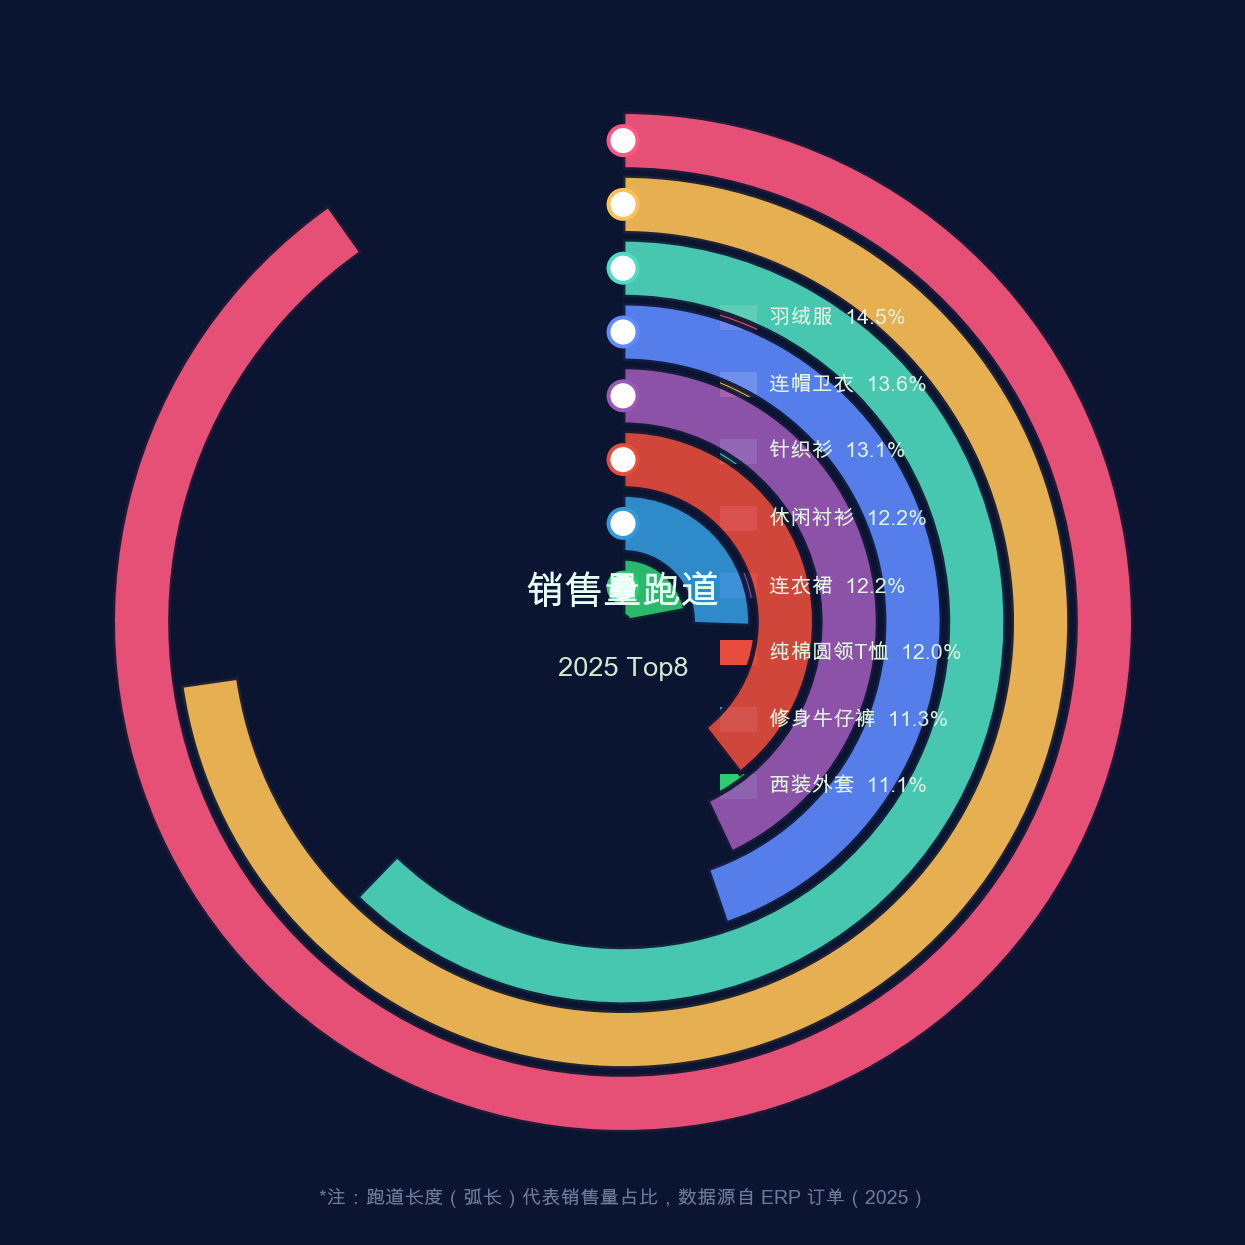

In [62]:
# 圆形跑道图（Circular Racetrack Chart）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
import matplotlib.transforms as transforms

# 1. 数据准备
df_race = df.copy()

# 自动选择日期、金额与数量列
date_col = next((c for c in ['payment_date','order_date','create_time'] if c in df_race.columns), None)
if date_col is None:
    raise ValueError('找不到日期字段')

# 优先使用 quantity，其次用 paid_amount 等金额列
qty_col = 'quantity' if 'quantity' in df_race.columns else None
amount_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df_race.columns), None)

if qty_col is None and amount_col is None:
    raise ValueError('找不到数量或金额字段')

# 确定类别维度（优先商品名，其次省份/店铺）
category_col = None
for col in ['product_name', 'province', 'store_name', 'category']:
    if col in df_race.columns:
        category_col = col
        break
if category_col is None:
    raise ValueError('找不到合适的类别字段')

# 筛选 2025 年数据
df_race[date_col] = pd.to_datetime(df_race[date_col])
df_2025 = df_race[df_race[date_col].dt.year == 2025].copy()
if df_2025.shape[0] == 0:
    raise ValueError('当前数据中没有 2025 年记录')

# 聚合各类别销售量
if qty_col:
    agg = df_2025.groupby(category_col)[qty_col].sum().reset_index()
    metric_name = '销售量'
else:
    agg = df_2025.groupby(category_col)[amount_col].sum().reset_index()
    metric_name = '销售额'
    qty_col = amount_col

agg = agg.sort_values(qty_col, ascending=False)  # 降序，从外到内
agg = agg.head(8)  # 取 Top8（适合圆形跑道）
labels = agg[category_col].astype(str).tolist()
values = agg[qty_col].astype(float).tolist()

# 归一化为占比（用于弧长分配）
values_arr = np.array(values, dtype=float)
if values_arr.sum() == 0:
    values_arr = np.ones_like(values_arr)
shares = values_arr / values_arr.sum()
percentages = [f"{s*100:.1f}%" for s in shares]

# 将占比放大4倍（用于视觉强调）
shares_amplified = shares * 4
# 归一化到总和不超过1（避免重叠，按比例缩放）
if shares_amplified.sum() > 1:
    shares_amplified = shares_amplified / shares_amplified.sum()

# 2. 视觉设置（参考单元格20）
plt.close('all')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(9, 9), dpi=140)
bg_color = '#0b1430'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 跑道配色（渐变，参考20）
base_colors = ['#ff577f', '#ffc155', '#4edbbf', '#5f8bff', '#9b59b6', '#e74c3c', '#3498db', '#2ecc71']
n = len(shares)
colors = [base_colors[i % len(base_colors)] for i in range(n)]

# 环形跑道几何参数
outer_r = 0.88       # 最外环外径
thickness = 0.10     # 每条跑道的宽度
gap = 0.01           # 跑道间隙
max_arc_deg = 7200.0  # 跑道弧度总跨度（3/4圆）
startangle_end = 90.0  # 终点角度

# 为每个类别分配弧长（使用放大4倍后的占比）
arc_degs = max_arc_deg * shares_amplified

current_r = outer_r
wedges = []

# 3. 绘制圆形跑道（同心环形扇区）
for i in range(n):
    theta2 = startangle_end
    theta1 = startangle_end - arc_degs[i]
    
    # 绘制跑道扇区
    w = Wedge(center=(0, 0), r=current_r, theta1=theta1, theta2=theta2,
              width=thickness, facecolor=colors[i], edgecolor=bg_color, 
              linewidth=2.5, alpha=0.9, zorder=3)
    ax.add_patch(w)
    wedges.append(w)
    
    # 在跑道终点添加圆形标记（模拟终点线）
    end_angle_rad = np.deg2rad(theta2)
    end_x = (current_r - thickness/2) * np.cos(end_angle_rad)
    end_y = (current_r - thickness/2) * np.sin(end_angle_rad)
    marker = Circle((end_x, end_y), thickness/4, 
                   facecolor='white', edgecolor=colors[i], 
                   linewidth=2, zorder=5)
    ax.add_patch(marker)
    
    current_r -= (thickness + gap)

# 4. 中心标题
ax.text(0, 0.05, f'{metric_name}跑道', ha='center', va='center', 
       fontsize=20, color='#e6fff5', fontweight='bold', zorder=10)
ax.text(0, -0.08, '2025 Top8', ha='center', va='center', 
       fontsize=14, color='#cfead1', zorder=10)

# 5. 右侧图例（类别 + 百分比）
legend_x = 0.62
legend_y_start = 0.75
legend_spacing = 0.055

for i, (lab, pct) in enumerate(zip(labels, percentages)):
    # 截断过长标签
    display_lab = lab if len(lab) <= 12 else lab[:10] + '..'
    ax.text(legend_x, legend_y_start - i * legend_spacing, 
           f"{display_lab}  {pct}", ha='left', va='center', 
           fontsize=11, color='#dff3e0', transform=ax.transAxes)
    # 颜色块
    rect_x = legend_x - 0.04
    rect_y = legend_y_start - i * legend_spacing
    from matplotlib.patches import Rectangle
    color_box = Rectangle((rect_x, rect_y - 0.01), 0.03, 0.02, 
                          transform=ax.transAxes, facecolor=colors[i], 
                          edgecolor='none', zorder=2)
    ax.add_patch(color_box)

# 6. 注释
ax.text(0.5, 0.02, f'*注：跑道长度（弧长）代表{metric_name}占比，数据源自 ERP 订单（2025）', 
       ha='center', va='bottom', fontsize=10, 
       color='#6b7a99', transform=ax.transAxes)

# 7. 清理坐标轴
ax.set(aspect='equal')
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.axis('off')
plt.tight_layout()
plt.show()


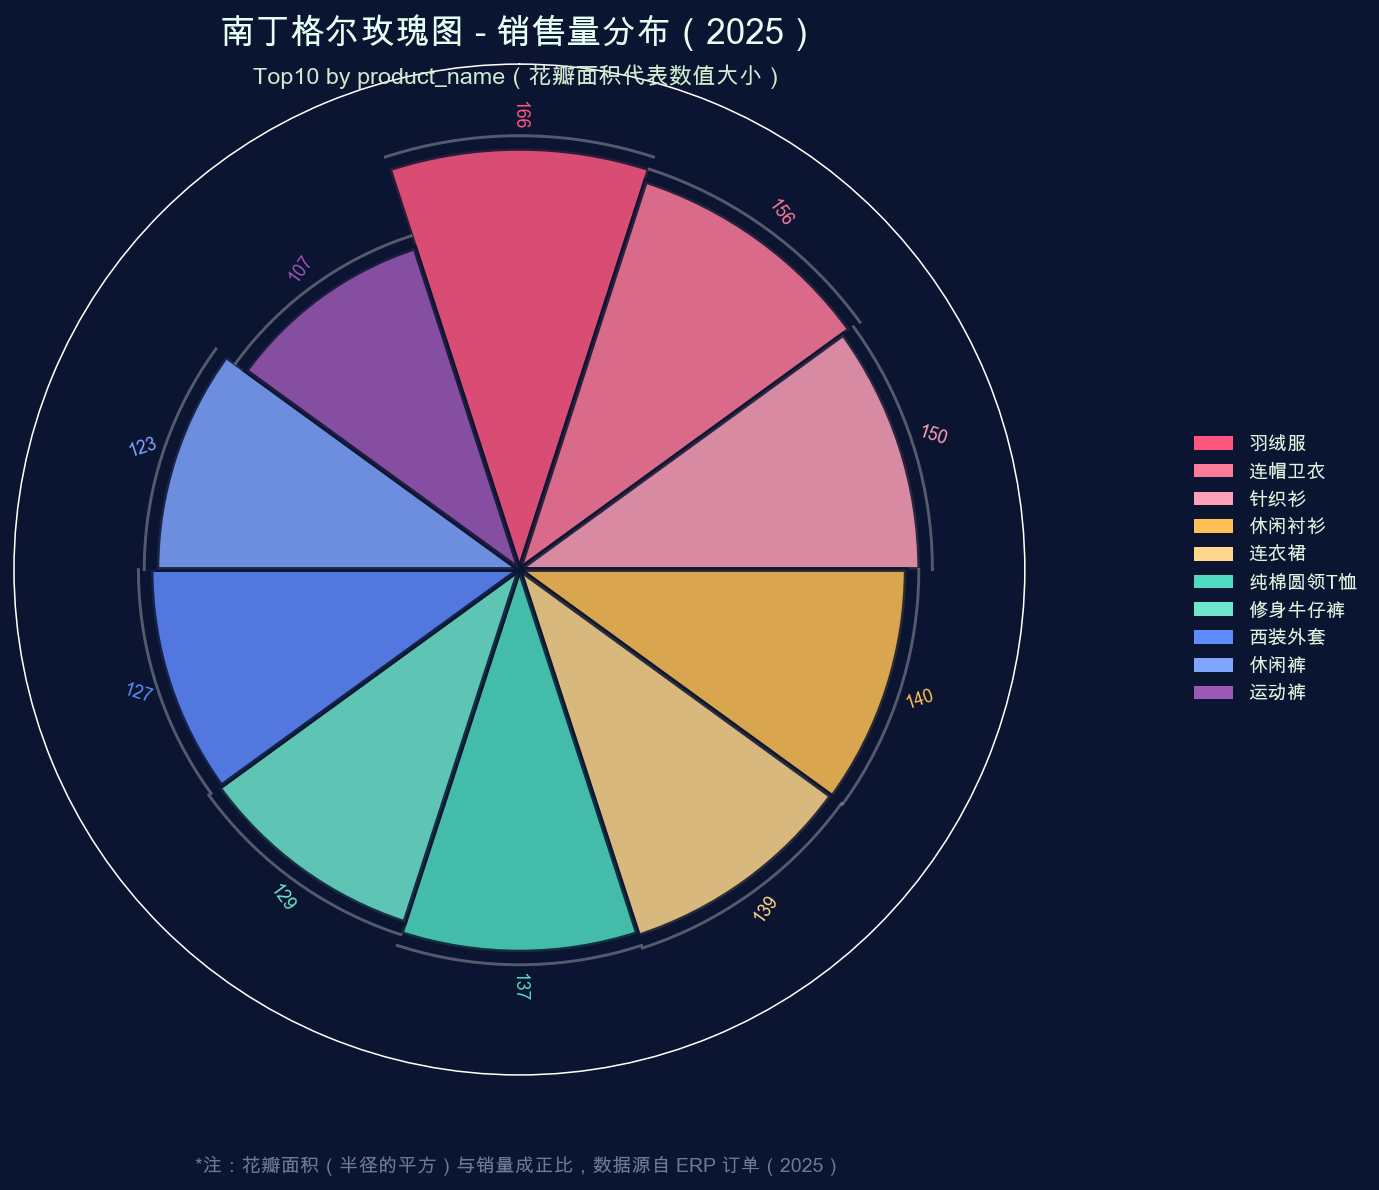

In [63]:
# 南丁格尔玫瑰图（Nightingale Rose Chart）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle

# 1. 数据准备
df_rose = df.copy()

# 自动选择日期与金额列
date_col = next((c for c in ['payment_date','order_date','create_time'] if c in df_rose.columns), None)
if date_col is None:
    raise ValueError('找不到日期字段')

qty_col = 'quantity' if 'quantity' in df_rose.columns else None
amount_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df_rose.columns), None)

if qty_col is None and amount_col is None:
    raise ValueError('找不到数量或金额字段')

# 确定类别维度
category_col = None
for col in ['product_name', 'province', 'store_name', 'category']:
    if col in df_rose.columns:
        category_col = col
        break
if category_col is None:
    raise ValueError('找不到合适的类别字段')

# 筛选 2025 年数据
df_rose[date_col] = pd.to_datetime(df_rose[date_col])
df_2025 = df_rose[df_rose[date_col].dt.year == 2025].copy()
if df_2025.shape[0] == 0:
    raise ValueError('当前数据中没有 2025 年记录')

# 聚合各类别
if qty_col:
    agg = df_2025.groupby(category_col)[qty_col].sum().reset_index()
    metric_name = '销售量'
else:
    agg = df_2025.groupby(category_col)[amount_col].sum().reset_index()
    metric_name = '销售额'
    qty_col = amount_col

agg = agg.sort_values(qty_col, ascending=False)
agg = agg.head(12)  # 取 Top12（南丁格尔图适合 8-12 个类别）
labels = agg[category_col].astype(str).tolist()
values = agg[qty_col].astype(float).tolist()

n = len(values)
if n == 0:
    raise ValueError('没有有效数据')

# 归一化半径（面积与数值成正比）
values_arr = np.array(values, dtype=float)
# 半径与面积的平方根成正比，使面积与数值成正比
radii = np.sqrt(values_arr / values_arr.max())  # 归一化到 [0,1]

# 2. 视觉设置（参考单元格20）
plt.close('all')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10), dpi=140, subplot_kw=dict(projection='polar'))
bg_color = '#0b1430'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 配色（渐变玫瑰色系）
base_colors = ['#ff577f', '#ff7a9a', '#ffa0b8', '#ffc155', '#ffd68b', 
               '#4edbbf', '#6ee5cc', '#5f8bff', '#7fa5ff', '#9b59b6', 
               '#b07cc6', '#e74c3c']
colors = [base_colors[i % len(base_colors)] for i in range(n)]

# 3. 绘制南丁格尔玫瑰图（极坐标扇形，半径代表数值）
theta = np.linspace(0, 2 * np.pi, n, endpoint=False)  # 均分角度
width = 2 * np.pi / n  # 每个扇形的角度宽度

bars = ax.bar(theta, radii, width=width, bottom=0.0, 
              color=colors, edgecolor=bg_color, linewidth=2.5, alpha=0.85)

# 为每个扇形添加边缘高光效果
for i, (t, r, bar) in enumerate(zip(theta, radii, bars)):
    # 在扇形外侧添加白色高光弧
    highlight_r = r + 0.03
    highlight_theta = np.linspace(t - width/2, t + width/2, 20)
    ax.plot(highlight_theta, [highlight_r]*len(highlight_theta), 
           color='white', alpha=0.3, linewidth=1.5, zorder=5)

# 4. 标签与数值（在扇形中部）
for i, (t, r, val, lab) in enumerate(zip(theta, radii, values, labels)):
    # 计算标签位置（扇形中心）
    angle = np.degrees(t)
    
    # 数值标签（放在扇形外侧）
    label_r = r + 0.08
    ha = 'left' if 0 <= angle < 180 else 'right'
    rotation = angle if angle < 180 else angle - 180
    
    # 显示数值
    ax.text(t, label_r, f'{val:,.0f}', ha='center', va='center',
           fontsize=9, color=colors[i], fontweight='bold', 
           rotation=rotation - 90, rotation_mode='anchor')

# 5. 配置极坐标轴
ax.set_theta_zero_location('N')  # 0度在正上方
ax.set_theta_direction(-1)  # 顺时针
ax.set_ylim(0, 1.2)  # 留出标签空间

# 隐藏径向刻度和网格
ax.set_yticks([])
ax.set_yticklabels([])
ax.grid(False)

# 隐藏角度标签
ax.set_xticks(theta)
ax.set_xticklabels([])

# 6. 标题
ax.text(0.5, 1.05, f'南丁格尔玫瑰图 - {metric_name}分布（2025）', 
       ha='center', va='top', fontsize=18, 
       color='#e6fff5', fontweight='bold', transform=ax.transAxes)
ax.text(0.5, 1.0, f'Top{n} by {category_col}（花瓣面积代表数值大小）', 
       ha='center', va='top', fontsize=12, 
       color='#cfead1', transform=ax.transAxes)

# 7. 图例（显示类别名称）
# 在右侧显示类别列表
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='none') 
                  for i in range(n)]
legend_labels = [lab if len(lab) <= 15 else lab[:13]+'..' for lab in labels]

ax.legend(legend_elements, legend_labels, loc='center left', 
         bbox_to_anchor=(1.15, 0.5), frameon=False, 
         fontsize=10, labelcolor='#dff3e0')

# 8. 注释
ax.text(0.5, -0.08, '*注：花瓣面积（半径的平方）与销量成正比，数据源自 ERP 订单（2025）', 
       ha='center', va='top', fontsize=10, 
       color='#6b7a99', transform=ax.transAxes)

plt.tight_layout()
plt.show()


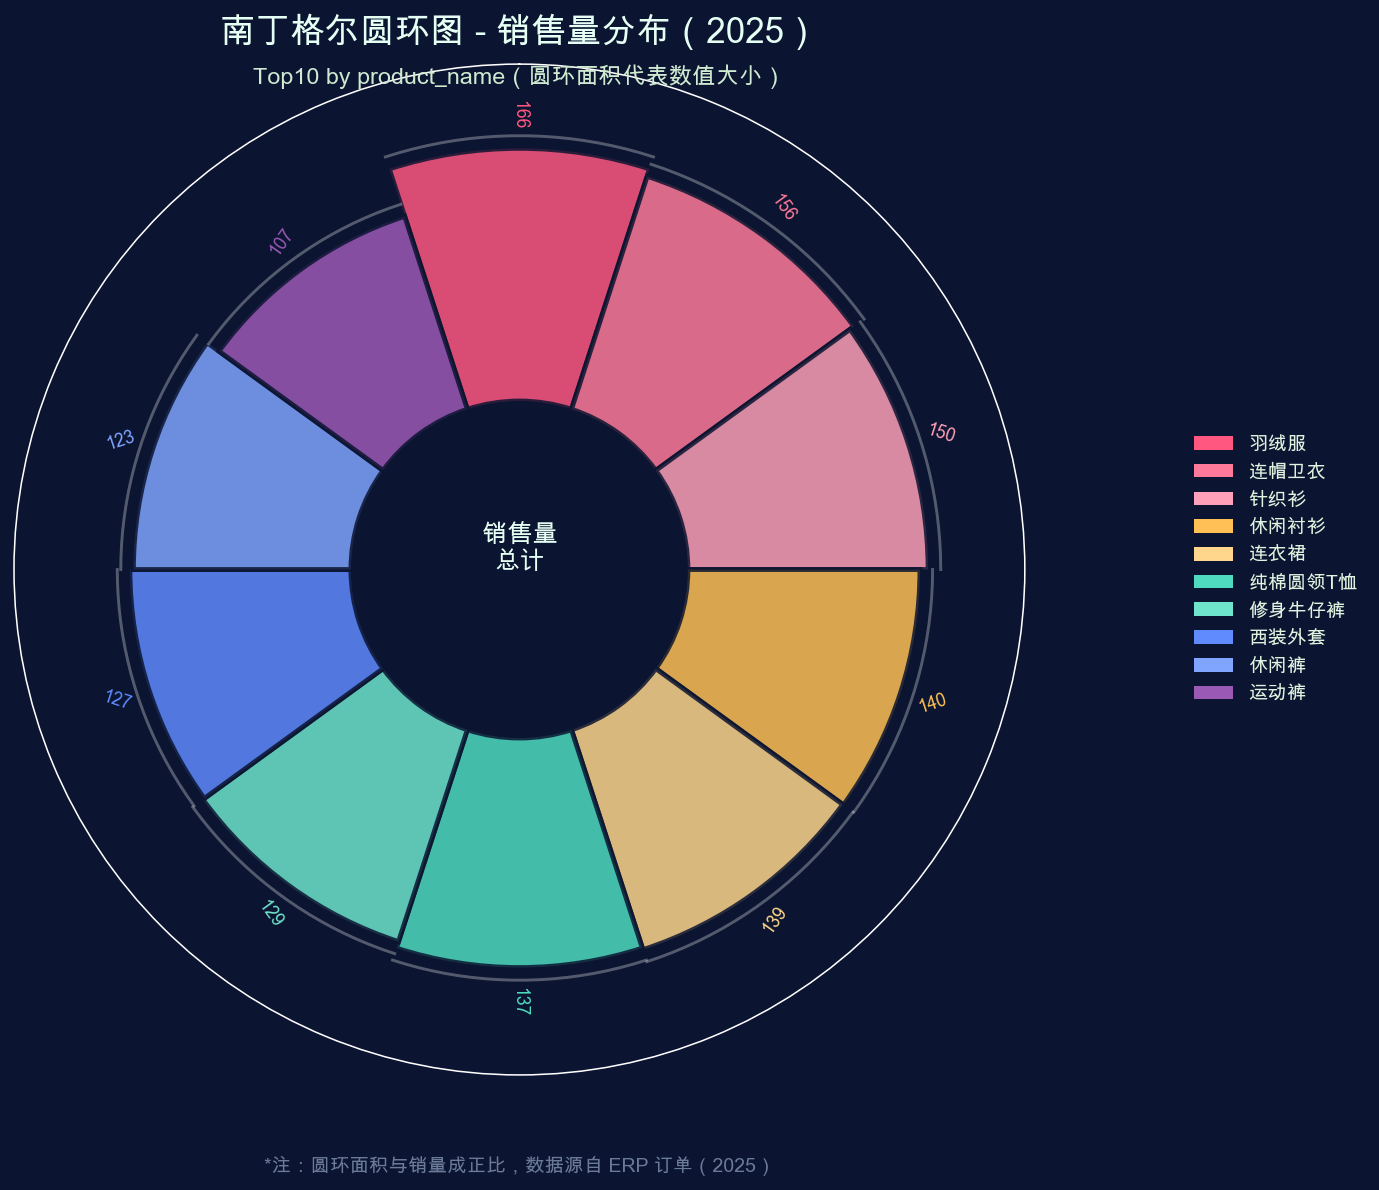

In [64]:
# 南丁格尔圆环图（Nightingale Rose Donut Chart）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle

# 1. 数据准备
df_rose = df.copy()

# 自动选择日期与金额列
date_col = next((c for c in ['payment_date','order_date','create_time'] if c in df_rose.columns), None)
if date_col is None:
    raise ValueError('找不到日期字段')

qty_col = 'quantity' if 'quantity' in df_rose.columns else None
amount_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df_rose.columns), None)

if qty_col is None and amount_col is None:
    raise ValueError('找不到数量或金额字段')

# 确定类别维度
category_col = None
for col in ['product_name', 'province', 'store_name', 'category']:
    if col in df_rose.columns:
        category_col = col
        break
if category_col is None:
    raise ValueError('找不到合适的类别字段')

# 筛选 2025 年数据
df_rose[date_col] = pd.to_datetime(df_rose[date_col])
df_2025 = df_rose[df_rose[date_col].dt.year == 2025].copy()
if df_2025.shape[0] == 0:
    raise ValueError('当前数据中没有 2025 年记录')

# 聚合各类别
if qty_col:
    agg = df_2025.groupby(category_col)[qty_col].sum().reset_index()
    metric_name = '销售量'
else:
    agg = df_2025.groupby(category_col)[amount_col].sum().reset_index()
    metric_name = '销售额'
    qty_col = amount_col

agg = agg.sort_values(qty_col, ascending=False)
agg = agg.head(12)  # 取 Top12
labels = agg[category_col].astype(str).tolist()
values = agg[qty_col].astype(float).tolist()

n = len(values)
if n == 0:
    raise ValueError('没有有效数据')

# 归一化半径（圆环版本：固定内径，外径按面积比例）
values_arr = np.array(values, dtype=float)
inner_radius = 0.4  # 固定内圈半径
max_outer = 1.0
# 圆环高度（外径-内径）与数值成正比
radii_heights = np.sqrt(values_arr / values_arr.max()) * (max_outer - inner_radius)

# 2. 视觉设置
plt.close('all')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10), dpi=140, subplot_kw=dict(projection='polar'))
bg_color = '#0b1430'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 配色（渐变玫瑰色系）
base_colors = ['#ff577f', '#ff7a9a', '#ffa0b8', '#ffc155', '#ffd68b', 
               '#4edbbf', '#6ee5cc', '#5f8bff', '#7fa5ff', '#9b59b6', 
               '#b07cc6', '#e74c3c']
colors = [base_colors[i % len(base_colors)] for i in range(n)]

# 3. 绘制南丁格尔圆环图
theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
width = 2 * np.pi / n

# 绘制圆环（bottom 参数设置内圈半径）
bars = ax.bar(theta, radii_heights, width=width, bottom=inner_radius, 
              color=colors, edgecolor=bg_color, linewidth=2.5, alpha=0.85)

# 边缘高光效果
for i, (t, r_h, bar) in enumerate(zip(theta, radii_heights, bars)):
    outer_r = inner_radius + r_h
    highlight_r = outer_r + 0.03
    highlight_theta = np.linspace(t - width/2, t + width/2, 20)
    ax.plot(highlight_theta, [highlight_r]*len(highlight_theta), 
           color='white', alpha=0.3, linewidth=1.5, zorder=5)

# 4. 标签与数值
for i, (t, r_h, val, lab) in enumerate(zip(theta, radii_heights, values, labels)):
    angle = np.degrees(t)
    outer_r = inner_radius + r_h
    
    # 数值标签（放在圆环外侧）
    label_r = outer_r + 0.08
    rotation = angle if angle < 180 else angle - 180
    
    ax.text(t, label_r, f'{val:,.0f}', ha='center', va='center',
           fontsize=9, color=colors[i], fontweight='bold', 
           rotation=rotation - 90, rotation_mode='anchor')

# 5. 配置极坐标轴
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_ylim(0, 1.2)
ax.set_yticks([])
ax.set_yticklabels([])
ax.grid(False)
ax.set_xticks(theta)
ax.set_xticklabels([])

# 6. 标题与中心汇总文本
ax.text(0.5, 1.05, f'南丁格尔圆环图 - {metric_name}分布（2025）', 
       ha='center', va='top', fontsize=18, 
       color='#e6fff5', fontweight='bold', transform=ax.transAxes)
ax.text(0.5, 1.0, f'Top{n} by {category_col}（圆环面积代表数值大小）', 
       ha='center', va='top', fontsize=12, 
       color='#cfead1', transform=ax.transAxes)

# 中心圆形区域添加汇总信息
total_value = values_arr.sum()
ax.text(0, 0.05, f'{metric_name}\n总计', ha='center', va='center',
       fontsize=13, color='#e6fff5', fontweight='bold', zorder=10)
ax.text(0, -0.12, f'{total_value:,.0f}', ha='center', va='center',
       fontsize=16, color='#4edbbf', fontweight='bold', zorder=10)

# 7. 图例
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='none') 
                  for i in range(n)]
legend_labels = [lab if len(lab) <= 15 else lab[:13]+'..' for lab in labels]

ax.legend(legend_elements, legend_labels, loc='center left', 
         bbox_to_anchor=(1.15, 0.5), frameon=False, 
         fontsize=10, labelcolor='#dff3e0')

# 8. 注释
ax.text(0.5, -0.08, '*注：圆环面积与销量成正比，数据源自 ERP 订单（2025）', 
       ha='center', va='top', fontsize=10, 
       color='#6b7a99', transform=ax.transAxes)

plt.tight_layout()
plt.show()


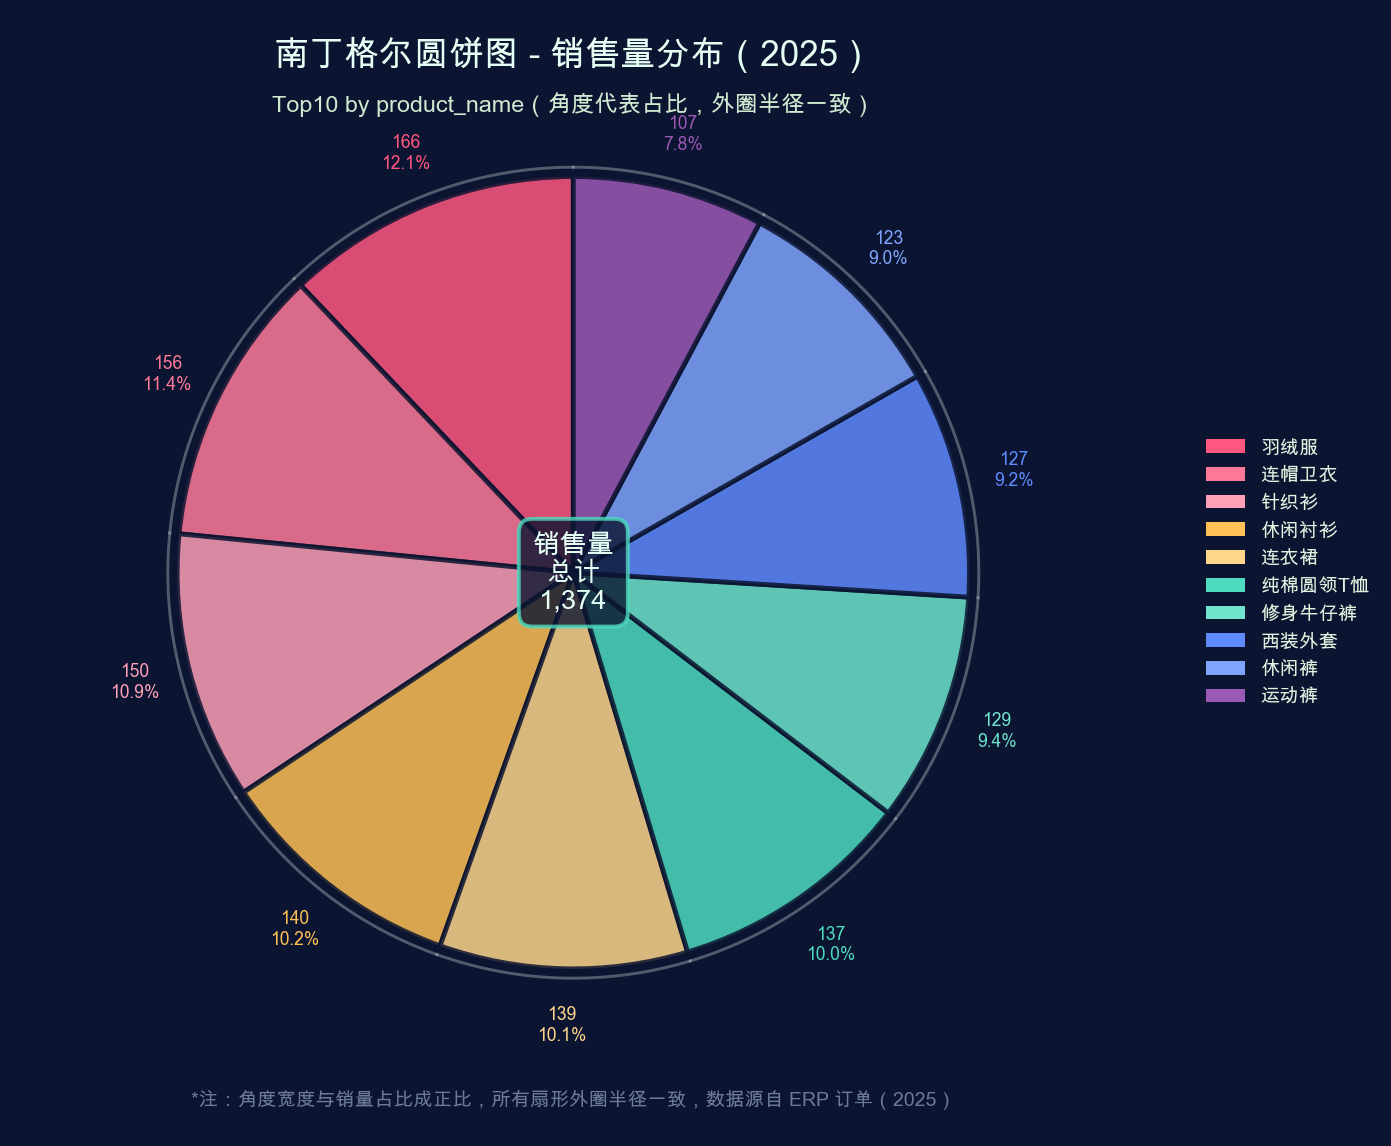

In [65]:
# 南丁格尔圆饼图（Nightingale Pie Chart - 外圈半径一致版）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# 1. 数据准备
df_rose = df.copy()

# 自动选择日期与金额列
date_col = next((c for c in ['payment_date','order_date','create_time'] if c in df_rose.columns), None)
if date_col is None:
    raise ValueError('找不到日期字段')

qty_col = 'quantity' if 'quantity' in df_rose.columns else None
amount_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df_rose.columns), None)

if qty_col is None and amount_col is None:
    raise ValueError('找不到数量或金额字段')

# 确定类别维度
category_col = None
for col in ['product_name', 'province', 'store_name', 'category']:
    if col in df_rose.columns:
        category_col = col
        break
if category_col is None:
    raise ValueError('找不到合适的类别字段')

# 筛选 2025 年数据
df_rose[date_col] = pd.to_datetime(df_rose[date_col])
df_2025 = df_rose[df_rose[date_col].dt.year == 2025].copy()
if df_2025.shape[0] == 0:
    raise ValueError('当前数据中没有 2025 年记录')

# 聚合各类别
if qty_col:
    agg = df_2025.groupby(category_col)[qty_col].sum().reset_index()
    metric_name = '销售量'
else:
    agg = df_2025.groupby(category_col)[amount_col].sum().reset_index()
    metric_name = '销售额'
    qty_col = amount_col

agg = agg.sort_values(qty_col, ascending=False)
agg = agg.head(12)  # 取 Top12
labels = agg[category_col].astype(str).tolist()
values = agg[qty_col].astype(float).tolist()

n = len(values)
if n == 0:
    raise ValueError('没有有效数据')

# 计算占比（用于角度宽度分配）
values_arr = np.array(values, dtype=float)
percentages = values_arr / values_arr.sum() * 100

# 2. 视觉设置
plt.close('all')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10), dpi=140)
bg_color = '#0b1430'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 配色（渐变玫瑰色系）
base_colors = ['#ff577f', '#ff7a9a', '#ffa0b8', '#ffc155', '#ffd68b', 
               '#4edbbf', '#6ee5cc', '#5f8bff', '#7fa5ff', '#9b59b6', 
               '#b07cc6', '#e74c3c']
colors = [base_colors[i % len(base_colors)] for i in range(n)]

# 3. 绘制南丁格尔圆饼图（统一外圈半径，角度宽度代表占比）
radius = 0.85  # 统一外圈半径
start_angle = 90  # 起始角度（从正上方开始）

for i, (val, pct, color, lab) in enumerate(zip(values, percentages, colors, labels)):
    # 计算扇形角度（占比转角度）
    angle = pct * 3.6  # 百分比转360度
    
    # 绘制扇形
    wedge = Wedge(center=(0, 0), r=radius, 
                  theta1=start_angle, theta2=start_angle + angle,
                  facecolor=color, edgecolor=bg_color, 
                  linewidth=2.5, alpha=0.85, zorder=2)
    ax.add_patch(wedge)
    
    # 在扇形外圈添加高光效果
    mid_angle = start_angle + angle / 2
    mid_rad = np.deg2rad(mid_angle)
    highlight_r = radius + 0.02
    arc_angles = np.linspace(start_angle, start_angle + angle, 30)
    arc_x = [highlight_r * np.cos(np.deg2rad(a)) for a in arc_angles]
    arc_y = [highlight_r * np.sin(np.deg2rad(a)) for a in arc_angles]
    ax.plot(arc_x, arc_y, color='white', alpha=0.3, linewidth=1.5, zorder=3)
    
    # 标签位置（扇形中心外侧）
    label_r = radius + 0.12
    label_x = label_r * np.cos(mid_rad)
    label_y = label_r * np.sin(mid_rad)
    
    # 数值与百分比标签
    ax.text(label_x, label_y, f'{val:,.0f}\n{pct:.1f}%', 
           ha='center', va='center', fontsize=9, 
           color=color, fontweight='bold', zorder=4)
    
    # 更新起始角度
    start_angle += angle

# 4. 标题
ax.text(0.5, 0.98, f'南丁格尔圆饼图 - {metric_name}分布（2025）', 
       ha='center', va='top', fontsize=18, 
       color='#e6fff5', fontweight='bold', transform=ax.transAxes)
ax.text(0.5, 0.93, f'Top{n} by {category_col}（角度代表占比，外圈半径一致）', 
       ha='center', va='top', fontsize=12, 
       color='#cfead1', transform=ax.transAxes)

# 中心汇总信息
total_value = values_arr.sum()
ax.text(0, 0, f'{metric_name}\n总计\n{total_value:,.0f}', 
       ha='center', va='center', fontsize=14, 
       color='#e6fff5', fontweight='bold', zorder=10,
       bbox=dict(boxstyle='round,pad=0.5', facecolor=bg_color, 
                edgecolor='#4edbbf', linewidth=2, alpha=0.8))

# 5. 图例（右侧类别列表）
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], edgecolor='none') 
                  for i in range(n)]
legend_labels = [lab if len(lab) <= 15 else lab[:13]+'..' for lab in labels]

ax.legend(legend_elements, legend_labels, loc='center left', 
         bbox_to_anchor=(1.05, 0.5), frameon=False, 
         fontsize=10, labelcolor='#dff3e0')

# 6. 注释
ax.text(0.5, 0.02, '*注：角度宽度与销量占比成正比，所有扇形外圈半径一致，数据源自 ERP 订单（2025）', 
       ha='center', va='bottom', fontsize=10, 
       color='#6b7a99', transform=ax.transAxes)

# 7. 设置坐标轴
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()


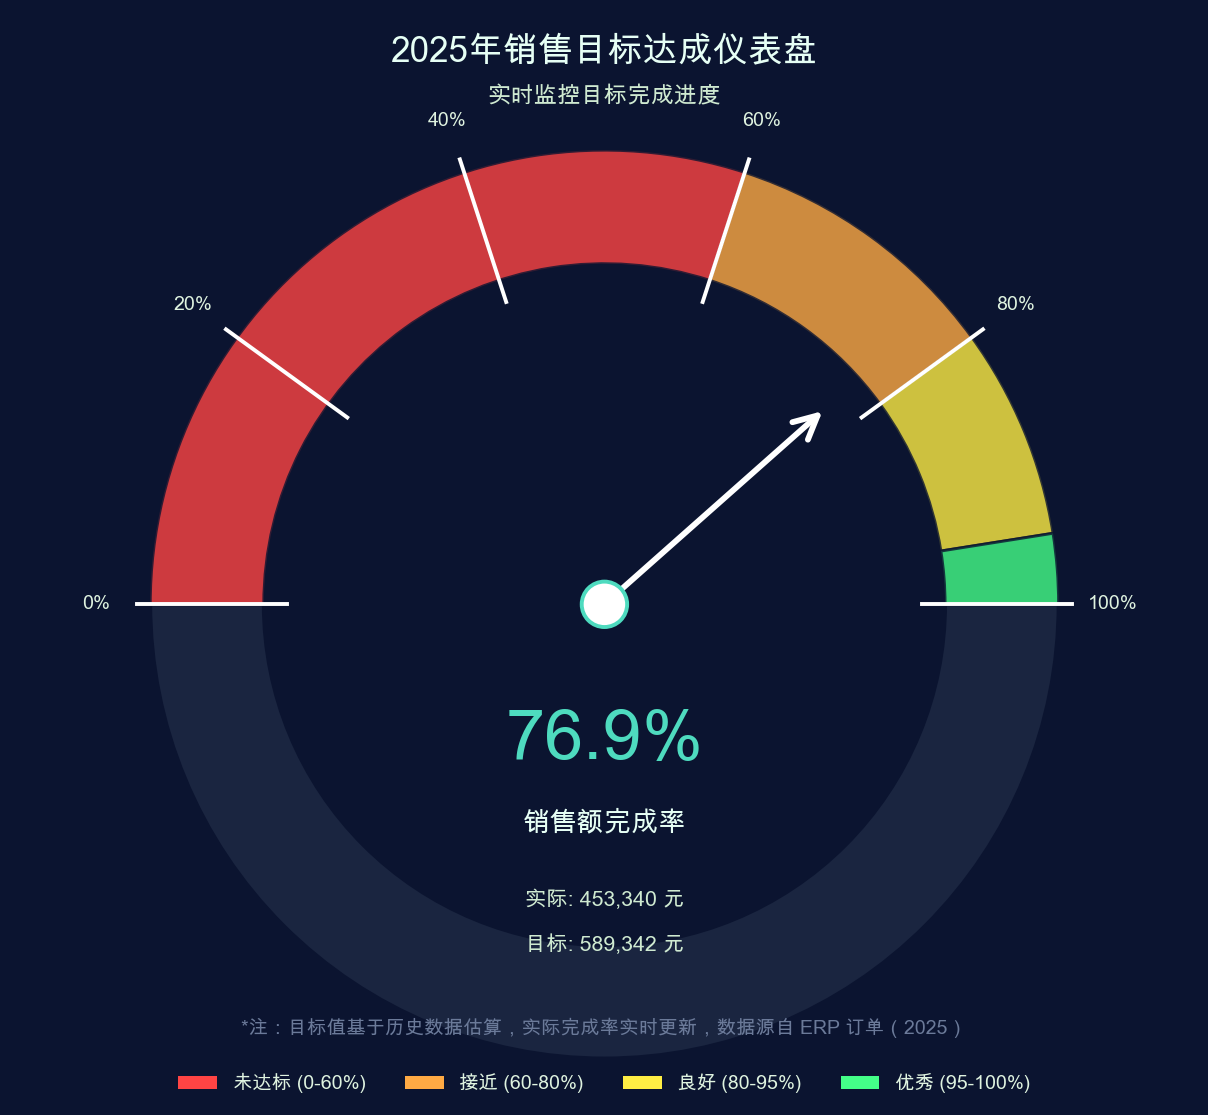

In [66]:
# 仪表盘图（Gauge Chart）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle, FancyArrowPatch
import matplotlib.patches as mpatches

# 1. 数据准备（计算 2025 年目标完成度）
df_gauge = df.copy()

# 自动选择日期与金额列
date_col = next((c for c in ['payment_date','order_date','create_time'] if c in df_gauge.columns), None)
if date_col is None:
    raise ValueError('找不到日期字段')

amount_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df_gauge.columns), None)
qty_col = 'quantity' if 'quantity' in df_gauge.columns else None

if amount_col is None and qty_col is None:
    raise ValueError('找不到金额或数量字段')

# 筛选 2025 年数据
df_gauge[date_col] = pd.to_datetime(df_gauge[date_col])
df_2025 = df_gauge[df_gauge[date_col].dt.year == 2025].copy()

if df_2025.shape[0] == 0:
    raise ValueError('当前数据中没有 2025 年记录')

# 计算实际完成值
if amount_col:
    actual_value = df_2025[amount_col].sum()
    metric_name = '销售额'
    unit = '元'
else:
    actual_value = df_2025[qty_col].sum()
    metric_name = '销售量'
    unit = '件'

# 设定目标值（假设目标为实际值的 1.3 倍，模拟目标达成情况）
target_value = actual_value * 1.3
completion_rate = (actual_value / target_value) * 100  # 完成率百分比

# 2. 视觉设置
plt.close('all')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 8), dpi=140)
bg_color = '#0b1430'
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# 3. 绘制仪表盘底盘（半圆形刻度盘）
center = (0, 0)
radius = 1.0
inner_radius = 0.75

# 刻度范围：0-100%，半圆从 180° 到 0°
start_angle = 180
end_angle = 0
total_arc = 180  # 半圆

# 绘制背景灰色半圆环（刻度盘底色）
bg_wedge = Wedge(center, radius, start_angle, end_angle, 
                 width=radius-inner_radius, facecolor='#1a2540', 
                 edgecolor='#0b1430', linewidth=2, zorder=1)
ax.add_patch(bg_wedge)

# 4. 绘制分段彩色刻度（绿-黄-橙-红）
segments = [
    (0, 60, '#ff4444'),     # 0-60%: 红色（未达标）
    (60, 80, '#ffaa44'),    # 60-80%: 橙色（接近）
    (80, 95, '#ffee44'),    # 80-95%: 黄色（良好）
    (95, 100, '#44ff88')    # 95-100%: 绿色（优秀）
]

for seg_start, seg_end, color in segments:
    angle_start = start_angle - (seg_start / 100) * total_arc
    angle_end = start_angle - (seg_end / 100) * total_arc
    seg_wedge = Wedge(center, radius, angle_end, angle_start,
                      width=radius-inner_radius, facecolor=color,
                      edgecolor='#0b1430', linewidth=1.5, alpha=0.8, zorder=2)
    ax.add_patch(seg_wedge)

# 5. 绘制刻度线与标签
ticks = [0, 20, 40, 60, 80, 100]
for tick in ticks:
    angle_deg = start_angle - (tick / 100) * total_arc
    angle_rad = np.deg2rad(angle_deg)
    
    # 刻度线（从内圈到外圈）
    tick_inner = inner_radius - 0.05
    tick_outer = radius + 0.03
    x_inner = tick_inner * np.cos(angle_rad)
    y_inner = tick_inner * np.sin(angle_rad)
    x_outer = tick_outer * np.cos(angle_rad)
    y_outer = tick_outer * np.sin(angle_rad)
    ax.plot([x_inner, x_outer], [y_inner, y_outer], 
           color='#ffffff', linewidth=2, zorder=5)
    
    # 刻度标签
    label_r = radius + 0.12
    label_x = label_r * np.cos(angle_rad)
    label_y = label_r * np.sin(angle_rad)
    ax.text(label_x, label_y, f'{tick}%', ha='center', va='center',
           fontsize=10, color='#dff3e0', fontweight='bold', zorder=5)

# 6. 绘制指针（指向当前完成率）
pointer_angle_deg = start_angle - (completion_rate / 100) * total_arc
pointer_angle_rad = np.deg2rad(pointer_angle_deg)

# 指针长度
pointer_length = inner_radius - 0.1

# 指针终点坐标
pointer_x = pointer_length * np.cos(pointer_angle_rad)
pointer_y = pointer_length * np.sin(pointer_angle_rad)

# 绘制指针（三角形箭头）
arrow_width = 0.08
arrow = FancyArrowPatch((0, 0), (pointer_x, pointer_y),
                       arrowstyle='->', mutation_scale=30,
                       color='#ffffff', linewidth=3, zorder=6)
ax.add_patch(arrow)

# 指针中心圆
center_circle = Circle(center, 0.05, facecolor='#ffffff', 
                       edgecolor='#4edbbf', linewidth=2, zorder=7)
ax.add_patch(center_circle)

# 7. 中心数值显示
ax.text(0, -0.3, f'{completion_rate:.1f}%', ha='center', va='center',
       fontsize=36, color='#4edbbf', fontweight='bold', zorder=8)
ax.text(0, -0.48, f'{metric_name}完成率', ha='center', va='center',
       fontsize=14, color='#e6fff5', zorder=8)

# 实际值与目标值
ax.text(0, -0.65, f'实际: {actual_value:,.0f} {unit}', ha='center', va='center',
       fontsize=11, color='#cfead1', zorder=8)
ax.text(0, -0.75, f'目标: {target_value:,.0f} {unit}', ha='center', va='center',
       fontsize=11, color='#cfead1', zorder=8)

# 8. 标题
ax.text(0.5, 0.98, '2025年销售目标达成仪表盘', ha='center', va='top',
       fontsize=18, color='#e6fff5', fontweight='bold', transform=ax.transAxes)
ax.text(0.5, 0.93, '实时监控目标完成进度', ha='center', va='top',
       fontsize=12, color='#cfead1', transform=ax.transAxes)

# 9. 图例（评级标准）
legend_elements = [
    mpatches.Patch(facecolor='#ff4444', label='未达标 (0-60%)'),
    mpatches.Patch(facecolor='#ffaa44', label='接近 (60-80%)'),
    mpatches.Patch(facecolor='#ffee44', label='良好 (80-95%)'),
    mpatches.Patch(facecolor='#44ff88', label='优秀 (95-100%)')
]
ax.legend(handles=legend_elements, loc='lower center', 
         bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False,
         fontsize=10, labelcolor='#dff3e0')

# 10. 注释
ax.text(0.5, 0.02, '*注：目标值基于历史数据估算，实际完成率实时更新，数据源自 ERP 订单（2025）',
       ha='center', va='bottom', fontsize=10,
       color='#6b7a99', transform=ax.transAxes)

# 11. 设置坐标轴
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.0, 1.3)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()


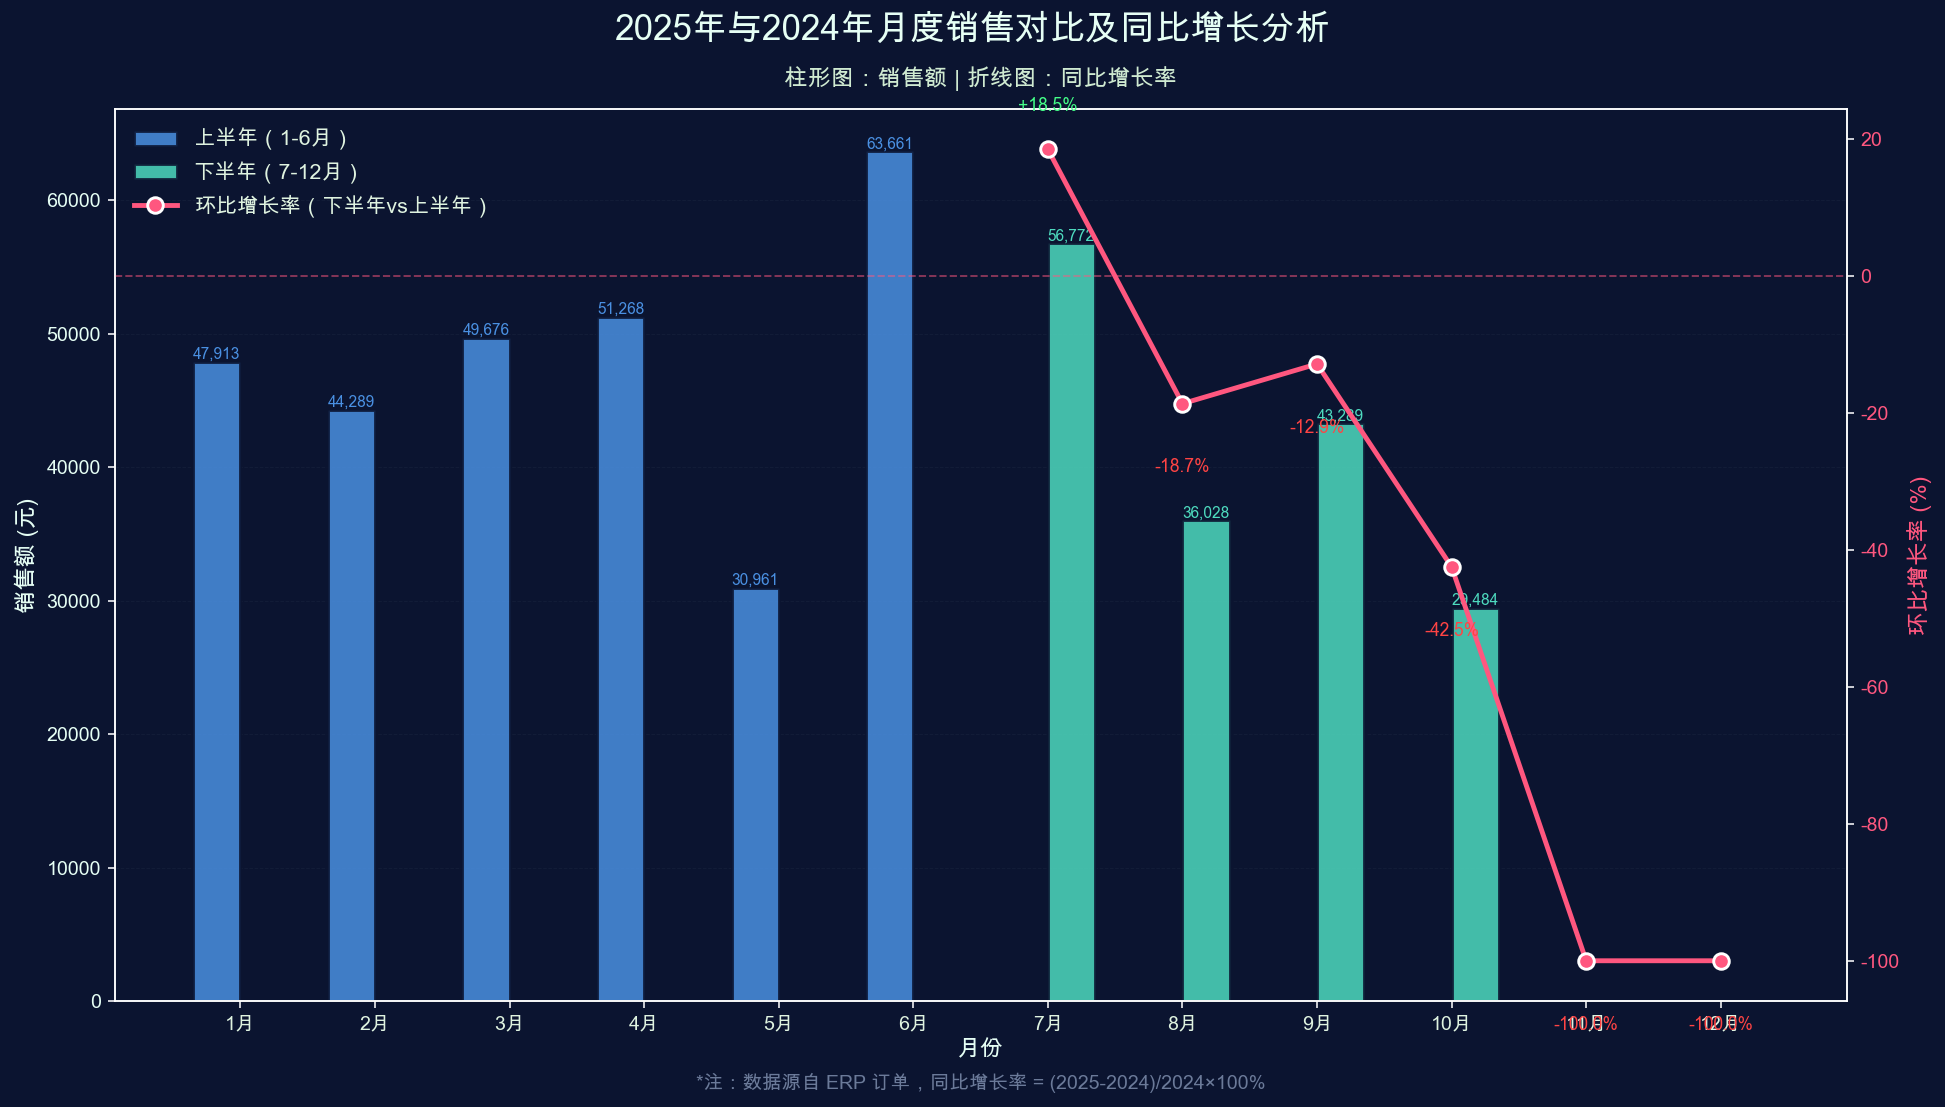

In [67]:
# 柱形折线组合图（2025年下半年对比上半年）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据准备
df_combo = df.copy()

# 自动选择日期与金额列
date_col = next((c for c in ['payment_date','order_date','create_time'] if c in df_combo.columns), None)
if date_col is None:
    raise ValueError('找不到日期字段')

amount_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df_combo.columns), None)
qty_col = 'quantity' if 'quantity' in df_combo.columns else None

if amount_col is None and qty_col is None:
    raise ValueError('找不到金额或数量字段')

# 解析日期并筛选 2025 年数据
df_combo[date_col] = pd.to_datetime(df_combo[date_col])
df_combo['year'] = df_combo[date_col].dt.year
df_combo['month'] = df_combo[date_col].dt.month

df_2025 = df_combo[df_combo['year'] == 2025].copy()

if df_2025.shape[0] == 0:
    raise ValueError('需要包含 2025 年数据')

# 选择指标
if amount_col:
    metric_col = amount_col
    metric_name = '销售额'
    unit = '元'
else:
    metric_col = qty_col
    metric_name = '销售量'
    unit = '件'

# 区分上半年（1-6月）和下半年（7-12月）
df_h1 = df_2025[df_2025['month'] <= 6].copy()
df_h2 = df_2025[df_2025['month'] > 6].copy()

# 按月聚合
monthly_h1 = df_h1.groupby('month')[metric_col].sum().reset_index()
monthly_h1.columns = ['month', 'value_h1']

monthly_h2 = df_h2.groupby('month')[metric_col].sum().reset_index()
monthly_h2.columns = ['month', 'value_h2']

# 合并数据（补齐月份）
all_months = pd.DataFrame({'month': range(1, 13)})
merged = all_months.merge(monthly_h1, on='month', how='left')
merged = merged.merge(monthly_h2, on='month', how='left')
merged = merged.fillna(0)

# 计算环比增长率（下半年对应月与上半年对应月对比）
# 例如：7月对比1月，8月对比2月，以此类推
merged['mom_rate'] = 0.0
for i in range(6, 12):  # 7-12月
    h1_month = i - 5  # 对应的上半年月份（1-6月）
    h2_month = i + 1  # 下半年月份（7-12月）
    h1_val = merged.loc[merged['month'] == h1_month, 'value_h1'].values[0] if len(merged.loc[merged['month'] == h1_month, 'value_h1'].values) > 0 else 0
    h2_val = merged.loc[merged['month'] == h2_month, 'value_h2'].values[0] if len(merged.loc[merged['month'] == h2_month, 'value_h2'].values) > 0 else 0
    if h1_val > 0:
        rate = ((h2_val - h1_val) / h1_val) * 100
        merged.loc[merged['month'] == h2_month, 'mom_rate'] = rate

months = merged['month'].values
values_h1 = merged['value_h1'].values
values_h2 = merged['value_h2'].values
mom_rates = merged['mom_rate'].values

# 2. 视觉设置
plt.close('all')
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=140)
bg_color = '#0b1430'
fig.patch.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)

# 3. 绘制柱形图（左轴）
bar_width = 0.35
x_pos = np.arange(len(months))

bars_h1 = ax1.bar(x_pos - bar_width/2, values_h1, bar_width, 
                  label='上半年（1-6月）', color='#4a90e2', alpha=0.85, 
                  edgecolor='#0b1430', linewidth=1.5, zorder=2)

bars_h2 = ax1.bar(x_pos + bar_width/2, values_h2, bar_width, 
                  label='下半年（7-12月）', color='#4edbbf', alpha=0.85, 
                  edgecolor='#0b1430', linewidth=1.5, zorder=2)

# 柱形顶部数值标签
for i, (vh1, vh2) in enumerate(zip(values_h1, values_h2)):
    if vh1 > 0:
        ax1.text(i - bar_width/2, vh1, f'{vh1:,.0f}', 
                ha='center', va='bottom', fontsize=8, 
                color='#4a90e2', fontweight='bold', zorder=3)
    if vh2 > 0:
        ax1.text(i + bar_width/2, vh2, f'{vh2:,.0f}', 
                ha='center', va='bottom', fontsize=8, 
                color='#4edbbf', fontweight='bold', zorder=3)

# 配置左轴
ax1.set_xlabel('月份', fontsize=12, color='#e6fff5', fontweight='bold')
ax1.set_ylabel(f'{metric_name} ({unit})', fontsize=12, color='#e6fff5', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'{m}月' for m in months], fontsize=10, color='#dff3e0')
ax1.tick_params(axis='y', labelcolor='#e6fff5', labelsize=10)
ax1.grid(axis='y', color='#1a2540', linestyle='--', linewidth=0.5, alpha=0.5)

# 4. 绘制折线图（右轴 - 环比增长率）
ax2 = ax1.twinx()

# 只显示下半年月份（7-12月）的环比增长率
line_months = x_pos[6:]  # 7-12月对应的 x 位置
line_rates = mom_rates[6:]  # 7-12月的环比增长率

line = ax2.plot(line_months, line_rates, color='#ff577f', marker='o', 
               markersize=8, linewidth=2.5, label='环比增长率（下半年vs上半年）', 
               zorder=4, markeredgecolor='white', markeredgewidth=1.5)

# 折线数据标签
for i, rate in zip(line_months, line_rates):
    color = '#44ff88' if rate >= 0 else '#ff4444'
    sign = '+' if rate >= 0 else ''
    ax2.text(i, rate + (5 if rate >= 0 else -8), f'{sign}{rate:.1f}%', 
            ha='center', va='bottom' if rate >= 0 else 'top', 
            fontsize=9, color=color, fontweight='bold', zorder=5)

# 配置右轴
ax2.set_ylabel('环比增长率 (%)', fontsize=12, color='#ff577f', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#ff577f', labelsize=10)
ax2.axhline(y=0, color='#ff577f', linestyle='--', linewidth=1, alpha=0.5, zorder=1)

# 5. 标题
fig.suptitle('2025年与2024年月度销售对比及同比增长分析', 
            fontsize=18, color='#e6fff5', fontweight='bold', y=0.98)
ax1.text(0.5, 1.02, f'柱形图：{metric_name} | 折线图：同比增长率', 
        ha='center', va='bottom', fontsize=12, 
        color='#cfead1', transform=ax1.transAxes)

# 6. 图例
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left', frameon=False, 
          fontsize=11, labelcolor='#dff3e0')

# 7. 注释
ax1.text(0.5, -0.08, '*注：数据源自 ERP 订单，同比增长率 = (2025-2024)/2024×100%', 
        ha='center', va='top', fontsize=10, 
        color='#6b7a99', transform=ax1.transAxes)

plt.tight_layout()
plt.show()


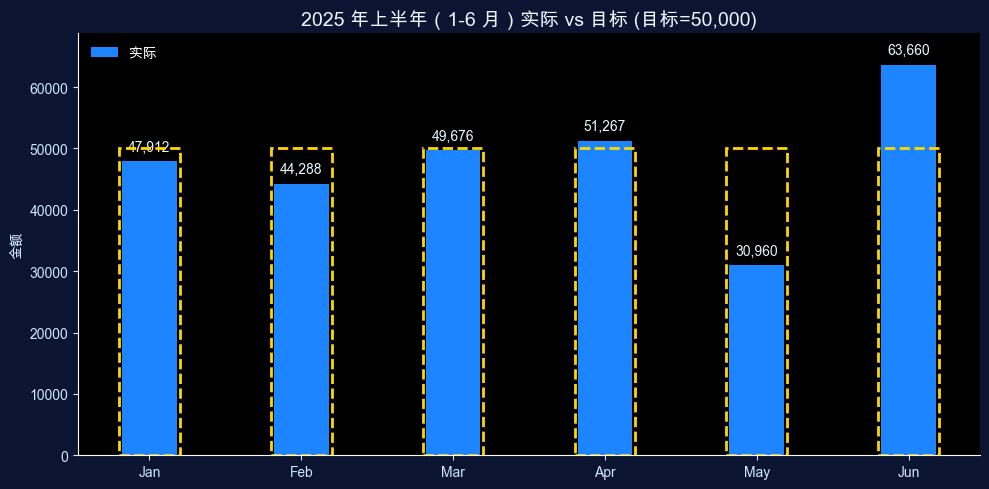

In [68]:
# 2025 上半年目标柱形图（1-6 月） - 目标固定为 50000 并以空心矩形框展示
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 使用 notebook 中已有的 DataFrame `df`
df = globals().get('df', None)
if df is None:
    raise RuntimeError('未找到 DataFrame `df`。请先在 notebook 中载入 `erp_order_data.xlsx` 到 `df`。')

# 选择金额字段（遵循优先级）
amt_col_candidates = ['paid_amount', 'product_amount', 'amount', 'total_amount']
amt_col = next((c for c in amt_col_candidates if c in df.columns), None)
if amt_col is None:
    if 'quantity' in df.columns and 'unit_price' in df.columns:
        df = df.copy()
        df['__computed_amount'] = df['quantity'] * df['unit_price']
        amt_col = '__computed_amount'
    else:
        raise RuntimeError('找不到可用的金额列，也无法用 quantity/unit_price 计算金额。')

# 日期列识别
date_col = next((c for c in ['order_date', 'payment_date', 'created_at', 'create_time', 'date'] if c in df.columns), None)
if date_col is None:
    if isinstance(df.index, pd.DatetimeIndex):
        df = df.reset_index().rename(columns={'index': 'order_date'})
        date_col = 'order_date'
    else:
        raise RuntimeError('找不到日期列，请确保 `df` 含有订单日期列（如 order_date 或 payment_date）。')

df = df.copy()
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col])

# 筛选 2025 年并按月聚合（1-6 月）
df['year'] = df[date_col].dt.year
df['month'] = df[date_col].dt.month
df_2025 = df[df['year'] == 2025]
if df_2025.empty:
    raise RuntimeError('未在 `df` 中找到 2025 年的数据。')

h1_months = list(range(1, 7))
monthly_actual = (
    df_2025[df_2025['month'].isin(h1_months)]
    .groupby('month')[amt_col]
    .sum()
    .reindex(h1_months, fill_value=0)
)

# 目标固定为 50000（每月相同），以空心矩形框展示在实际柱子外围
fixed_target = 50000.0
monthly_target = pd.Series([fixed_target] * len(h1_months), index=h1_months)

# 绘图配置（深色主题）
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
x = np.arange(len(h1_months))
width = 0.36
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10,5), facecolor='#0b1430')

bar_actual = ax.bar(x, monthly_actual.values, width, label='实际', color='#1c85ff', zorder=3, align='center')
# 目标不再作为填充柱显示，保留用于参考（但不绘制实心柱）

# 绘制每月的空心矩形框，框高度为 fixed_target，宽度略大于柱宽以包裹柱体
rect_pad = 0.04  # x 方向的额外宽度（数据坐标）
frame_width = width + rect_pad
for i in range(len(x)):
    left = x[i] - frame_width/2  # 与柱体水平居中对齐，使空心矩形包裹在柱子外围
    # 从 y=0 到目标高度绘制空心矩形（无填充，仅边框）
    rect = Rectangle((left, 0), frame_width, fixed_target, fill=False, edgecolor='#ffd700', linewidth=2.0, linestyle='--', zorder=4)
    ax.add_patch(rect)

# 已移除完成率（百分比）标签以保持图表简洁
max_ref = max(monthly_actual.max(), fixed_target, 1)
# 在每根柱子上方标注实际数量（而非目标）
for i in range(len(x)):
    val = monthly_actual.values[i]
    ax.text(x[i], val + max_ref*0.02, f'{int(val):,d}', ha='center', va='bottom', color='#e6f7ff', fontsize=10, fontweight='bold')

# 坐标与样式
ax.set_xticks(x)
ax.set_xticklabels(months_labels, color='#cfe8ff')
ax.set_ylabel('金额', color='#cfe8ff')
# 调整 y 轴上限以确保目标框可见
ax.set_ylim(0, max_ref * 1.08)
ax.set_title('2025 年上半年（1-6 月）实际 vs 目标 (目标=50,000)', color='#eaf6ff', fontsize=14)
ax.legend(frameon=False, fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(colors='#cfe8ff')
plt.tight_layout()
plt.show()

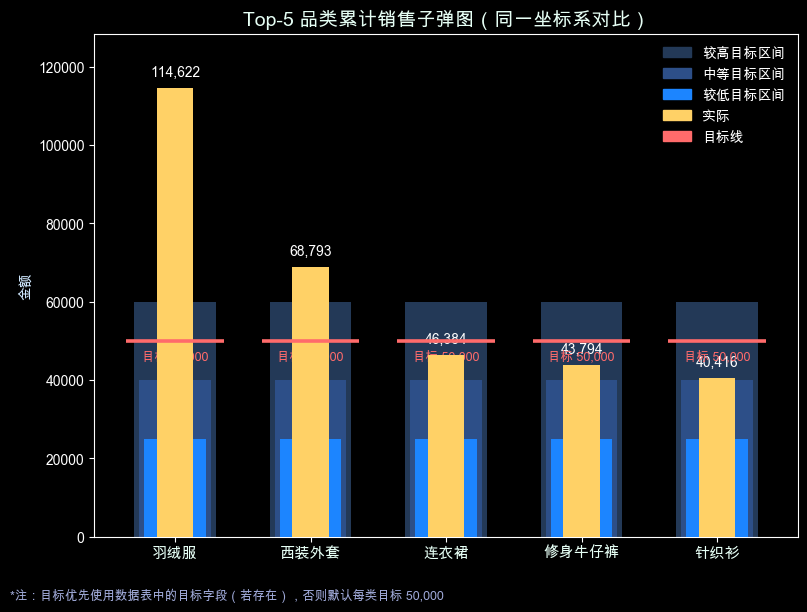

In [69]:
# Top-5 品类子弹图 — 整合在同一坐标系以便对比（每个品类为一组竖向柱）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 获取全局 df
df = globals().get('df', None)
if df is None:
    raise RuntimeError('未找到 DataFrame `df`，请先在 notebook 中加载数据。')

# 自动选择金额列
amt_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df.columns), None)
if amt_col is None:
    if {'quantity','unit_price'}.issubset(df.columns):
        df = df.copy()
        df['__computed_amount'] = df['quantity'] * df['unit_price']
        amt_col = '__computed_amount'
    else:
        raise RuntimeError('找不到金额列，也无法用 quantity*unit_price 计算金额。')

# 尝试筛选 2025 年数据，否则使用全部数据
date_col = next((c for c in ['payment_date','order_date','create_time','date'] if c in df.columns), None)
if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df_valid = df.dropna(subset=[date_col]).copy()
    df_2025 = df_valid[df_valid[date_col].dt.year == 2025].copy()
    if df_2025.shape[0] == 0:
        df_2025 = df_valid
else:
    df_2025 = df.copy()

# 选择类别列
category_col = next((c for c in ['category','product_category','product_name','province','store_name'] if c in df_2025.columns), None)
if category_col is None:
    raise RuntimeError('未找到合适的类别列，请在数据中包含 product_name / category / province / store_name 其中之一。')

# 汇总 Top-5
agg = df_2025.groupby(category_col, as_index=False)[amt_col].sum().rename(columns={amt_col:'sales'})
agg = agg.sort_values('sales', ascending=False).head(5).reset_index(drop=True)
if agg.empty:
    raise RuntimeError('根据当前筛选未计算出任何类别的累计销售。')

# 读取可用的目标列映射（优先）
target_col_candidates = ['category_target','target_amount','target']
target_map = {}
for tcol in target_col_candidates:
    if tcol in df_2025.columns:
        tmp = df_2025.groupby(category_col, as_index=False)[tcol].sum().rename(columns={tcol:'target_sum'})
        target_map = tmp.set_index(category_col)['target_sum'].to_dict()
        break
FALLBACK_TARGET = 50000.0

# 计算每个类别的实际/目标/区间并确定全局 y 轴上限
cats = agg[category_col].astype(str).tolist()
actuals = agg['sales'].astype(float).tolist()
targets = [float(target_map.get(c, FALLBACK_TARGET)) if target_map else FALLBACK_TARGET for c in cats]
r1s = [0.5*t for t in targets]
r2s = [0.8*t for t in targets]
r3s = [1.2*t for t in targets]
global_max = max(max(r3s), max(actuals), max(targets), 1.0)

# 绘图（单个坐标系），每个类别为一组竖向条，按列排列在 x 轴上
import matplotlib.patches as mpatches
plt.style.use('dark_background')
n = len(cats)
fig, ax = plt.subplots(figsize=(max(8, n*1.6), 6), constrained_layout=True)
x = np.arange(n)
bar_w_bg = 0.6
colors_bg = ['#233957', '#2d4f88', '#1c85ff']
actual_color = '#ffd166'
target_color = '#ff6b6b'

# 绘制背景区间（较宽），为可视化效果逐层变窄
for xi, (r3, r2, r1) in enumerate(zip(r3s, r2s, r1s)):
    ax.bar(xi, r3, width=bar_w_bg, color=colors_bg[0], zorder=1)
    ax.bar(xi, r2, width=bar_w_bg*0.88, color=colors_bg[1], zorder=2)
    ax.bar(xi, r1, width=bar_w_bg*0.76, color=colors_bg[2], zorder=3)

# 绘制实际值（较窄的条）
for xi, val in enumerate(actuals):
    ax.bar(xi, val, width=bar_w_bg*0.45, color=actual_color, zorder=4)

# 绘制每类目标线并标注实际/目标数值
for xi, (tgt, val) in enumerate(zip(targets, actuals)):
    ax.hlines(tgt, xi - bar_w_bg/2 - 0.06, xi + bar_w_bg/2 + 0.06, colors=target_color, linewidth=2.6, zorder=5)
    ax.text(xi, val + global_max*0.02, f'{int(val):,d}', ha='center', va='bottom', fontsize=10, color='#ffffff')
    ax.text(xi, tgt - global_max*0.02, f'目标 {int(tgt):,d}', ha='center', va='top', fontsize=9, color=target_color)

# x 轴标签为类别名
ax.set_xticks(x)
ax.set_xticklabels(cats, fontsize=11, color='#e6fff5')
ax.set_ylim(0, global_max * 1.12)
ax.set_ylabel('金额', color='#cfe8ff')

# 图例（自定义）
legend_patches = [mpatches.Patch(color=colors_bg[0], label='较高目标区间'),
                  mpatches.Patch(color=colors_bg[1], label='中等目标区间'),
                  mpatches.Patch(color=colors_bg[2], label='较低目标区间'),
                  mpatches.Patch(color=actual_color, label='实际'),
                  mpatches.Patch(color=target_color, label='目标线')]
ax.legend(handles=legend_patches, loc='upper right', frameon=False, fontsize=10)

ax.set_title('Top-5 品类累计销售子弹图（同一坐标系对比）', fontsize=14, color='#e6fff5')
ax.text(0.01, 0.01, '*注：目标优先使用数据表中的目标字段（若存在），否则默认每类目标 50,000', fontsize=9, color='#9fa9d8', transform=fig.transFigure)
plt.show()

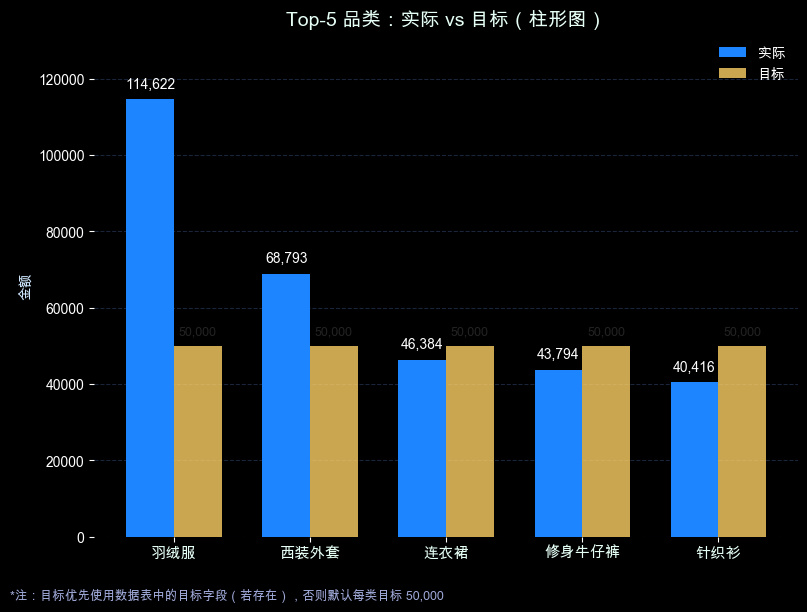

In [70]:
# Top-5 品类柱形图（实际 vs 目标，整合在同一坐标系）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 获取全局 df
df = globals().get('df', None)
if df is None:
    raise RuntimeError('未找到 DataFrame `df`，请先在 notebook 中加载数据。')

# 自动选择金额列
amt_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df.columns), None)
if amt_col is None:
    if {'quantity','unit_price'}.issubset(df.columns):
        df = df.copy()
        df['__computed_amount'] = df['quantity'] * df['unit_price']
        amt_col = '__computed_amount'
    else:
        raise RuntimeError('找不到金额列，也无法用 quantity*unit_price 计算金额。')

# 筛选 2025 年数据（有则使用 2025，否则使用全量）
date_col = next((c for c in ['payment_date','order_date','create_time','date'] if c in df.columns), None)
if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df_valid = df.dropna(subset=[date_col]).copy()
    df_2025 = df_valid[df_valid[date_col].dt.year == 2025].copy()
    if df_2025.shape[0] == 0:
        df_2025 = df_valid
else:
    df_2025 = df.copy()

# 识别类别列
category_col = next((c for c in ['category','product_category','product_name','province','store_name'] if c in df_2025.columns), None)
if category_col is None:
    raise RuntimeError('未找到合适的类别列，请在数据中包含 product_name / category / province / store_name 其中之一。')

# 汇总 Top-5
agg = df_2025.groupby(category_col, as_index=False)[amt_col].sum().rename(columns={amt_col:'sales'})
agg = agg.sort_values('sales', ascending=False).head(5).reset_index(drop=True)
if agg.empty:
    raise RuntimeError('根据当前筛选未计算出任何类别的累计销售。')

# 尝试读取目标列映射，否则回退到默认目标
target_col_candidates = ['category_target','target_amount','target']
target_map = {}
for tcol in target_col_candidates:
    if tcol in df_2025.columns:
        tmp = df_2025.groupby(category_col, as_index=False)[tcol].sum().rename(columns={tcol:'target_sum'})
        target_map = tmp.set_index(category_col)['target_sum'].to_dict()
        break
FALLBACK_TARGET = 50000.0

# 准备绘图数据
cats = agg[category_col].astype(str).tolist()
actuals = agg['sales'].astype(float).tolist()
targets = [float(target_map.get(c, FALLBACK_TARGET)) if target_map else FALLBACK_TARGET for c in cats]

# 绘图（并列柱形：实际 vs 目标）
plt.style.use('dark_background')
n = len(cats)
fig, ax = plt.subplots(figsize=(max(8, n*1.6), 6), constrained_layout=True)
x = np.arange(n)
width = 0.35
color_actual = '#1c85ff'
color_target = '#ffd166'

bars_actual = ax.bar(x - width/2, actuals, width, label='实际', color=color_actual, zorder=3)
bars_target = ax.bar(x + width/2, targets, width, label='目标', color=color_target, alpha=0.8, zorder=2)

# 标注数值
global_max = max(max(actuals) if actuals else 0, max(targets) if targets else 0, 1.0)
for xi, rect in enumerate(bars_actual):
    h = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, h + global_max*0.02, f'{int(h):,d}', ha='center', va='bottom', color='white', fontsize=10)
for xi, rect in enumerate(bars_target):
    h = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, h + global_max*0.02, f'{int(h):,d}', ha='center', va='bottom', color='#222422', fontsize=9)

# 格式化坐标轴与样式
ax.set_xticks(x)
ax.set_xticklabels(cats, fontsize=11, color='#e6fff5')
ax.set_ylim(0, global_max * 1.15)
ax.set_ylabel('金额', color='#cfe8ff')
ax.legend(frameon=False, fontsize=10)
ax.grid(axis='y', linestyle='--', color='#2b3f63', alpha=0.6)
for sp in ax.spines.values():
    sp.set_visible(False)

ax.set_title('Top-5 品类：实际 vs 目标（柱形图）', fontsize=14, color='#e6fff5')
ax.text(0.01, 0.01, '*注：目标优先使用数据表中的目标字段（若存在），否则默认每类目标 50,000', fontsize=9, color='#9fa9d8', transform=fig.transFigure)
plt.show()

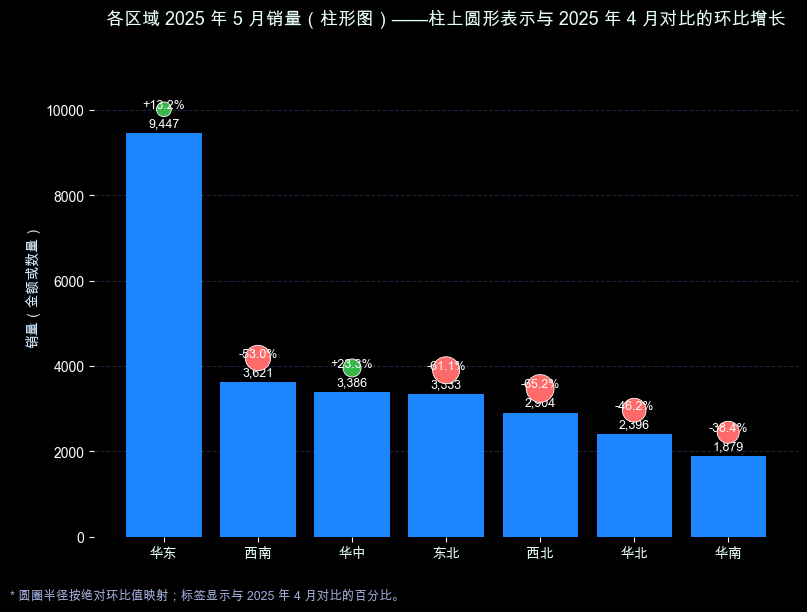

In [ ]:
# 各区域 2025 年 5 月销量柱形图（只显示 5 月），柱上圆形表示与 2025 年 4 月对比的环比增长，半径随增长绝对值变化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 获取 notebook 中的 df
df = globals().get('df', None)
if df is None:
    raise RuntimeError('未找到 DataFrame `df`，请先在 notebook 中加载数据。')

# 自动选择日期列（优先级：payment_date, order_date, create_time, date）
date_col = next((c for c in ['payment_date','order_date','create_time','date'] if c in df.columns), None)
if date_col is None:
    raise RuntimeError('找不到日期列，请确保数据包含 payment_date / order_date / create_time / date 其中之一。')

df = df.copy()
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 自动选择金额列，若不存在则用 quantity*unit_price 作为回退；若仍不存在则用 quantity 作为销量指标
amt_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df.columns), None)
use_quantity = False
if amt_col is None:
    if {'quantity','unit_price'}.issubset(df.columns):
        df['__computed_amount'] = df['quantity'] * df['unit_price']
        amt_col = '__computed_amount'
    elif 'quantity' in df.columns:
        # 若没有金额列，使用数量作为销量指标（单位：件数）
        amt_col = 'quantity'
        use_quantity = True
    else:
        raise RuntimeError('无法识别金额或数量列，无法计算销量。')

# 区域列：优先使用已经存在的 region，否则尝试由 province+mapping 生成，如果都没有则使用 province 本身
if 'region' not in df.columns:
    if 'region_mapping' in globals() and 'province' in df.columns:
        try:
            df['region'] = df['province'].map(globals()['region_mapping'])
        except Exception:
            df['region'] = df['province']
    elif 'province' in df.columns:
        df['region'] = df['province']
    else:
        raise RuntimeError('数据中未包含 region 或 province，无法按区域汇总。')

# 筛选出 2025 年 5 月以及基期 2025 年 4 月的数据用于对比（若基期缺失则视为 0）
df_valid = df.dropna(subset=[date_col]).copy()
df_valid['year'] = df_valid[date_col].dt.year
df_valid['month'] = df_valid[date_col].dt.month
may_2025 = df_valid[(df_valid['year'] == 2025) & (df_valid['month'] == 5)].copy()
april_2025 = df_valid[(df_valid['year'] == 2025) & (df_valid['month'] == 4)].copy()

# 按区域汇总销量（金额或数量）
agg_2025 = may_2025.groupby('region', as_index=False)[amt_col].sum().rename(columns={amt_col:'sales_2025_05'})
agg_prev = april_2025.groupby('region', as_index=False)[amt_col].sum().rename(columns={amt_col:'sales_prev_month'})

# 合并区域并计算环比百分比（%），如果基期为 0 则按规则处理
df_region = pd.merge(agg_2025, agg_prev, on='region', how='left')
df_region['sales_prev_month'] = df_region['sales_prev_month'].fillna(0.0)

# 计算百分比变化（与上个月对比），若基期为0且现期>0，则设为 100.0，若均为0则为 0.0，若现期为0且基期>0则为 -100.0
def compute_change(curr, prev):
    if prev == 0.0:
        if curr == 0.0:
            return 0.0
        else:
            return 100.0
    else:
        return (curr - prev) / prev * 100.0

df_region['yoy_pct'] = df_region.apply(lambda r: compute_change(r['sales_2025_05'], r['sales_prev_month']), axis=1)

# 若需要按总量排序并只保留有销量或关注的区域，可按销量降序排列
df_region = df_region.sort_values('sales_2025_05', ascending=False).reset_index(drop=True)

# 绘图：只绘制 2025-05 的柱形，柱上放一个圆形表示环比/对比，半径按绝对增幅映射；圆颜色代表正/负
plt.style.use('dark_background')
regions = df_region['region'].astype(str).tolist()
values = df_region['sales_2025_05'].astype(float).tolist()
yoy = df_region['yoy_pct'].astype(float).tolist()
n = len(regions)
fig, ax = plt.subplots(figsize=(max(8, n*1.1), 6), constrained_layout=True)
x = np.arange(n)
bar_color = '#1c85ff'
bars = ax.bar(x, values, color=bar_color, zorder=3)

# 计算全局最大用于摆放标签与缩放圆形大小
global_max = max(max(values) if values else 0.0, 1.0)

# 为圆形计算散点 size（s 参数是点面积，单位为 points^2）。按绝对增幅比例缩放到 [40, 400]
yoy_vals = np.array([0.0 if np.isnan(v) else v for v in yoy], dtype=float)
abs_vals = np.abs(yoy_vals)
max_abs = max(abs_vals.max() if len(abs_vals)>0 else 0.0, 1.0)
s_min, s_max = 40.0, 400.0
s = (abs_vals / max_abs) * (s_max - s_min) + s_min

# 圆心纵坐标：放在对应柱顶上方一个偏移，偏移与柱高和 global_max 有关，确保悬浮
y_centers = [bars[i].get_height() + max(global_max*0.06, bars[i].get_height()*0.06) for i in range(n)]

# 颜色：正增长为绿色，负增长为红色，0/缺失为灰色
colors = []
for v in yoy_vals:
    if np.isnan(v):
        colors.append('#9aa7bf')
    elif v > 0:
        colors.append('#39b54a')
    elif v < 0:
        colors.append('#ff6b6b')
    else:
        colors.append('#9aa7bf')

# 绘制圆形散点并标注百分比（保留一位小数）
# 当点较大时，edgecolors 会被忽略警告，可忽略该警告
ax.scatter(x, y_centers, s=s, c=colors, edgecolors='white', linewidths=0.6, zorder=5)
for i, txt in enumerate(yoy_vals):
    label = 'N/A' if np.isnan(txt) else f"{txt:+.1f}%"
    # 微调文字位置，使其位于圆形中央并略微上移以避免和柱顶重叠
    y_text = y_centers[i] + global_max*0.01
    ax.text(x[i], y_text, label, ha='center', va='center', color='white', fontsize=9, zorder=6)

# 标注柱顶的实际数值
for rect in bars:
    h = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, h + global_max*0.01, f'{int(h):,d}', ha='center', va='bottom', color='white', fontsize=9, zorder=4)

# 格式化轴与样式
ax.set_xticks(x)
ax.set_xticklabels(regions, fontsize=10, color='#e6fff5')
ax.set_ylabel('销量（金额或数量）', color='#cfe8ff')
ax.set_title('各区域 2025 年 5 月销量与 2025 年 4 月对比的环比增长', fontsize=13, color='#e6fff5')
ax.set_ylim(0, max(global_max * 1.25, max(y_centers) + global_max*0.08))
ax.grid(axis='y', linestyle='--', color='#2b3f63', alpha=0.6)
for sp in ax.spines.values():
    sp.set_visible(False)

# 说明文字
ax.text(0.01, 0.01, '* 圆圈半径按绝对环比值映射；标签显示与 2025 年 4 月对比的百分比。', fontsize=9, color='#9fa9d8', transform=fig.transFigure)
plt.show()


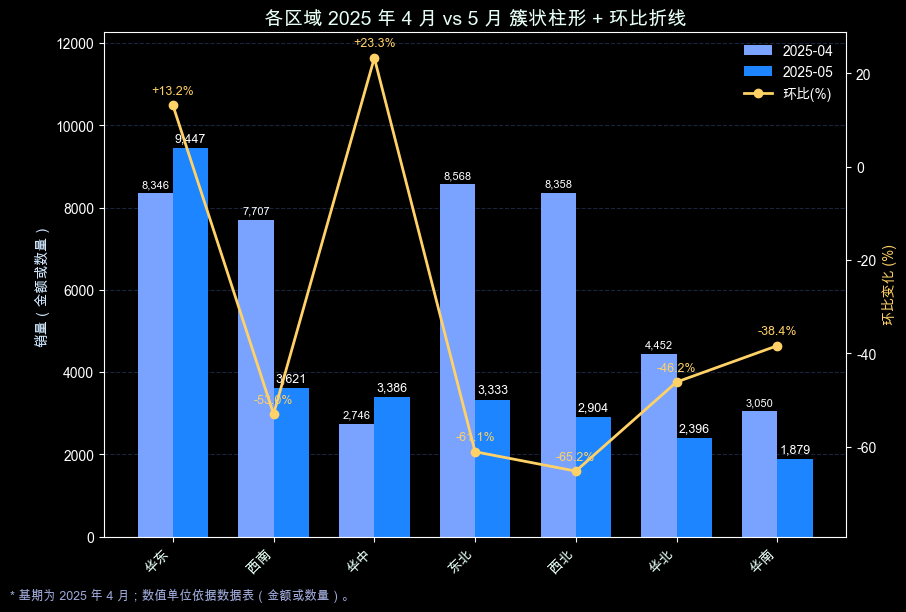

In [75]:
# 各区域簇状柱形 + 环比折线（2025-04 vs 2025-05）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 取 notebook 中的 df
df = globals().get('df', None)
if df is None:
    raise RuntimeError('未找到 DataFrame `df`，请先在 notebook 中加载数据。')

# 日期列自动识别
date_col = next((c for c in ['payment_date','order_date','create_time','date'] if c in df.columns), None)
if date_col is None:
    raise RuntimeError('找不到日期列，请确保数据包含 payment_date / order_date / create_time / date 其中之一。')

df = df.copy()
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 金额列自动识别（回退到 quantity*unit_price 或 quantity）
amt_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df.columns), None)
if amt_col is None:
    if {'quantity','unit_price'}.issubset(df.columns):
        df['__computed_amount'] = df['quantity'] * df['unit_price']
        amt_col = '__computed_amount'
    elif 'quantity' in df.columns:
        amt_col = 'quantity'
    else:
        raise RuntimeError('无法识别金额或数量列，无法计算销量。')

# 区域列处理
if 'region' not in df.columns:
    if 'region_mapping' in globals() and 'province' in df.columns:
        try:
            df['region'] = df['province'].map(globals()['region_mapping'])
        except Exception:
            df['region'] = df['province']
    elif 'province' in df.columns:
        df['region'] = df['province']
    else:
        raise RuntimeError('数据中未包含 region 或 province，无法按区域汇总。')

# 筛选 2025-04 与 2025-05
df_valid = df.dropna(subset=[date_col]).copy()
df_valid['year'] = df_valid[date_col].dt.year
df_valid['month'] = df_valid[date_col].dt.month
apr = df_valid[(df_valid['year'] == 2025) & (df_valid['month'] == 4)].copy()
may = df_valid[(df_valid['year'] == 2025) & (df_valid['month'] == 5)].copy()

# 汇总按区域
agg_apr = apr.groupby('region', as_index=False)[amt_col].sum().rename(columns={amt_col: 'sales_2025_04'})
agg_may = may.groupby('region', as_index=False)[amt_col].sum().rename(columns={amt_col: 'sales_2025_05'})

# 合并区域（保留所有出现过的区域）
regions = pd.merge(agg_apr, agg_may, on='region', how='outer').fillna(0.0)
regions = regions.sort_values('sales_2025_05', ascending=False).reset_index(drop=True)

# 计算环比百分比（与 4 月比）
def pct_change(curr, prev):
    if prev == 0.0:
        if curr == 0.0:
            return 0.0
        else:
            return 100.0
    else:
        return (curr - prev) / prev * 100.0

regions['pct_change'] = regions.apply(lambda r: pct_change(r['sales_2025_05'], r['sales_2025_04']), axis=1)

# 绘图：簇状柱形（4月/5月），并在次坐标绘制百分比折线
plt.style.use('dark_background')
labels = regions['region'].astype(str).tolist()
vals_apr = regions['sales_2025_04'].astype(float).tolist()
vals_may = regions['sales_2025_05'].astype(float).tolist()
changes = regions['pct_change'].astype(float).tolist()

n = len(labels)
fig, ax1 = plt.subplots(figsize=(max(9, n*1.0), 6), constrained_layout=True)

x = np.arange(n)
width = 0.35
color_apr = '#7aa2ff'
color_may = '#1c85ff'

bars1 = ax1.bar(x - width/2, vals_apr, width, label='2025-04', color=color_apr, zorder=3)
bars2 = ax1.bar(x + width/2, vals_may, width, label='2025-05', color=color_may, zorder=4)

# 主轴格式化
global_max = max(max(vals_apr + vals_may) if (vals_apr + vals_may) else 0.0, 1.0)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=10, color='#e6fff5')
ax1.set_ylabel('销量（金额或数量）', color='#cfe8ff')
ax1.set_ylim(0, global_max * 1.3)
ax1.grid(axis='y', linestyle='--', color='#2b3f63', alpha=0.6)
for sp in ax1.spines.values():
    sp.set_visible(False)

# 在每个柱顶标注数值
for rect in bars1:
    h = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, h + global_max*0.01, f"{int(h):,d}", ha='center', va='bottom', color='white', fontsize=8, zorder=5)
for rect in bars2:
    h = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, h + global_max*0.01, f"{int(h):,d}", ha='center', va='bottom', color='white', fontsize=9, zorder=6)

# 次轴：百分比折线
ax2 = ax1.twinx()
ax2.plot(x, changes, color='#ffd166', marker='o', linewidth=2, label='环比(%)', zorder=7)
ax2.set_ylabel('环比变化 (%)', color='#ffd166')
# 自动设置次轴上下限，留出空间
y2_min = min(min(changes) if changes else 0.0, 0.0)
y2_max = max(max(changes) if changes else 0.0, 1.0)
ax2.set_ylim(y2_min*1.2 - 1.0, y2_max*1.2 + 1.0)

# 在折线上标注百分比
for i, v in enumerate(changes):
    ax2.text(x[i], v + (y2_max - y2_min) * 0.02, f"{v:+.1f}%", color='#ffd166', fontsize=9, ha='center', va='bottom')

# 图例合并
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
handles = lines_labels[0][0] + lines_labels[1][0]
labels_ = lines_labels[0][1] + lines_labels[1][1]
ax1.legend(handles, labels_, loc='upper right', frameon=False, fontsize=10)

ax1.set_title('各区域 2025 年 4 月 vs 5 月 簇状柱形 + 环比折线', fontsize=14, color='#e6fff5')
ax1.text(0.01, 0.01, '* 基期为 2025 年 4 月；数值单位依据数据表（金额或数量）。', fontsize=9, color='#9fa9d8', transform=fig.transFigure)
plt.show()


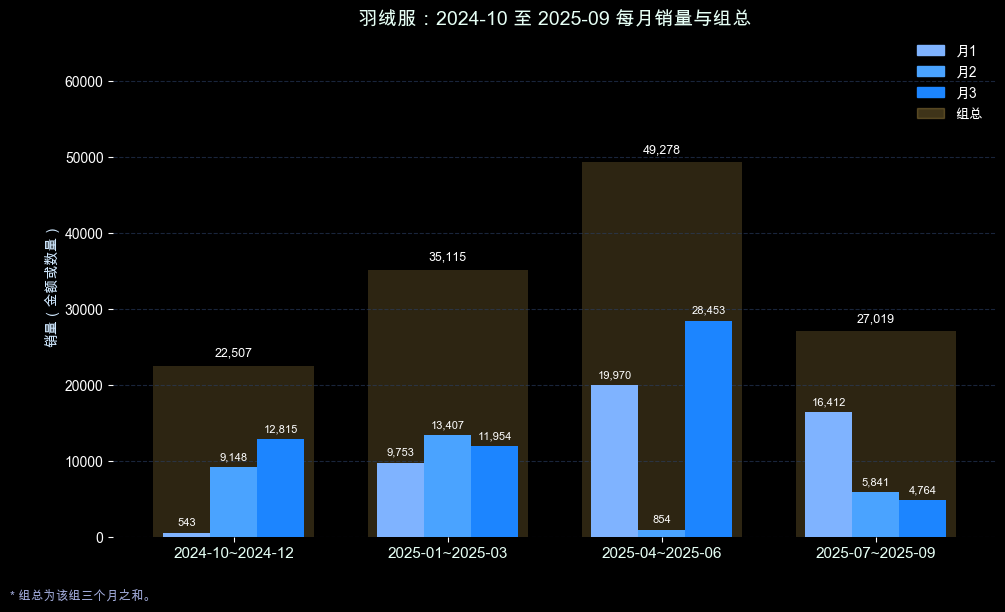

In [79]:
# 复合柱形图（覆盖型组总）：2024-10 到 2025-09，三个月为一组，羽绒服每月销量与组总半透明覆盖
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 获取 df
df = globals().get('df', None)
if df is None:
    raise RuntimeError('未找到 DataFrame `df`，请先在 notebook 中加载数据。')

# 日期列识别
date_col = next((c for c in ['payment_date','order_date','create_time','date'] if c in df.columns), None)
if date_col is None:
    raise RuntimeError('找不到日期列，请确保包含 payment_date / order_date / create_time / date 之一。')

df = df.copy()
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 金额列识别（回退到 quantity*unit_price 或 quantity）
amt_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df.columns), None)
if amt_col is None:
    if {'quantity','unit_price'}.issubset(df.columns):
        df['__computed_amount'] = df['quantity'] * df['unit_price']
        amt_col = '__computed_amount'
    elif 'quantity' in df.columns:
        amt_col = 'quantity'
    else:
        raise RuntimeError('无法识别金额或数量列，无法计算销量。')

# 识别商品/品类列以筛选“羽绒服”
prod_cols = [c for c in ['product_name','product','product_title','title','category','product_category'] if c in df.columns]
if not prod_cols:
    raise RuntimeError('找不到商品或品类相关列（product_name/product/title/category 等）。')

mask = False
for c in prod_cols:
    try:
        mask = mask | df[c].astype(str).str.contains('羽绒服', na=False)
    except Exception:
        continue

if not mask.any():
    raise RuntimeError('在数据中未找到包含“羽绒服”的记录，请确认关键词或列名。')

df_down = df[mask].copy()

# 时间区间：2024-10-01 到 2025-09-30（按月聚合）
start = pd.to_datetime('2024-10-01')
end = pd.to_datetime('2025-09-30')
df_down = df_down[(df_down[date_col] >= start) & (df_down[date_col] <= end)].copy()

# 建立完整月份序列（含零值的月份）
months = pd.date_range(start=start, end=end, freq='MS')
month_labels = [dt.strftime('%Y-%m') for dt in months]

# 按月汇总
df_down['year_month'] = df_down[date_col].dt.to_period('M').dt.to_timestamp()
agg_month = df_down.groupby('year_month', as_index=False)[amt_col].sum().rename(columns={amt_col: 'sales'})
all_months = pd.DataFrame({'year_month': months, 'month_label': month_labels})
agg_month = pd.merge(all_months, agg_month, on='year_month', how='left').fillna({'sales': 0.0})

# 将 month index 0..11，按每三个月分组（共 4 组）
agg_month['month_idx'] = range(len(agg_month))
agg_month['group_idx'] = agg_month['month_idx'] // 3
# 组标签只显示时间区间，例如 '2024-10~2024-12'，不显示 '组1' 前缀
agg_month['group_label'] = agg_month['group_idx'].apply(lambda g: f"{months[g*3].strftime('%Y-%m')}~{months[g*3+2].strftime('%Y-%m')}")

# 计算每组总量
group_totals = agg_month.groupby('group_idx', as_index=False)['sales'].sum().rename(columns={'sales':'group_total'})

# 准备绘图数据
groups = sorted(agg_month['group_idx'].unique())
labels = [agg_month.loc[agg_month['group_idx']==g, 'group_label'].iloc[0] for g in groups]

# 每组内3个月数据
month_values = {i: agg_month[agg_month['group_idx']==i]['sales'].tolist() for i in groups}
for i in groups:
    vals = month_values[i]
    if len(vals) < 3:
        vals = vals + [0.0] * (3 - len(vals))
    month_values[i] = vals

group_vals = [group_totals.loc[group_totals['group_idx']==g, 'group_total'].iloc[0] for g in groups]

# 绘图：只绘制每月三根柱子
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(max(10, len(groups)*2.5), 6), constrained_layout=True)

n_groups = len(groups)
width = 0.22
x = np.arange(n_groups)
# 三个月的偏移
offsets = np.array([-1, 0, 1]) * width
colors_month = ['#7fb3ff', '#4aa3ff', '#1c85ff']

bars = []
for bi in range(3):
    vals = [month_values[g][bi] for g in groups]
    bars_i = ax.bar(x + offsets[bi], vals, width, label=f'月{bi+1}', color=colors_month[bi], zorder=4)
    bars.append(bars_i)

# 绘制组总半透明覆盖矩形（在柱子后面）
pad = width * 0.2
rects = []
for i, g in enumerate(groups):
    left = x[i] + offsets.min() - width/2 - pad
    rect_w = (offsets.max() - offsets.min()) + width + 2*pad
    h = group_vals[i]
    rect = mpatches.Rectangle((left, 0), rect_w, h, facecolor='#ffd166', alpha=0.18, edgecolor=None, zorder=1)
    ax.add_patch(rect)
    rects.append(rect)
    # 标注组总数值（放在矩形顶部）
    ax.text(x[i], h + max(group_vals)*0.02, f"{int(h):,d}", ha='center', va='bottom', color='white', fontsize=9, zorder=6)

# 标注每个月柱顶的值
global_max = max(max(agg_month['sales'].max(), max(group_vals) if group_vals else 0.0), 1.0)
for bi, barset in enumerate(bars):
    for rect in barset:
        h = rect.get_height()
        y_off = global_max * 0.015
        ax.text(rect.get_x() + rect.get_width()/2, h + y_off, f"{int(h):,d}", ha='center', va='bottom', color='white', fontsize=8, zorder=7)

# x 轴与样式
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11, color='#e6fff5')
ax.set_ylabel('销量（金额或数量）', color='#cfe8ff')
ax.set_title('羽绒服：2024-10 至 2025-09 每月销量与组总', fontsize=14, color='#e6fff5')
ax.set_ylim(0, global_max * 1.35)
ax.grid(axis='y', linestyle='--', color='#2b3f63', alpha=0.6)
for sp in ax.spines.values():
    sp.set_visible(False)

# 图例：自定义，包含三个月与组总说明
legend_patches = [mpatches.Patch(color=colors_month[0], label='月1'),
                  mpatches.Patch(color=colors_month[1], label='月2'),
                  mpatches.Patch(color=colors_month[2], label='月3'),
                  mpatches.Patch(color='#ffd166', alpha=0.25, label='组总')]
ax.legend(handles=legend_patches, loc='upper right', frameon=False, fontsize=10)

ax.text(0.01, 0.01, '* 组总为该组三个月之和。', fontsize=9, color='#9fa9d8', transform=fig.transFigure)
plt.show()


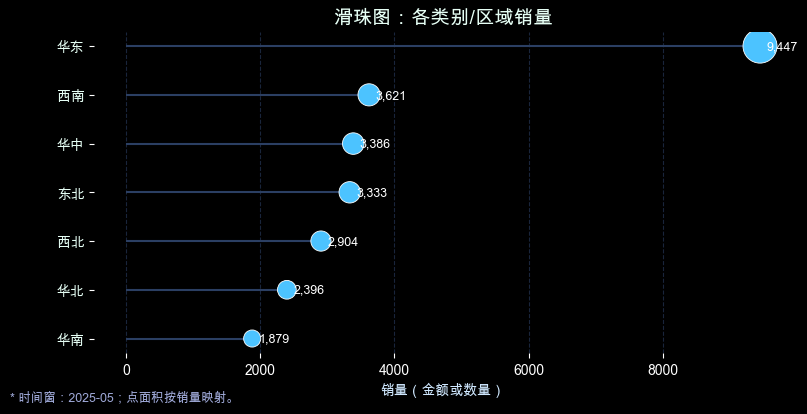

In [80]:
# 滑珠图（Lollipop / Bead plot）：默认展示 2025-05 各区域销量，点大小按销量缩放
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 获取 df
df = globals().get('df', None)
if df is None:
    raise RuntimeError('未找到 DataFrame `df`，请先在 notebook 中加载数据。')

# 自动识别日期与金额列
date_col = next((c for c in ['payment_date','order_date','create_time','date'] if c in df.columns), None)
amt_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df.columns), None)
if amt_col is None:
    if {'quantity','unit_price'}.issubset(df.columns):
        df = df.copy()
        df['__computed_amount'] = df['quantity'] * df['unit_price']
        amt_col = '__computed_amount'
    elif 'quantity' in df.columns:
        amt_col = 'quantity'
    else:
        raise RuntimeError('找不到金额或数量列，无法绘制滑珠图。')

# 区域/类别列候选
cat_col = next((c for c in ['region','category','product_category','product_name','province','store_name'] if c in df.columns), None)
if cat_col is None:
    raise RuntimeError('未找到可用的类别/区域列，请包含 region/province/product_name/category 等列。')

# 过滤到 2025-05（优先）；若没有日期列或没有匹配记录，则使用全量
if date_col is not None:
    df2 = df.copy()
    df2[date_col] = pd.to_datetime(df2[date_col], errors='coerce')
    df_may = df2[(df2[date_col].dt.year == 2025) & (df2[date_col].dt.month == 5)].copy()
    if df_may.shape[0] > 0:
        df_plot = df_may
        subtitle = '时间窗：2025-05'
    else:
        df_plot = df2
        subtitle = '时间窗：全部（未找到 2025-05 数据）'
else:
    df_plot = df.copy()
    subtitle = '时间窗：全部（无日期列）'

# 按类别/区域聚合销量
agg = df_plot.groupby(cat_col, as_index=False)[amt_col].sum().rename(columns={amt_col:'sales'})
if agg.empty:
    raise RuntimeError('聚合后没有数据可画，请检查筛选条件与数据。')

# 排序并准备坐标
agg = agg.sort_values('sales', ascending=True).reset_index(drop=True)  # 横向，从下到上
labels = agg[cat_col].astype(str).tolist()
values = agg['sales'].astype(float).tolist()

n = len(labels)
y = np.arange(n)

# 点大小映射（面积），限制在 [40, 600]
abs_vals = np.array(values)
maxv = max(abs_vals.max(), 1.0)
s_min, s_max = 40.0, 600.0
s = (abs_vals / maxv) * (s_max - s_min) + s_min

# 绘图
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, max(4, n*0.35)), constrained_layout=True)

# 先画水平线
ax.hlines(y, xmin=0, xmax=values, color='#2b3f63', linewidth=1.5, zorder=1)
# 再画圆点
ax.scatter(values, y, s=s, color='#4cc3ff', edgecolors='white', linewidth=0.6, zorder=2)

# 标注数值在点的右侧
for xi, yi, val in zip(values, y, values):
    ax.text(xi + maxv*0.01, yi, f"{int(val):,d}", va='center', ha='left', color='white', fontsize=9)

# 格式化轴
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=10, color='#e6fff5')
ax.set_xlabel('销量（金额或数量）', color='#cfe8ff')
ax.set_title('滑珠图：各类别/区域销量', fontsize=14, color='#e6fff5')
ax.text(0.01, 0.01, f'* {subtitle}；点面积按销量映射。', fontsize=9, color='#9fa9d8', transform=fig.transFigure)
ax.grid(axis='x', linestyle='--', color='#2b3f63', alpha=0.6)
for sp in ax.spines.values():
    sp.set_visible(False)

plt.show()


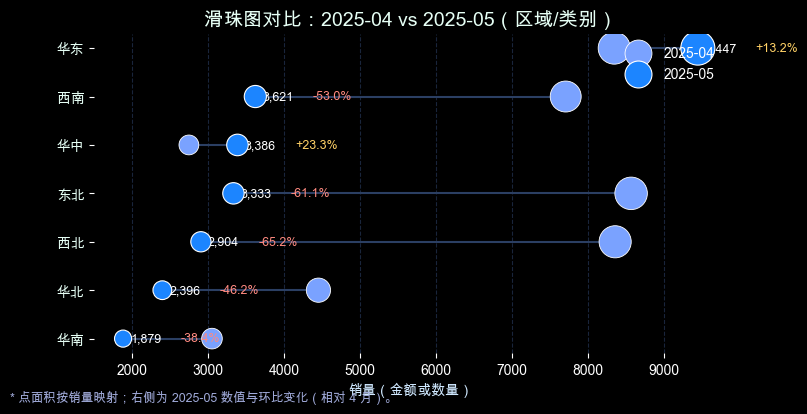

In [81]:
# 对比滑珠图：2025-04 vs 2025-05 各区域/类别销量对比（两点并列并以线连接），点面积随销量映射
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 获取 df
df = globals().get('df', None)
if df is None:
    raise RuntimeError('未找到 DataFrame `df`，请先在 notebook 中加载数据。')

# 自动识别日期/金额/类别列
date_col = next((c for c in ['payment_date','order_date','create_time','date'] if c in df.columns), None)
amt_col = next((c for c in ['paid_amount','product_amount','amount','total_amount'] if c in df.columns), None)
cat_col = next((c for c in ['region','category','product_category','product_name','province','store_name'] if c in df.columns), None)
if cat_col is None:
    raise RuntimeError('未找到类别/区域列，请包含 region/province/product_name/category 等列。')

# 处理金额列回退
if amt_col is None:
    if {'quantity','unit_price'}.issubset(df.columns):
        df = df.copy()
        df['__computed_amount'] = df['quantity'] * df['unit_price']
        amt_col = '__computed_amount'
    elif 'quantity' in df.columns:
        amt_col = 'quantity'
    else:
        raise RuntimeError('找不到金额或数量列，无法绘制滑珠对比图。')

# 转换并筛选 2025-04 与 2025-05
if date_col is not None:
    df2 = df.copy()
    df2[date_col] = pd.to_datetime(df2[date_col], errors='coerce')
    apr = df2[(df2[date_col].dt.year == 2025) & (df2[date_col].dt.month == 4)].copy()
    may = df2[(df2[date_col].dt.year == 2025) & (df2[date_col].dt.month == 5)].copy()
else:
    raise RuntimeError('缺少日期列，无法按月份筛选。')

# 按类别/区域聚合
agg_apr = apr.groupby(cat_col, as_index=False)[amt_col].sum().rename(columns={amt_col: 'sales_2025_04'})
agg_may = may.groupby(cat_col, as_index=False)[amt_col].sum().rename(columns={amt_col: 'sales_2025_05'})

# 合并（保留所有出现的类别），缺失填0
df_cmp = pd.merge(agg_apr, agg_may, on=cat_col, how='outer').fillna(0.0)

# 计算环比百分比（与 4 月比）
def pct_change(curr, prev):
    if prev == 0.0:
        if curr == 0.0:
            return 0.0
        else:
            return 100.0
    else:
        return (curr - prev) / prev * 100.0

df_cmp['pct_change'] = df_cmp.apply(lambda r: pct_change(r['sales_2025_05'], r['sales_2025_04']), axis=1)

# 排序（按 5 月销量降序）
df_cmp = df_cmp.sort_values('sales_2025_05', ascending=True).reset_index(drop=True)
labels = df_cmp[cat_col].astype(str).tolist()
vals_apr = df_cmp['sales_2025_04'].astype(float).tolist()
vals_may = df_cmp['sales_2025_05'].astype(float).tolist()
changes = df_cmp['pct_change'].astype(float).tolist()

n = len(labels)
if n == 0:
    raise RuntimeError('没有可绘制的数据。')

y = np.arange(n)

# 点面积映射（面积），限制在 [40, 600]
max_val = max(max(vals_apr + vals_may), 1.0)
s_min, s_max = 40.0, 600.0
s_apr = (np.array(vals_apr) / max_val) * (s_max - s_min) + s_min
s_may = (np.array(vals_may) / max_val) * (s_max - s_min) + s_min

# 绘图
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, max(4, n*0.35)), constrained_layout=True)

# 对每一行绘制一条连接点的线（从 4 月到 5 月）
for i in range(n):
    ax.plot([vals_apr[i], vals_may[i]], [y[i], y[i]], color='#2b3f63', linewidth=1.5, zorder=1)

# 绘制两个月的点
ax.scatter(vals_apr, y, s=s_apr, color='#7aa2ff', edgecolors='white', linewidth=0.6, zorder=3, label='2025-04')
ax.scatter(vals_may, y, s=s_may, color='#1c85ff', edgecolors='white', linewidth=0.8, zorder=4, label='2025-05')

# 标注数值和环比（放在 5 月点右侧）
for i in range(n):
    ax.text(vals_may[i] + max_val*0.01, y[i], f"{int(vals_may[i]):,d}", va='center', ha='left', color='white', fontsize=9)
    # 环比百分比
    ch = changes[i]
    ch_label = f"{ch:+.1f}%"
    ax.text(vals_may[i] + max_val*0.08, y[i], ch_label, va='center', ha='left', color='#ffd166' if ch>=0 else '#ff8a80', fontsize=9)

# 格式化轴与样式
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=10, color='#e6fff5')
ax.set_xlabel('销量（金额或数量）', color='#cfe8ff')
ax.set_title('滑珠图对比：2025-04 vs 2025-05（区域/类别）', fontsize=14, color='#e6fff5')
ax.text(0.01, 0.01, '* 点面积按销量映射；右侧为 2025-05 数值与环比变化（相对 4 月）。', fontsize=9, color='#9fa9d8', transform=fig.transFigure)
ax.grid(axis='x', linestyle='--', color='#2b3f63', alpha=0.6)
for sp in ax.spines.values():
    sp.set_visible(False)

ax.legend(frameon=False, fontsize=10, loc='upper right')
plt.show()
